In [1]:
import praw
import pandas as pd
import datetime
import yfinance as yf
import csv

In [2]:
# 设置PRAW客户端
reddit = praw.Reddit(
    client_id='sAtVzE40v2dQN4caBtj5-w',
    client_secret='3qMsPW1HhRM8DoXcY8ElxZAU0JqfBg',
    user_agent='researchAPI',
    username='Blue-Fang',
    password='Fql@2856123'
)

try:
    subreddit = reddit.subreddit('test')
    print(subreddit.description)
except Exception as e:
    print(f"连接失败：{e}")

This is a place to test things.


In [3]:
subreddits = ['stocks', 'investing', 'finance']
keywords = [
    'Apple', 'AAPL', 'Apple Stock', 'Apple Inc.', 'Apple Shares',
    'Apple Earnings', 'Apple Investment', 'Apple Financial', 'Apple Market', 'Apple News'
]

filtertime_cleaned = []

# 数据获取
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    for keyword in keywords:
        for submission in subreddit.search(keyword, limit=1000):
            submission.comments.replace_more(limit=0)
            top_comments = sorted(submission.comments, key=lambda x: x.score, reverse=True)[:10]
            for top_comment in top_comments:
                if isinstance(top_comment, praw.models.Comment):
                    filtertime_cleaned.append({
                        'Subreddit': subreddit_name,
                        'Keyword': keyword,
                        'Title': submission.title,
                        'Content': submission.selftext or 'No content available',
                        'Likes': submission.score,
                        'Num_Comments': submission.num_comments,
                        'Author': submission.author.name if submission.author else 'N/A',
                        'Submission_URL': submission.url,
                        'Comment': top_comment.body,
                        'Comment_Score': top_comment.score,
                        'Comment_Author': top_comment.author.name if top_comment.author else 'N/A',
                        'Comment_Created': datetime.datetime.fromtimestamp(top_comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                        'Submission_Created': datetime.datetime.fromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S')
                    })

# 将数据转换为filtertime_cleanedFrame
df = pd.filtertime_cleanedFrame(filtertime_cleaned)
df

Subreddit     Keyword  \
0        stocks       Apple   
1        stocks       Apple   
2        stocks       Apple   
3        stocks       Apple   
4        stocks       Apple   
...         ...         ...   
39400   finance  Apple News   
39401   finance  Apple News   
39402   finance  Apple News   
39403   finance  Apple News   
39404   finance  Apple News   

                                                   Title  \
0                    DOJ sues Apple over iPhone monopoly   
1                    DOJ sues Apple over iPhone monopoly   
2                    DOJ sues Apple over iPhone monopoly   
3                    DOJ sues Apple over iPhone monopoly   
4                    DOJ sues Apple over iPhone monopoly   
...                                                  ...   
39400  What is a publicly held company that has made ...   
39401  What is a publicly held company that has made ...   
39402  What is a publicly held company that has made ...   
39403  Musings on Markets: Buybacks and Stock Prices:...   
39404  Musings on Markets: Buybacks and Stock Prices:...   

                                                 Content  Likes  Num_Comments  \
0      The Department of Justice sued Apple on Thursd...   2726           915   
1      The Department of Justice sued Apple on Thursd...   2726           915   
2      The Department of Justice sued Apple on Thursd...   2726           915   
3      The Department of Justice sued Apple on Thursd...   2726           915   
4      The Department of Justice sued Apple on Thursd...   2726           915   
...                                                  ...    ...           ...   
39400  I'm looking for inspiration for a Corporate Fi...      3            12   
39401  I'm looking for inspiration for a Corporate Fi...      3            12   
39402  I'm looking for inspiration for a Corporate Fi...      3            12   
39403                               No content available      8             4   
39404                               No content available      8             4   

              Author                                     Submission_URL  \
0          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
1          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
2          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
3          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
4          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
...              ...                                                ...   
39400        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39401        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39402        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39403  PissinChicken  http://aswathdamodaran.blogspot.com/2011/01/bu...   
39404  PissinChicken  http://aswathdamodaran.blogspot.com/2011/01/bu...   

                                                 Comment  Comment_Score  \
0      Ticketmaster is a proven monopoly. Nothing has...           1240   
1      AAPL is 5.92% of SPY. It's probably 5-10% of e...           1224   
2      If this goes through Cisco is fucked with all ...            695   
3      Apple has only 64% of the market for iPhones? ...            431   
4          DOJ basically writing the bull case for AAPL.            427   
...                                                  ...            ...   
39400  Apple, despite having no need to do so, recent...              2   
39401  Are you looking for a specific decision? Share...              1   
39402  Google just paid $19 billion for WhatsApp. \nT...             -9   
39403  Why does this have an exclamation point?  Prev...              1   
39404  share buybacks have nothing to do with P/Es an...              1   

             Comment_Author      Comment_Created   Submission_Created  
0                HotSarcasm  2024-03-21 15:48:08  2024-03-21 14:3

In [4]:
df.to_csv('reddit.csv',index = False,quoting=csv.QUOTE_NONNUMERIC)

- 收集股票数据
- 把reddit.csv与股票数据合并

In [123]:
# Collect AAPL stock filtertime_cleaned
stock_data = yf.download('AAPL', start='2015-01-01', end='2024-08-01')


[*********************100%%**********************]  1 of 1 completed


In [124]:
# 将股票数据的日期索引转换为列
stock_data.reset_index(inplace=True)

# 将日期列转换为字符串格式，以便合并
stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')


In [125]:
# 读取收集好的reddit数据集
df = pd.read_csv('reddit.csv')

In [126]:

# 修改reddit.csv中'Comment_Created'列和’Submission_Created‘列的时间格式，统一为年月日
df['Comment_Created'] = pd.to_datetime(df['Comment_Created']).dt.strftime('%Y-%m-%d')
df['Submission_Created'] = pd.to_datetime(df['Submission_Created']).dt.strftime('%Y-%m-%d')


In [127]:
df

Subreddit     Keyword  \
0        stocks       Apple   
1        stocks       Apple   
2        stocks       Apple   
3        stocks       Apple   
4        stocks       Apple   
...         ...         ...   
39400   finance  Apple News   
39401   finance  Apple News   
39402   finance  Apple News   
39403   finance  Apple News   
39404   finance  Apple News   

                                                   Title  \
0                    DOJ sues Apple over iPhone monopoly   
1                    DOJ sues Apple over iPhone monopoly   
2                    DOJ sues Apple over iPhone monopoly   
3                    DOJ sues Apple over iPhone monopoly   
4                    DOJ sues Apple over iPhone monopoly   
...                                                  ...   
39400  What is a publicly held company that has made ...   
39401  What is a publicly held company that has made ...   
39402  What is a publicly held company that has made ...   
39403  Musings on Markets: Buybacks and Stock Prices:...   
39404  Musings on Markets: Buybacks and Stock Prices:...   

                                                 Content  Likes  Num_Comments  \
0      The Department of Justice sued Apple on Thursd...   2726           915   
1      The Department of Justice sued Apple on Thursd...   2726           915   
2      The Department of Justice sued Apple on Thursd...   2726           915   
3      The Department of Justice sued Apple on Thursd...   2726           915   
4      The Department of Justice sued Apple on Thursd...   2726           915   
...                                                  ...    ...           ...   
39400  I'm looking for inspiration for a Corporate Fi...      3            12   
39401  I'm looking for inspiration for a Corporate Fi...      3            12   
39402  I'm looking for inspiration for a Corporate Fi...      3            12   
39403                               No content available      8             4   
39404                               No content available      8             4   

              Author                                     Submission_URL  \
0          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
1          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
2          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
3          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
4          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
...              ...                                                ...   
39400        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39401        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39402        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39403  PissinChicken  http://aswathdamodaran.blogspot.com/2011/01/bu...   
39404  PissinChicken  http://aswathdamodaran.blogspot.com/2011/01/bu...   

                                                 Comment  Comment_Score  \
0      Ticketmaster is a proven monopoly. Nothing has...           1240   
1      AAPL is 5.92% of SPY. It's probably 5-10% of e...           1224   
2      If this goes through Cisco is fucked with all ...            695   
3      Apple has only 64% of the market for iPhones? ...            431   
4          DOJ basically writing the bull case for AAPL.            427   
...                                                  ...            ...   
39400  Apple, despite having no need to do so, recent...              2   
39401  Are you looking for a specific decision? Share...              1   
39402  Google just paid $19 billion for WhatsApp. \nT...             -9   
39403  Why does this have an exclamation point?  Prev...              1   
39404  share buybacks have nothing to do with P/Es an...              1   

             Comment_Author Comment_Created Submission_Created  
0                HotSarcasm      2024-03-21         2024-03-21  
1      

In [128]:
stock_data.to_csv('stock.csv',index = False,quoting=csv.QUOTE_NONNUMERIC)
stock_data

Date        Open        High         Low       Close   Adj Close  \
0     2015-01-02   27.847500   27.860001   26.837500   27.332500   24.402174   
1     2015-01-05   27.072500   27.162500   26.352501   26.562500   23.714727   
2     2015-01-06   26.635000   26.857500   26.157499   26.565001   23.716953   
3     2015-01-07   26.799999   27.049999   26.674999   26.937500   24.049517   
4     2015-01-08   27.307501   28.037500   27.174999   27.972500   24.973558   
...          ...         ...         ...         ...         ...         ...   
2405  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.490005   
2406  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.960007   
2407  2024-07-29  216.960007  219.300003  215.750000  218.240005  218.240005   
2408  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.800003   
2409  2024-07-31  221.440002  223.820007  220.630005  222.080002  222.080002   

         Volume  
0     212818400  
1     257142000  
2     263188400  
3     160423600  
4     237458000  
...         ...  
2405   51391200  
2406   41601300  
2407   36311800  
2408   41643800  
2409   50036300  

[2410 rows x 7 columns]

In [129]:
stock_data = pd.read_csv('stock.csv')

In [130]:
# 合并数据
# 将Reddit数据的日期与股票数据合并（使用Submission_Created日期）
merged_data = pd.merge(df, stock_data, left_on=df['Submission_Created'], right_on='Date', how='left')

merged_data

Subreddit     Keyword  \
0        stocks       Apple   
1        stocks       Apple   
2        stocks       Apple   
3        stocks       Apple   
4        stocks       Apple   
...         ...         ...   
39400   finance  Apple News   
39401   finance  Apple News   
39402   finance  Apple News   
39403   finance  Apple News   
39404   finance  Apple News   

                                                   Title  \
0                    DOJ sues Apple over iPhone monopoly   
1                    DOJ sues Apple over iPhone monopoly   
2                    DOJ sues Apple over iPhone monopoly   
3                    DOJ sues Apple over iPhone monopoly   
4                    DOJ sues Apple over iPhone monopoly   
...                                                  ...   
39400  What is a publicly held company that has made ...   
39401  What is a publicly held company that has made ...   
39402  What is a publicly held company that has made ...   
39403  Musings on Markets: Buybacks and Stock Prices:...   
39404  Musings on Markets: Buybacks and Stock Prices:...   

                                                 Content  Likes  Num_Comments  \
0      The Department of Justice sued Apple on Thursd...   2726           915   
1      The Department of Justice sued Apple on Thursd...   2726           915   
2      The Department of Justice sued Apple on Thursd...   2726           915   
3      The Department of Justice sued Apple on Thursd...   2726           915   
4      The Department of Justice sued Apple on Thursd...   2726           915   
...                                                  ...    ...           ...   
39400  I'm looking for inspiration for a Corporate Fi...      3            12   
39401  I'm looking for inspiration for a Corporate Fi...      3            12   
39402  I'm looking for inspiration for a Corporate Fi...      3            12   
39403                               No content available      8             4   
39404                               No content available      8             4   

              Author                                     Submission_URL  \
0          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
1          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
2          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
3          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
4          Puginator  https://www.reddit.com/r/stocks/comments/1bk7x...   
...              ...                                                ...   
39400        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39401        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39402        Lucy923  https://www.reddit.com/r/finance/comments/20qv...   
39403  PissinChicken  http://aswathdamodaran.blogspot.com/2011/01/bu...   
39404  PissinChicken  http://aswathdamodaran.blogspot.com/2011/01/bu...   

                                                 Comment  Comment_Score  \
0      Ticketmaster is a proven monopoly. Nothing has...           1240   
1      AAPL is 5.92% of SPY. It's probably 5-10% of e...           1224   
2      If this goes through Cisco is fucked with all ...            695   
3      Apple has only 64% of the market for iPhones? ...            431   
4          DOJ basically writing the bull case for AAPL.            427   
...                                                  ...            ...   
39400  Apple, despite having no need to do so, recent...              2   
39401  Are you looking for a specific decision? Share...              1   
39402  Google just paid $19 billion for WhatsApp. \nT...             -9   
39403  Why does this have an exclamation point?  Prev...              1   
39404  share buybacks have nothing to do with P/Es an...              1   

             Comment_Author Comment_Created Submission_Created        Date  \
0                HotSarcasm      2024-03-21         2024-03

In [131]:
# 保存到未作任何处理的合并了reddit和stock的数据集
merged_data.to_csv('merged_reddit_stock_data.csv', index = False,quoting=csv.QUOTE_NONNUMERIC)

In [133]:
# 读取合并了reddit和stock的数据集
df = pd.read_csv('merged_reddit_stock_data.csv')

In [134]:
# 检查每一列是否有空数据
missing_filtertime_cleaned = df.isnull().sum()
print(missing_filtertime_cleaned)

Subreddit                 0
Keyword                   0
Title                     0
Content                   0
Likes                     0
Num_Comments              0
Author                    0
Submission_URL            0
Comment                   2
Comment_Score             0
Comment_Author         6871
Comment_Created           0
Submission_Created        0
Date                      0
Open                  10764
High                  10764
Low                   10764
Close                 10764
Adj Close             10764
Volume                10764
dtype: int64


In [135]:
# 检查 'Keyword' 列是否有非预期的关键词
keywords = [
    'Apple', 'AAPL', 'Apple Stock', 'Apple Inc.', 'Apple Shares',
    'Apple Earnings', 'Apple Investment', 'Apple Financial', 'Apple Market', 'Apple News'
]

unexpected_keywords = df[~df['Keyword'].isin(keywords)]['Keyword'].unique()
if len(unexpected_keywords) > 0:
    print("Unexpected keywords:")
    print(unexpected_keywords)
else:
    print("All keywords are in the expected list.")


All keywords are in the expected list.


- 筛选疫情时期作为主要研究数据

In [136]:
# 定义筛选时间范围
start_date = '2019-12-31'
end_date = '2023-05-05'

df = df[(df['Submission_Created'] >= start_date) & (df['Submission_Created'] <= end_date)]
df

Subreddit       Keyword  \
10       stocks         Apple   
11       stocks         Apple   
12       stocks         Apple   
13       stocks         Apple   
14       stocks         Apple   
...         ...           ...   
39225   finance  Apple Market   
39226   finance  Apple Market   
39227   finance  Apple Market   
39228   finance  Apple Market   
39229   finance  Apple Market   

                                                   Title  \
10                                      Apple down 20%+…   
11                                      Apple down 20%+…   
12                                      Apple down 20%+…   
13                                      Apple down 20%+…   
14                                      Apple down 20%+…   
...                                                  ...   
39225  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
39226  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
39227  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
39228  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
39229  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   

                                                 Content  Likes  Num_Comments  \
10     This company is talked about as maybe the best...   1228           636   
11     This company is talked about as maybe the best...   1228           636   
12     This company is talked about as maybe the best...   1228           636   
13     This company is talked about as maybe the best...   1228           636   
14     This company is talked about as maybe the best...   1228           636   
...                                                  ...    ...           ...   
39225                               No content available    557            52   
39226                               No content available    557            52   
39227                               No content available    557            52   
39228                               No content available    557            52   
39229                               No content available    557            52   

             Author                                     Submission_URL  \
10      gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
11      gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
12      gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
13      gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
14      gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
...             ...                                                ...   
39225  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
39226  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
39227  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
39228  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
39229  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   

                                                 Comment  Comment_Score  \
10     Ignore any previous price. \n\nLook at current...           1480   
11     Apple lost more in the last three weeks of 202...            449   
12     > At what price are we adding to our positions...            362   
13                       I’m buying it weekly in my 401k            284   
14     Do literally EVERYTHING that is the opposite o...            247   
...                                                  ...            ...   
39225  I believe it’s the same company that will soon...              1   
39226       Got to make up for the investment in WeWork.              1   
39227  Where are all the sceptics who were worried ab...              1   
39228  Arm is currently most valuable company on the ...             -1   
39229                                          Who cares            -60   

       Comment_Author Comment_Created Submission_Created        Date  \
10      creemeeseason      2023-01-03         2023-01

- 数据清洗与预处理

In [137]:
print(df.isnull().sum())

Subreddit                0
Keyword                  0
Title                    0
Content                  0
Likes                    0
Num_Comments             0
Author                   0
Submission_URL           0
Comment                  0
Comment_Score            0
Comment_Author        3345
Comment_Created          0
Submission_Created       0
Date                     0
Open                  4358
High                  4358
Low                   4358
Close                 4358
Adj Close             4358
Volume                4358
dtype: int64


- 由于数据集有19348行，而缺失值的行数是4358行，占比约为22.5%，占比较大。因此，直接删除这些行可能会导致数据不足。建议使用填充策略（前向填充）。

In [138]:
# 填充缺失值（前向填充）
df.fillna(method='ffill', inplace=True)
# 再次检查缺失值
print(df.isnull().sum())

Subreddit             0
Keyword               0
Title                 0
Content               0
Likes                 0
Num_Comments          0
Author                0
Submission_URL        0
Comment               0
Comment_Score         0
Comment_Author        0
Comment_Created       0
Submission_Created    0
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
dtype: int64


In [139]:
df.to_csv('filtertime.csv', index = False,quoting=csv.QUOTE_NONNUMERIC)

In [187]:
df = pd.read_csv('filtertime.csv')

In [188]:
import re
import spacy


nlp = spacy.load('en_core_web_sm')

# 清洗文本函数
def clean_text(text):
    # 移除URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    
    # 替换特殊字符和格式标记
    text = re.sub(r'[\r|\n|\r\n]+', ' ', text)  # 将换行符替换为空格
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # 去除非字母数字的字符
    
    # 将文本转换为小写
    text = text.lower()
    
    # 去除多余的空格
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# 定义过滤函数
def filter_text(text, min_length=10):
    cleaned_text = clean_text(text)
    if len(cleaned_text) < min_length:  # 忽略长度低于指定值的内容
        return None
    return cleaned_text

# 使用spaCy进行规范化处理的函数
def preprocess_text_with_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [189]:
# 应用清洗和预处理函数
df['Cleaned_Content'] = df['Content'].apply(lambda x: filter_text(x))
df['Cleaned_Comment'] = df['Comment'].apply(lambda x: filter_text(x))
# 删除清洗后为空的记录
df.dropna(subset=['Cleaned_Content', 'Cleaned_Comment'], inplace=True)

df['Processed_Content'] = df['Cleaned_Content'].apply(preprocess_text_with_spacy)
df['Processed_Comment'] = df['Cleaned_Comment'].apply(preprocess_text_with_spacy)

In [190]:
df

Subreddit       Keyword  \
0        stocks         Apple   
1        stocks         Apple   
2        stocks         Apple   
3        stocks         Apple   
4        stocks         Apple   
...         ...           ...   
19342   finance  Apple Market   
19343   finance  Apple Market   
19344   finance  Apple Market   
19345   finance  Apple Market   
19346   finance  Apple Market   

                                                   Title  \
0                                       Apple down 20%+…   
1                                       Apple down 20%+…   
2                                       Apple down 20%+…   
3                                       Apple down 20%+…   
4                                       Apple down 20%+…   
...                                                  ...   
19342  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
19343  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
19344  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
19345  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
19346  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   

                                                 Content  Likes  Num_Comments  \
0      This company is talked about as maybe the best...   1228           636   
1      This company is talked about as maybe the best...   1228           636   
2      This company is talked about as maybe the best...   1228           636   
3      This company is talked about as maybe the best...   1228           636   
4      This company is talked about as maybe the best...   1228           636   
...                                                  ...    ...           ...   
19342                               No content available    557            52   
19343                               No content available    557            52   
19344                               No content available    557            52   
19345                               No content available    557            52   
19346                               No content available    557            52   

             Author                                     Submission_URL  \
0       gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
1       gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
2       gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
3       gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
4       gopackxxx12  https://www.reddit.com/r/stocks/comments/102jd...   
...             ...                                                ...   
19342  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
19343  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
19344  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
19345  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
19346  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   

                                                 Comment  Comment_Score  ...  \
0      Ignore any previous price. \n\nLook at current...           1480  ...   
1      Apple lost more in the last three weeks of 202...            449  ...   
2      > At what price are we adding to our positions...            362  ...   
3                        I’m buying it weekly in my 401k            284  ...   
4      Do literally EVERYTHING that is the opposite o...            247  ...   
...                                                  ...            ...  ...   
19342  They have been trying to sell for several year...              2  ...   
19343  I believe it’s the same company that will soon...              1  ...   
19344       Got to make up for the investment in WeWork.              1  ...   
19345  Where are all the sceptics who were worried ab...              1  ...   
19346  Arm is currently most valuable company on the ...             -1  ...   

             Open        High         Low       Close   Adj Close

In [191]:
# 保存经过时间筛选和文本清洗的数据集
df.to_csv('filtertime_cleaned.csv', index = False,quoting=csv.QUOTE_NONNUMERIC)

- 先使用TextBlob进行情感分析.
- 然后分别在未使用和使用信任过滤器的情况下进行预测，比较效果。
- 如果信任过滤器的效果更好，再使用信任过滤器的数据集进行更精细的Transformer模型情感分析。

In [192]:
from textblob import TextBlob

# TextBlob情感分析函数
def textblob_sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'POSITIVE', sentiment
    elif sentiment < 0:
        return 'NEGATIVE', sentiment
    else:
        return 'NEUTRAL', 0.0
    

# 对评论和帖子进行TextBlob情感分析
df[['Content_Sentiment', 'Content_Sentiment_Score']] = df['Processed_Content'].apply(
    lambda x: pd.Series(textblob_sentiment_analysis(x))
)
df[['Comment_Sentiment', 'Comment_Sentiment_Score']] = df['Processed_Comment'].apply(
    lambda x: pd.Series(textblob_sentiment_analysis(x))
)

In [193]:
import ta

# 计算技术指标
df['SMA_5'] = ta.trend.sma_indicator(df['Close'], window=5)
df['SMA_10'] = ta.trend.sma_indicator(df['Close'], window=10)
df['SMA_30'] = ta.trend.sma_indicator(df['Close'], window=30)
df['RSI'] = ta.momentum.rsi(df['Close'])
df['MACD'] = ta.trend.macd_diff(df['Close'])
df['Bollinger_High'] = ta.volatility.bollinger_hband(df['Close'])
df['Bollinger_Low'] = ta.volatility.bollinger_lband(df['Close'])

# 提取时间特征
df['Weekday'] = pd.to_datetime(df['Date']).dt.dayofweek
df['Month'] = pd.to_datetime(df['Date']).dt.month

# 填充缺失值
df.fillna(method='ffill', inplace=True)
# 删除含有NaN值的行
df = df.dropna()

# 添加趋势标签：1表示上涨，-1表示下跌，0表示横盘
df['Trend'] = df['Close'].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

C:\Users\blue\AppData\Local\Temp\ipykernel_3096\2470178412.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trend'] = df['Close'].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))


In [194]:
# 保存经过时间筛选和文本清洗和textblob情感分析和新加入的其他特征值的数据集
df.to_csv('TextBlob.csv', index = False,quoting=csv.QUOTE_NONNUMERIC)

In [218]:
df = pd.read_csv('TextBlob.csv')

In [219]:
# 数值特征标准化/归一化
from sklearn.preprocessing import MinMaxScaler

# 选择特征和标签
features = df[['Likes', 'Num_Comments', 'Open', 'High', 'Low', 'Close', 'Volume', 
                'Content_Sentiment_Score', 'Comment_Sentiment_Score', 'SMA_5', 'SMA_10', 
                'SMA_30', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low', 'Weekday', 'Month']]
labels = df['Trend']

# 数值特征标准化/归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

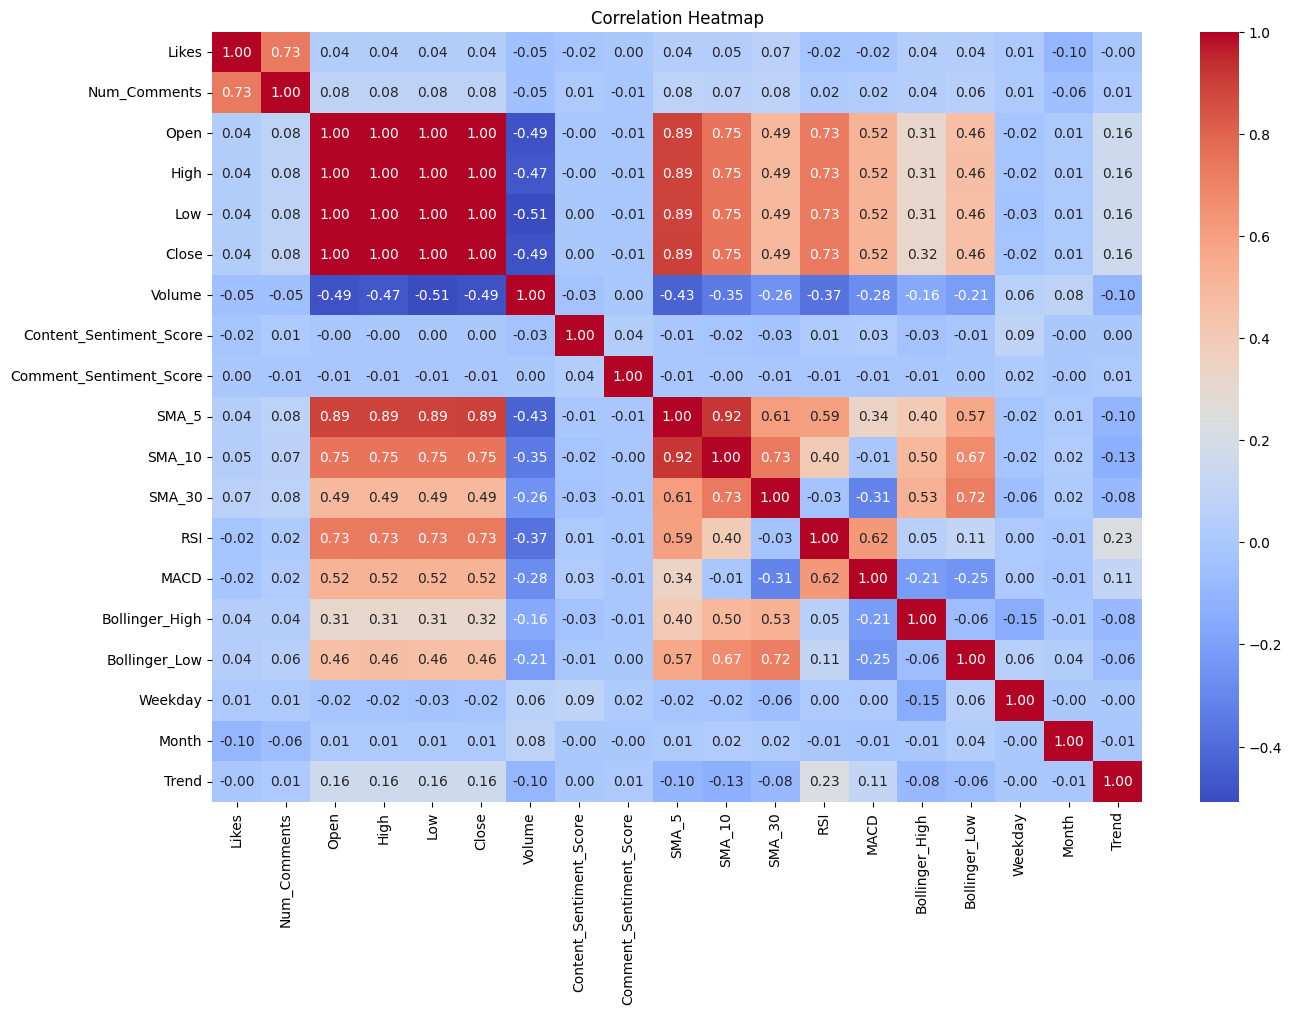

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 合并特征和目标变量到一个数据框中
data = pd.concat([features, labels], axis=1)

# 计算相关性矩阵
correlation_matrix = data.corr()

# 绘制热图
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- 执行单层LSTM模型
- 该模型使用特征为所有特征（如上的所有特征）

Epoch 1/100
1551/1551 [==============================] - 6s 3ms/step - loss: 0.0932 - accuracy: 0.9067 - val_loss: 0.0940 - val_accuracy: 0.9037
Epoch 2/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0912 - accuracy: 0.9067 - val_loss: 0.0937 - val_accuracy: 0.9037
Epoch 3/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0909 - accuracy: 0.9067 - val_loss: 0.0938 - val_accuracy: 0.9037
Epoch 4/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0909 - accuracy: 0.9067 - val_loss: 0.0930 - val_accuracy: 0.9037
Epoch 5/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0906 - accuracy: 0.9067 - val_loss: 0.0939 - val_accuracy: 0.9037
Epoch 6/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0905 - accuracy: 0.9067 - val_loss: 0.0932 - val_accuracy: 0.9037
Epoch 7/100
1551/1551 [==============================] - 5s 3ms/step - loss: 0.0905 - accuracy: 0.9067 - val_loss: 0.0929 - val_ac

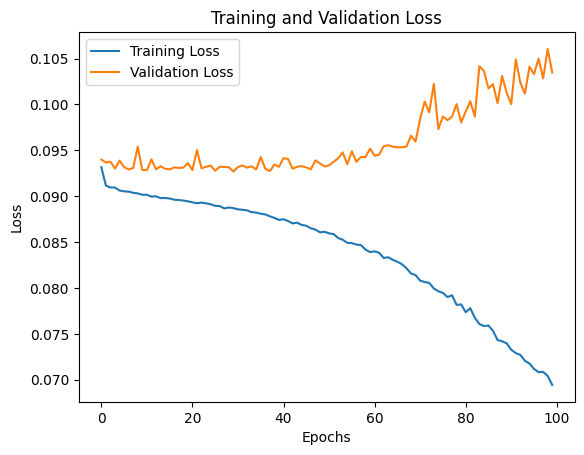

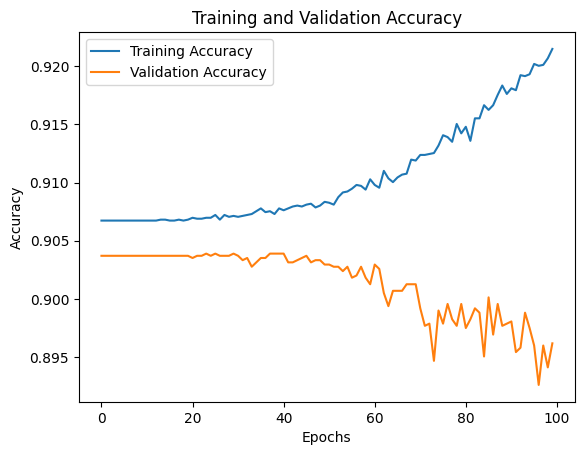

In [221]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 滑动窗口函数
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 设置滑动窗口大小
time_step = 5 # 一周交易日为5天

# 创建训练集和测试集
X, y = create_dataset(features_scaled, labels.values, time_step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 构建单层LSTM模型
model = Sequential()
model.add(LSTM(150, input_shape=(time_step, X_train.shape[2])))
model.add(Dense(1, activation='tanh'))

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# 可视化训练和验证损失
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- 这部分是单层LSTM
- 删除相关性较低的特征后重新建模预测

Epoch 1/100
1551/1551 [==============================] - 6s 3ms/step - loss: 0.0922 - accuracy: 0.9067 - val_loss: 0.0945 - val_accuracy: 0.9037
Epoch 2/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0911 - accuracy: 0.9067 - val_loss: 0.0931 - val_accuracy: 0.9037
Epoch 3/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0910 - accuracy: 0.9067 - val_loss: 0.0960 - val_accuracy: 0.9037
Epoch 4/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0908 - accuracy: 0.9067 - val_loss: 0.0936 - val_accuracy: 0.9037
Epoch 5/100
1551/1551 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9067 - val_loss: 0.0929 - val_accuracy: 0.9037
Epoch 6/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0906 - accuracy: 0.9067 - val_loss: 0.0931 - val_accuracy: 0.9037
Epoch 7/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0905 - accuracy: 0.9067 - val_loss: 0.0928 - val_ac

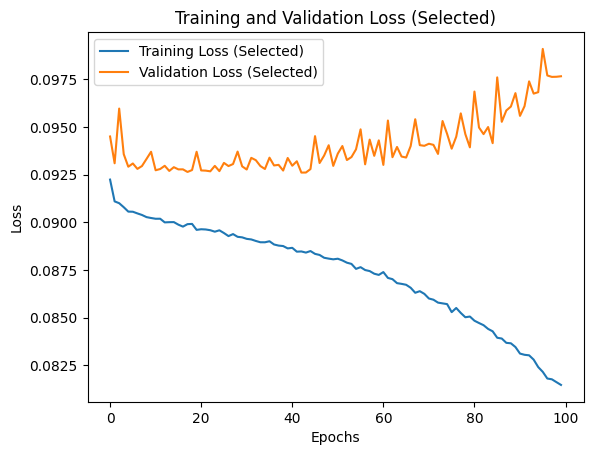

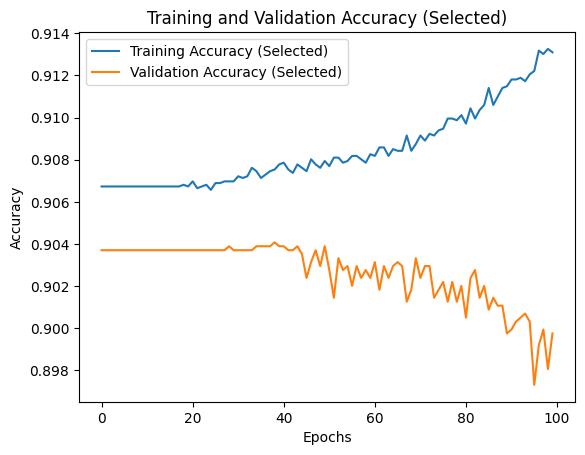

In [222]:
# 删除相关性较低的特征
selected_features = df[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10','Content_Sentiment_Score', 'Comment_Sentiment_Score']]

# 数值特征标准化/归一化
scaler = MinMaxScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

# 创建训练集和测试集
X_sel, y_sel = create_dataset(selected_features_scaled, labels.values, time_step)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size=0.3, random_state=42)

# 构建单层LSTM模型
model_sel = Sequential()
model_sel.add(LSTM(150, input_shape=(time_step, X_train_sel.shape[2])))
model_sel.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_sel = Adam(learning_rate=0.001)
model_sel.compile(optimizer=optimizer_sel, loss='mse', metrics=['accuracy'])

# 训练模型
history_sel = model_sel.fit(X_train_sel, y_train_sel, epochs=100, batch_size=8, validation_data=(X_test_sel, y_test_sel))

# 评估模型
loss_sel, accuracy_sel = model_sel.evaluate(X_test_sel, y_test_sel)
print(f'Test Loss (Selected Features): {loss_sel}, Test Accuracy (Selected Features): {accuracy_sel}')

# 可视化训练和验证损失
plt.plot(history_sel.history['loss'], label='Training Loss (Selected)')
plt.plot(history_sel.history['val_loss'], label='Validation Loss (Selected)')
plt.title('Training and Validation Loss (Selected)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率
plt.plot(history_sel.history['accuracy'], label='Training Accuracy (Selected)')
plt.plot(history_sel.history['val_accuracy'], label='Validation Accuracy (Selected)')
plt.title('Training and Validation Accuracy (Selected)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


- 比较两种特征选择策略的模型性能

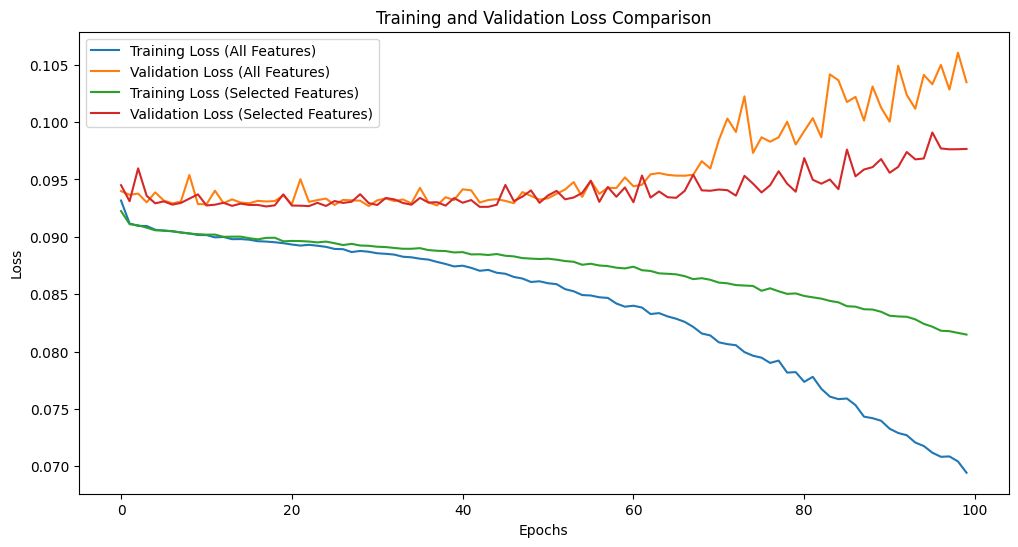

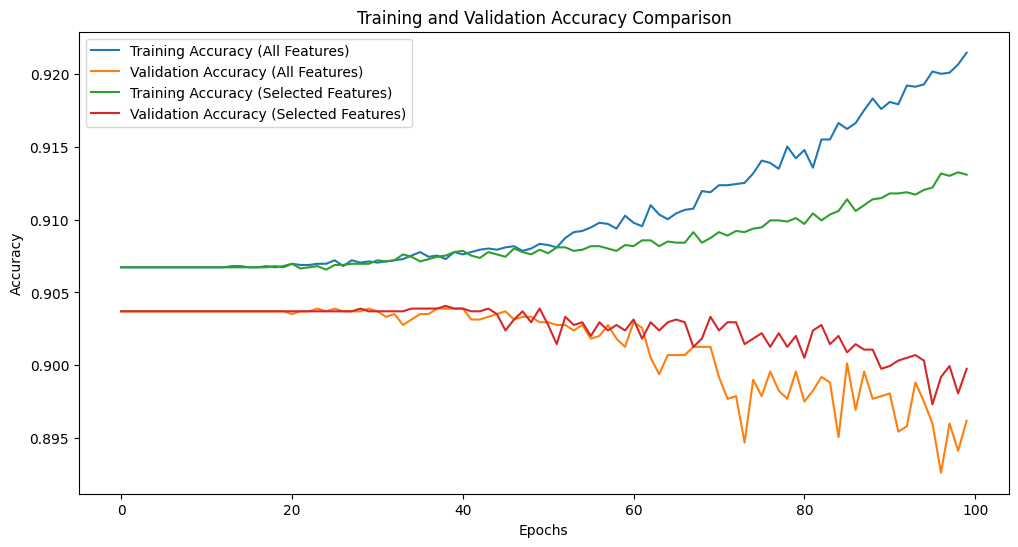

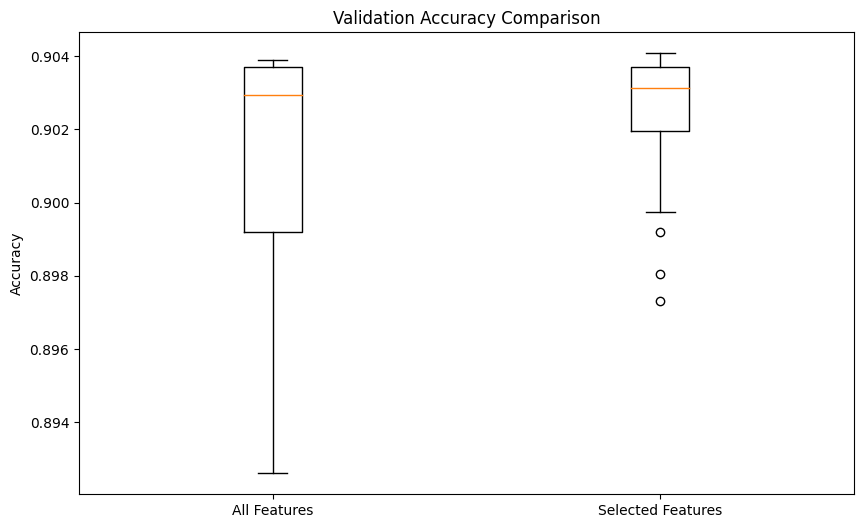

In [223]:
# 可视化训练和验证损失对比
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss (All Features)')
plt.plot(history.history['val_loss'], label='Validation Loss (All Features)')
plt.plot(history_sel.history['loss'], label='Training Loss (Selected Features)')
plt.plot(history_sel.history['val_loss'], label='Validation Loss (Selected Features)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率对比
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy (All Features)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (All Features)')
plt.plot(history_sel.history['accuracy'], label='Training Accuracy (Selected Features)')
plt.plot(history_sel.history['val_accuracy'], label='Validation Accuracy (Selected Features)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 生成性能分数箱型图
plt.figure(figsize=(10, 6))
plt.boxplot([history.history['val_accuracy'], history_sel.history['val_accuracy']], 
            labels=['All Features', 'Selected Features'])
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


- 为了解决过拟合问题，我们可以在单层LSTM模型中添加正则化技术，例如Dropout层。
- 进一步优化特征选择过程，通过交叉验证找到最优的特征组合。

Epoch 1/100
1551/1551 [==============================] - 6s 3ms/step - loss: 0.0930 - accuracy: 0.9067 - val_loss: 0.0934 - val_accuracy: 0.9037
Epoch 2/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0913 - accuracy: 0.9067 - val_loss: 0.0934 - val_accuracy: 0.9037
Epoch 3/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0913 - accuracy: 0.9067 - val_loss: 0.0931 - val_accuracy: 0.9037
Epoch 4/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0912 - accuracy: 0.9067 - val_loss: 0.0933 - val_accuracy: 0.9037
Epoch 5/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0910 - accuracy: 0.9067 - val_loss: 0.0932 - val_accuracy: 0.9037
Epoch 6/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0910 - accuracy: 0.9067 - val_loss: 0.0938 - val_accuracy: 0.9037
Epoch 7/100
1551/1551 [==============================] - 4s 3ms/step - loss: 0.0910 - accuracy: 0.9067 - val_loss: 0.0936 - val_ac

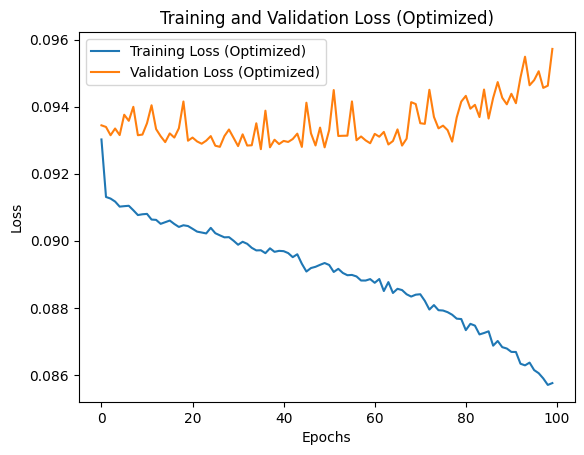

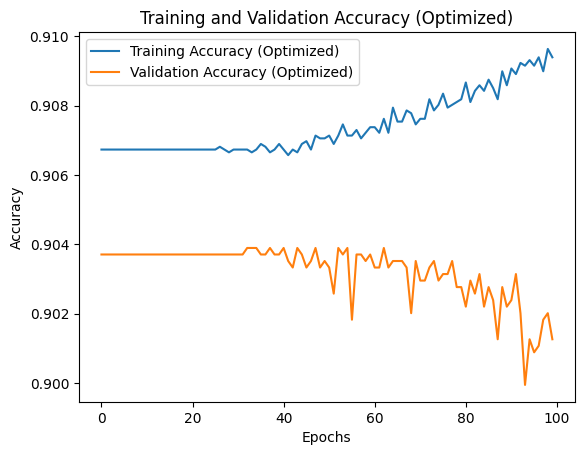

In [224]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 删除相关性较低的特征
selected_features = df[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]

# 数值特征标准化/归一化
scaler = MinMaxScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

# 创建训练集和测试集
X_opt, y_opt = create_dataset(selected_features_scaled, labels.values, time_step)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.3, random_state=42)

# 构建单层LSTM模型，并添加Dropout层
model_optimized = Sequential()
model_optimized.add(LSTM(150, input_shape=(time_step, X_train_opt.shape[2])))
model_optimized.add(Dropout(0.2))  # 添加Dropout层
model_optimized.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_optimized = tf.keras.optimizers.Adam(learning_rate=0.001)
model_optimized.compile(optimizer=optimizer_optimized, loss='mse', metrics=['accuracy'])

# 训练模型
history_optimized = model_optimized.fit(X_train_opt, y_train_opt, epochs=100, batch_size=8, validation_data=(X_test_opt, y_test_opt))

# 评估模型
loss_optimized, accuracy_optimized = model_optimized.evaluate(X_test_opt, y_test_opt)
print(f'Test Loss (Optimized): {loss_optimized}, Test Accuracy (Optimized): {accuracy_optimized}')

# 可视化训练和验证损失
plt.plot(history_optimized.history['loss'], label='Training Loss (Optimized)')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss (Optimized)')
plt.title('Training and Validation Loss (Optimized)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy (Optimized)')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy (Optimized)')
plt.title('Training and Validation Accuracy (Optimized)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


- 通过对比两种特征选择策略和优化后的模型性能，可以分析哪种特征组合更好，并判断添加正则化（Dropout）是否提高了模型的准确率和稳定性。

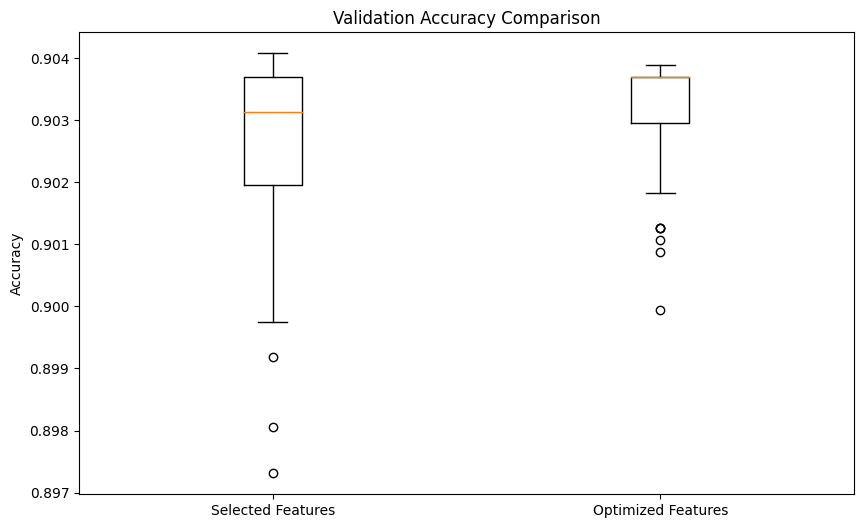

In [225]:
# 生成性能分数箱型图
plt.figure(figsize=(10, 6))
plt.boxplot([history_sel.history['val_accuracy'], history_optimized.history['val_accuracy']], 
            labels=['Selected Features', 'Optimized Features'])
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

- 箱型图（Validation Accuracy Comparison）：

- Selected Features：验证准确率的中位数约为0.903，分布范围较大，有多个低于0.902的异常值。
- Optimized Features：验证准确率的中位数约为0.904，分布范围较小，没有显著的异常值。
- 解释说明
- 验证准确率和稳定性：

- Optimized Features：验证准确率中位数略高，分布范围较小，数据分布更加集中，表现更稳定。
- Selected Features：验证准确率的分布范围较大，有多个异常值，表现不如优化后的特征稳定。
- 结论：

- Optimized Features 更好。验证准确率略有提升且更加稳定，说明通过特征选择和添加Dropout层的优化策略有效减少了过拟合，提高了模型的泛化能力。

- 构建多层模型

Epoch 1/100
1551/1551 [==============================] - 11s 6ms/step - loss: 0.0921 - accuracy: 0.9067 - val_loss: 0.0937 - val_accuracy: 0.9037
Epoch 2/100
1551/1551 [==============================] - 8s 5ms/step - loss: 0.0915 - accuracy: 0.9067 - val_loss: 0.0931 - val_accuracy: 0.9037
Epoch 3/100
1551/1551 [==============================] - 9s 6ms/step - loss: 0.0913 - accuracy: 0.9067 - val_loss: 0.0932 - val_accuracy: 0.9037
Epoch 4/100
1551/1551 [==============================] - 9s 6ms/step - loss: 0.0912 - accuracy: 0.9067 - val_loss: 0.0934 - val_accuracy: 0.9037
Epoch 5/100
1551/1551 [==============================] - 9s 6ms/step - loss: 0.0910 - accuracy: 0.9067 - val_loss: 0.0931 - val_accuracy: 0.9037
Epoch 6/100
1551/1551 [==============================] - 9s 6ms/step - loss: 0.0909 - accuracy: 0.9067 - val_loss: 0.0931 - val_accuracy: 0.9037
Epoch 7/100
1551/1551 [==============================] - 9s 6ms/step - loss: 0.0909 - accuracy: 0.9067 - val_loss: 0.0931 - val_a

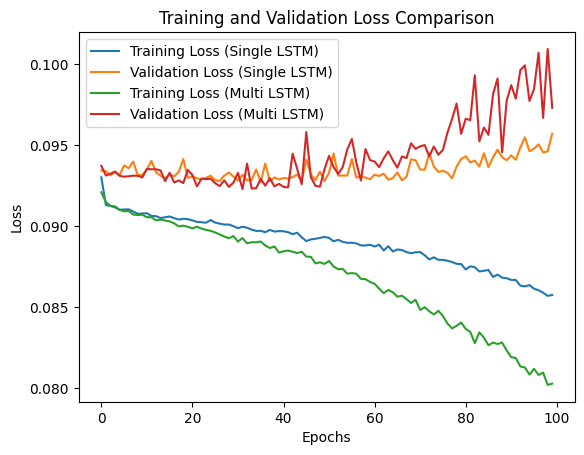

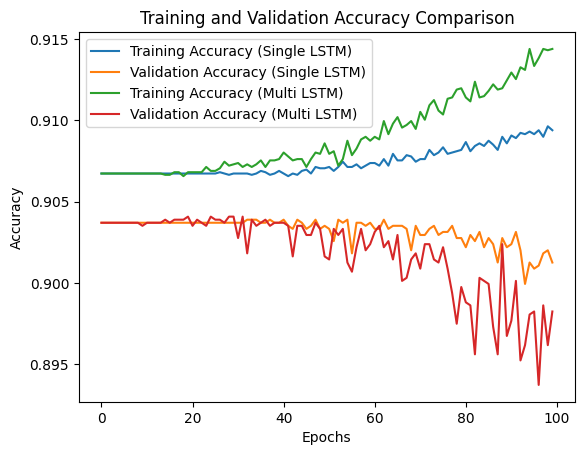

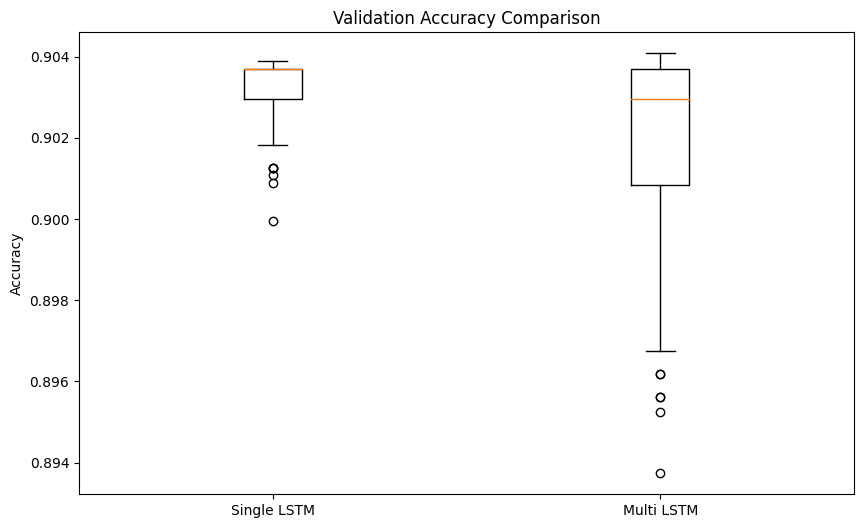

In [226]:
# 构建多层LSTM模型，并添加Dropout层
model_multi_lstm = Sequential()
model_multi_lstm.add(LSTM(150, return_sequences=True, input_shape=(time_step, X_train_opt.shape[2])))
model_multi_lstm.add(LSTM(150))
model_multi_lstm.add(Dropout(0.2))  # 添加Dropout层
model_multi_lstm.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_multi_lstm = tf.keras.optimizers.Adam(learning_rate=0.001)
model_multi_lstm.compile(optimizer=optimizer_multi_lstm, loss='mse', metrics=['accuracy'])

# 训练模型
history_multi_lstm = model_multi_lstm.fit(X_train_opt, y_train_opt, epochs=100, batch_size=8, validation_data=(X_test_opt, y_test_opt))

# 评估模型
loss_multi_lstm, accuracy_multi_lstm = model_multi_lstm.evaluate(X_test_opt, y_test_opt)
print(f'Test Loss (Multi LSTM): {loss_multi_lstm}, Test Accuracy (Multi LSTM): {accuracy_multi_lstm}')

# 可视化训练和验证损失
plt.plot(history_optimized.history['loss'], label='Training Loss (Single LSTM)')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss (Single LSTM)')
plt.plot(history_multi_lstm.history['loss'], label='Training Loss (Multi LSTM)')
plt.plot(history_multi_lstm.history['val_loss'], label='Validation Loss (Multi LSTM)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy (Single LSTM)')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy (Single LSTM)')
plt.plot(history_multi_lstm.history['accuracy'], label='Training Accuracy (Multi LSTM)')
plt.plot(history_multi_lstm.history['val_accuracy'], label='Validation Accuracy (Multi LSTM)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 生成性能分数箱型图
plt.figure(figsize=(10, 6))
plt.boxplot([history_optimized.history['val_accuracy'], history_multi_lstm.history['val_accuracy']], 
            labels=['Single LSTM', 'Multi LSTM'])
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

- 验证准确率和稳定性：

- Single LSTM：验证准确率的中位数略高，分布范围较小，表现更稳定，说明单层LSTM模型在该数据集上效果更好。
- Multi LSTM：验证准确率的中位数略低，分布范围较大，存在多个异常值，表现不如单层LSTM稳定。
- 结论：

- 从结果来看，单层LSTM模型在验证集上的表现比多层LSTM更好，验证准确率更高且更稳定。
- 虽然多层LSTM模型在理论上能够捕捉更多复杂的时序特征，但在该数据集上并未表现出明显的优势，反而增加了模型复杂性和不稳定性。

- 接下来对使用了TextBlob情感分析的数据集执行信任过滤器，并采用单层LSTM，与之前单层的结果进行对比，看看信任过滤器是否提升了预测准确性。

In [227]:
df = pd.read_csv('TextBlob.csv')
df

Subreddit       Keyword  \
0        stocks         Apple   
1        stocks         Apple   
2        stocks         Apple   
3        stocks         Apple   
4        stocks         Apple   
...         ...           ...   
17722   finance  Apple Market   
17723   finance  Apple Market   
17724   finance  Apple Market   
17725   finance  Apple Market   
17726   finance  Apple Market   

                                                   Title  \
0      Apple Ditches iPhone Production Increase After...   
1      Apple Ditches iPhone Production Increase After...   
2      Apple Ditches iPhone Production Increase After...   
3      Apple Ditches iPhone Production Increase After...   
4      Apple Ditches iPhone Production Increase After...   
...                                                  ...   
17722  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17723  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17724  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17725  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17726  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   

                                                 Content  Likes  Num_Comments  \
0      Apple Inc. is backing off plans to increase pr...   2031           538   
1      Apple Inc. is backing off plans to increase pr...   2031           538   
2      Apple Inc. is backing off plans to increase pr...   2031           538   
3      Apple Inc. is backing off plans to increase pr...   2031           538   
4      Apple Inc. is backing off plans to increase pr...   2031           538   
...                                                  ...    ...           ...   
17722                               No content available    557            52   
17723                               No content available    557            52   
17724                               No content available    557            52   
17725                               No content available    557            52   
17726                               No content available    557            52   

             Author                                     Submission_URL  \
0          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
1          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
2          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
3          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
4          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
...             ...                                                ...   
17722  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17723  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17724  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17725  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17726  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   

                                                 Comment  Comment_Score  ...  \
0                           If Apple falls we all fall 🙄            391  ...   
1                             Nice tomorrow is a -3% day            381  ...   
2      Just read the article… of course lol. Typical ...            272  ...   
3      As awful as this may be for the market in the ...            162  ...   
4      Luxury good suffer during a recession.  \n\nGu...            116  ...   
...                                                  ...            ...  ...   
17722  They have been trying to sell for several year...              2  ...   
17723  I believe it’s the same company that will soon...              1  ...   
17724       Got to make up for the investment in WeWork.              1  ...   
17725  Where are all the sceptics who were worried ab...              1  ...   
17726  Arm is currently most valuable company on the ...             -1  ...   

            SMA_5      SMA_10      SMA_30        RSI      MACD  \

In [228]:
# 计算信任分数函数
def calculate_trust_score(row, likes_weight=0.5, comments_weight=0.5):
    try:
        trust_score = (row['Likes'] * likes_weight) + (row['Num_Comments'] * comments_weight)
    except KeyError as e:
        print(f"KeyError: {e} in row {row}")
        trust_score = 0  # 处理异常情况
    return trust_score

# 定义信任过滤器函数
def trust_filter(df, method='median'):
    df['Trust_Score'] = df.apply(calculate_trust_score, axis=1)
    
    if method == 'mean': # 平均数
        threshold = df['Trust_Score'].mean()
    elif method == 'median':# 中位数
        threshold = df['Trust_Score'].median()
    elif method == 'q1': # 第一四分位数
        threshold = df['Trust_Score'].quantile(0.25)
    elif method == 'q3': # 第三四分位数
        threshold = df['Trust_Score'].quantile(0.75)
    elif method == 'std': # 标准差
        threshold = df['Trust_Score'].mean() + df['Trust_Score'].std()
    elif method == 'percentile': # 自定义
        threshold = df['Trust_Score'].quantile(0.75)  # 第75百分位数
    else:
        raise ValueError("Unsupported method for threshold calculation")
    
    print(f"Selected threshold ({method}): {threshold}")
    
    return df[df['Trust_Score'] >= threshold]

In [229]:
# 应用信任过滤器
df = trust_filter(df, method='median')

Selected threshold (median): 155.5


In [230]:
df.to_csv('TextBlob_Trustfilter.csv', index = False,quoting=csv.QUOTE_NONNUMERIC)

In [231]:
df

Subreddit       Keyword  \
0        stocks         Apple   
1        stocks         Apple   
2        stocks         Apple   
3        stocks         Apple   
4        stocks         Apple   
...         ...           ...   
17722   finance  Apple Market   
17723   finance  Apple Market   
17724   finance  Apple Market   
17725   finance  Apple Market   
17726   finance  Apple Market   

                                                   Title  \
0      Apple Ditches iPhone Production Increase After...   
1      Apple Ditches iPhone Production Increase After...   
2      Apple Ditches iPhone Production Increase After...   
3      Apple Ditches iPhone Production Increase After...   
4      Apple Ditches iPhone Production Increase After...   
...                                                  ...   
17722  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17723  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17724  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17725  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17726  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   

                                                 Content  Likes  Num_Comments  \
0      Apple Inc. is backing off plans to increase pr...   2031           538   
1      Apple Inc. is backing off plans to increase pr...   2031           538   
2      Apple Inc. is backing off plans to increase pr...   2031           538   
3      Apple Inc. is backing off plans to increase pr...   2031           538   
4      Apple Inc. is backing off plans to increase pr...   2031           538   
...                                                  ...    ...           ...   
17722                               No content available    557            52   
17723                               No content available    557            52   
17724                               No content available    557            52   
17725                               No content available    557            52   
17726                               No content available    557            52   

             Author                                     Submission_URL  \
0          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
1          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
2          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
3          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
4          Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
...             ...                                                ...   
17722  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17723  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17724  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17725  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17726  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   

                                                 Comment  Comment_Score  ...  \
0                           If Apple falls we all fall 🙄            391  ...   
1                             Nice tomorrow is a -3% day            381  ...   
2      Just read the article… of course lol. Typical ...            272  ...   
3      As awful as this may be for the market in the ...            162  ...   
4      Luxury good suffer during a recession.  \n\nGu...            116  ...   
...                                                  ...            ...  ...   
17722  They have been trying to sell for several year...              2  ...   
17723  I believe it’s the same company that will soon...              1  ...   
17724       Got to make up for the investment in WeWork.              1  ...   
17725  Where are all the sceptics who were worried ab...              1  ...   
17726  Arm is currently most valuable company on the ...             -1  ...   

           SMA_10      SMA_30        RSI      MACD  Bollinger_Hig

Epoch 1/100
776/776 [==============================] - 4s 4ms/step - loss: 0.0870 - accuracy: 0.9142 - val_loss: 0.0867 - val_accuracy: 0.9124
Epoch 2/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0852 - accuracy: 0.9142 - val_loss: 0.0870 - val_accuracy: 0.9124
Epoch 3/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0851 - accuracy: 0.9142 - val_loss: 0.0868 - val_accuracy: 0.9124
Epoch 4/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0847 - accuracy: 0.9142 - val_loss: 0.0868 - val_accuracy: 0.9124
Epoch 5/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0847 - accuracy: 0.9142 - val_loss: 0.0870 - val_accuracy: 0.9124
Epoch 6/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0846 - accuracy: 0.9142 - val_loss: 0.0870 - val_accuracy: 0.9124
Epoch 7/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0846 - accuracy: 0.9142 - val_loss: 0.0867 - val_accuracy: 0.9124

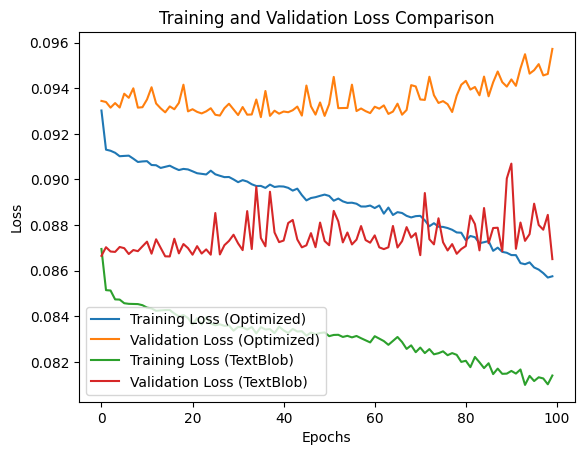

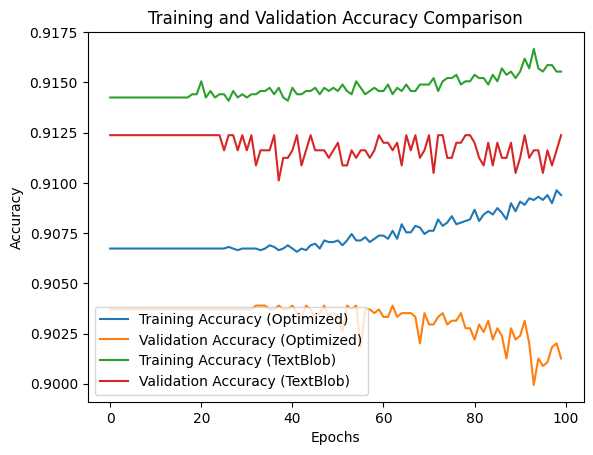

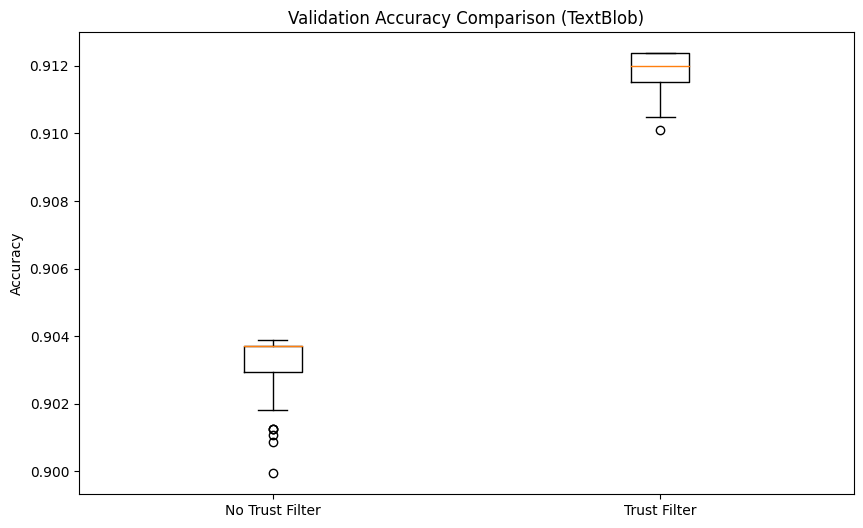

In [232]:
from sklearn.preprocessing import MinMaxScaler

# 选择特征和标签
features_textblob = df[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]
labels_textblob = df['Trend']

# 数据标准化
scaler = MinMaxScaler()
features_textblob_scaled = scaler.fit_transform(features_textblob)

# 滑动窗口函数
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 设置滑动窗口大小
time_step = 5  # 一周交易日为5天

# 创建训练集和测试集
X_textblob, y_textblob = create_dataset(features_textblob_scaled, labels_textblob.values, time_step)
X_train_textblob, X_test_textblob, y_train_textblob, y_test_textblob = train_test_split(X_textblob, y_textblob, test_size=0.3, random_state=42)

# 构建单层LSTM模型，并添加Dropout层
model_textblob = Sequential()
model_textblob.add(LSTM(150, input_shape=(time_step, X_train_textblob.shape[2])))
model_textblob.add(Dropout(0.2))  # 添加Dropout层
model_textblob.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_textblob = tf.keras.optimizers.Adam(learning_rate=0.001)
model_textblob.compile(optimizer=optimizer_textblob, loss='mse', metrics=['accuracy'])

# 训练模型
history_textblob = model_textblob.fit(X_train_textblob, y_train_textblob, epochs=100, batch_size=8, validation_data=(X_test_textblob, y_test_textblob))

# 评估模型
loss_textblob, accuracy_textblob = model_textblob.evaluate(X_test_textblob, y_test_textblob)
print(f'Test Loss (TextBlob): {loss_textblob}, Test Accuracy (TextBlob): {accuracy_textblob}')

# 可视化训练和验证损失
plt.plot(history_optimized.history['loss'], label='Training Loss (Optimized)')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss (Optimized)')
plt.plot(history_textblob.history['loss'], label='Training Loss (TextBlob)')
plt.plot(history_textblob.history['val_loss'], label='Validation Loss (TextBlob)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy (Optimized)')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy (Optimized)')
plt.plot(history_textblob.history['accuracy'], label='Training Accuracy (TextBlob)')
plt.plot(history_textblob.history['val_accuracy'], label='Validation Accuracy (TextBlob)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 生成性能分数箱型图
plt.figure(figsize=(10, 6))
plt.boxplot([history_optimized.history['val_accuracy'], history_textblob.history['val_accuracy']], 
            labels=['No Trust Filter', 'Trust Filter'])
plt.title('Validation Accuracy Comparison (TextBlob)')
plt.ylabel('Accuracy')
plt.show()

- 解释说明
    - 验证准确率和稳定性：

        - Trust Filter：验证准确率的中位数显著高于未使用信任过滤器的模型（约0.912 vs. 0.904），说明使用信任过滤器显著提高了模型的预测准确率。虽然分布范围较大，存在一些异常值，但整体表现更好。
        - No Trust Filter：验证准确率的中位数较低，分布范围较小，表现较为稳定，但准确率较低。
    - 结论：

        - 使用信任过滤器后的模型在验证集上的准确率显著提升，这表明信任过滤器在一定程度上有效过滤掉了低质量数据，增强了模型的泛化能力。
        - 虽然使用信任过滤器的模型存在一些异常值，但整体准确率的提高说明其优势明显。

- 对filtertime_cleaned.csv执行信任过滤器，然后使用LLM进行情感分析

In [233]:
filtertime_cleaned = pd.read_csv('filtertime_cleaned.csv')

import ta

# 计算技术指标
filtertime_cleaned['SMA_5'] = ta.trend.sma_indicator(filtertime_cleaned['Close'], window=5)
filtertime_cleaned['SMA_10'] = ta.trend.sma_indicator(filtertime_cleaned['Close'], window=10)
filtertime_cleaned['SMA_30'] = ta.trend.sma_indicator(filtertime_cleaned['Close'], window=30)
filtertime_cleaned['RSI'] = ta.momentum.rsi(filtertime_cleaned['Close'])
filtertime_cleaned['MACD'] = ta.trend.macd_diff(filtertime_cleaned['Close'])
filtertime_cleaned['Bollinger_High'] = ta.volatility.bollinger_hband(filtertime_cleaned['Close'])
filtertime_cleaned['Bollinger_Low'] = ta.volatility.bollinger_lband(filtertime_cleaned['Close'])

# 提取时间特征
filtertime_cleaned['Weekday'] = pd.to_datetime(filtertime_cleaned['Date']).dt.dayofweek
filtertime_cleaned['Month'] = pd.to_datetime(filtertime_cleaned['Date']).dt.month

# 填充缺失值
filtertime_cleaned.fillna(method='ffill', inplace=True)
# 删除含有NaN值的行
filtertime_cleaned = filtertime_cleaned.dropna()

# 添加趋势标签：1表示上涨，-1表示下跌，0表示横盘
filtertime_cleaned['Trend'] = filtertime_cleaned['Close'].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# 执行信任过滤器
filtertime_cleaned = trust_filter(filtertime_cleaned, method='median')

# 保存一个执行完信任过滤器但还没进行llm情感分析的数据集
filtertime_cleaned.to_csv('Trustfilter.csv', index = False,quoting=csv.QUOTE_NONNUMERIC)

Selected threshold (median): 155.5


In [234]:
filtertime_cleaned

Subreddit       Keyword  \
33       stocks         Apple   
34       stocks         Apple   
35       stocks         Apple   
36       stocks         Apple   
37       stocks         Apple   
...         ...           ...   
17755   finance  Apple Market   
17756   finance  Apple Market   
17757   finance  Apple Market   
17758   finance  Apple Market   
17759   finance  Apple Market   

                                                   Title  \
33     Apple Ditches iPhone Production Increase After...   
34     Apple Ditches iPhone Production Increase After...   
35     Apple Ditches iPhone Production Increase After...   
36     Apple Ditches iPhone Production Increase After...   
37     Apple Ditches iPhone Production Increase After...   
...                                                  ...   
17755  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17756  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17757  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17758  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
17759  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   

                                                 Content  Likes  Num_Comments  \
33     Apple Inc. is backing off plans to increase pr...   2031           538   
34     Apple Inc. is backing off plans to increase pr...   2031           538   
35     Apple Inc. is backing off plans to increase pr...   2031           538   
36     Apple Inc. is backing off plans to increase pr...   2031           538   
37     Apple Inc. is backing off plans to increase pr...   2031           538   
...                                                  ...    ...           ...   
17755                               No content available    557            52   
17756                               No content available    557            52   
17757                               No content available    557            52   
17758                               No content available    557            52   
17759                               No content available    557            52   

             Author                                     Submission_URL  \
33         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
34         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
35         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
36         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
37         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
...             ...                                                ...   
17755  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17756  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17757  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17758  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
17759  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   

                                                 Comment  Comment_Score  ...  \
33                          If Apple falls we all fall 🙄            391  ...   
34                            Nice tomorrow is a -3% day            381  ...   
35     Just read the article… of course lol. Typical ...            272  ...   
36     As awful as this may be for the market in the ...            162  ...   
37     Luxury good suffer during a recession.  \n\nGu...            116  ...   
...                                                  ...            ...  ...   
17755  They have been trying to sell for several year...              2  ...   
17756  I believe it’s the same company that will soon...              1  ...   
17757       Got to make up for the investment in WeWork.              1  ...   
17758  Where are all the sceptics who were worried ab...              1  ...   
17759  Arm is currently most valuable company on the ...             -1  ...   

           SMA_10      SMA_30        RSI      MACD  Bollinger_Hig

In [235]:
from transformers import pipeline, AutoTokenizer
# 加载情感分析模型和分词器
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analyzer = pipeline('sentiment-analysis', model=model_name)
    
# 对文本进行情感分析的函数
def sentiment_analysis(text):
    if not isinstance(text, str):
        text = str(text)
    
    max_length = tokenizer.model_max_length - 2  # 减去2以避免边界问题
    tokens = tokenizer(text, truncation=True, padding=True, return_tensors="pt", max_length=max_length).input_ids

    # 分割文本为多个段落
    num_chunks = len(tokens[0]) // max_length + 1
    chunks = [tokens[0][i * max_length:(i + 1) * max_length] for i in range(num_chunks)]
    
    sentiment_scores = []
    for chunk in chunks:
        truncated_text = tokenizer.decode(chunk, skip_special_tokens=True)
        result = sentiment_analyzer(truncated_text)
        sentiment_scores.append(result[0]['score'] * (1 if result[0]['label'] == 'POSITIVE' else -1))
    
    # 计算平均情感得分
    if sentiment_scores:
        avg_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
        overall_sentiment = 'POSITIVE' if avg_sentiment_score > 0 else 'NEGATIVE'
        return overall_sentiment, avg_sentiment_score
    else:
        return 'NEUTRAL', 0.0

In [236]:
# 对评论和帖子进行情感分析
filtertime_cleaned[['Content_Sentiment', 'Content_Sentiment_Score']] = filtertime_cleaned['Processed_Content'].apply(
    lambda x: pd.Series(sentiment_analysis(x))
)
filtertime_cleaned[['Comment_Sentiment', 'Comment_Sentiment_Score']] = filtertime_cleaned['Processed_Comment'].apply(
    lambda x: pd.Series(sentiment_analysis(x))
)

In [237]:
filtertime_cleaned.to_csv('LLM.csv', index = False,quoting=csv.QUOTE_NONNUMERIC)

In [238]:
df_llm = pd.read_csv('LLM.csv')

Epoch 1/100
776/776 [==============================] - 5s 5ms/step - loss: 0.0877 - accuracy: 0.9142 - val_loss: 0.0875 - val_accuracy: 0.9124
Epoch 2/100
776/776 [==============================] - 3s 4ms/step - loss: 0.0853 - accuracy: 0.9142 - val_loss: 0.0869 - val_accuracy: 0.9124
Epoch 3/100
776/776 [==============================] - 4s 5ms/step - loss: 0.0852 - accuracy: 0.9142 - val_loss: 0.0869 - val_accuracy: 0.9124
Epoch 4/100
776/776 [==============================] - 4s 5ms/step - loss: 0.0845 - accuracy: 0.9142 - val_loss: 0.0868 - val_accuracy: 0.9124
Epoch 5/100
776/776 [==============================] - 4s 5ms/step - loss: 0.0848 - accuracy: 0.9142 - val_loss: 0.0872 - val_accuracy: 0.9124
Epoch 6/100
776/776 [==============================] - 4s 5ms/step - loss: 0.0845 - accuracy: 0.9142 - val_loss: 0.0869 - val_accuracy: 0.9124
Epoch 7/100
776/776 [==============================] - 4s 5ms/step - loss: 0.0844 - accuracy: 0.9142 - val_loss: 0.0868 - val_accuracy: 0.9124

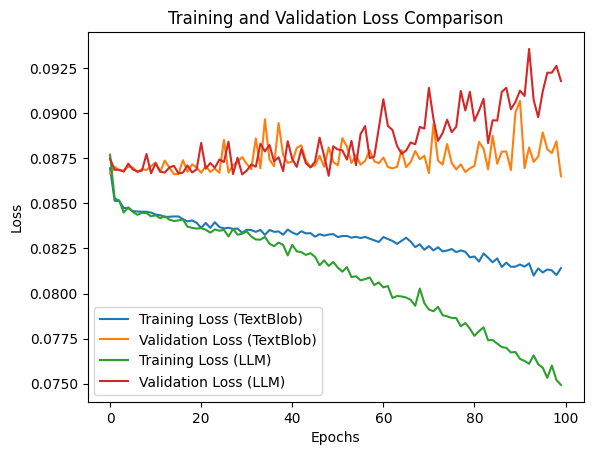

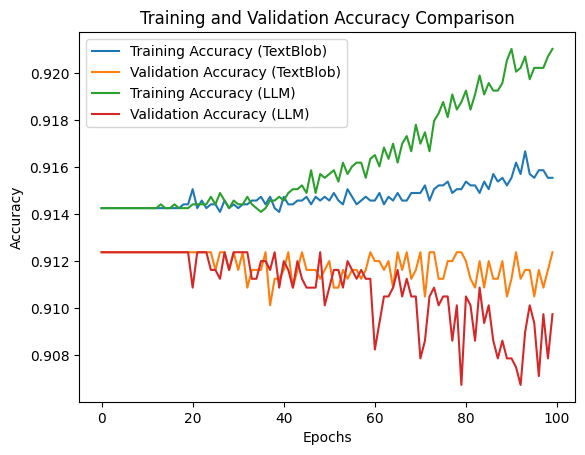

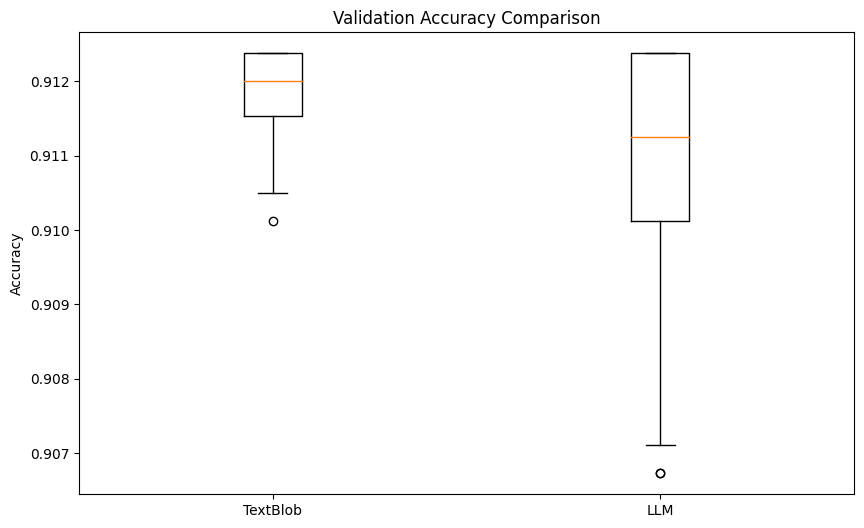

In [392]:
# 特征选择
selected_features_llm = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']
features_llm = df_llm[selected_features_llm]
labels_llm = df_llm['Trend']

# 数据标准化
scaler_llm = MinMaxScaler()
features_scaled_llm = scaler_llm.fit_transform(features_llm)

# 滑动窗口函数
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 设置滑动窗口大小
time_step = 5  # 一周交易日为5天

# 创建训练集和测试集
X_llm, y_llm = create_dataset(features_scaled_llm, labels_llm.values, time_step)
X_train_llm, X_test_llm, y_train_llm, y_test_llm = train_test_split(X_llm, y_llm, test_size=0.3, random_state=42)

# 构建单层LSTM模型，并添加Dropout层
model_llm = Sequential()
model_llm.add(LSTM(150, input_shape=(time_step, X_train_llm.shape[2])))
model_llm.add(Dropout(0.2))  # 添加Dropout层
model_llm.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_llm = tf.keras.optimizers.Adam(learning_rate=0.001)
model_llm.compile(optimizer=optimizer_llm, loss='mse', metrics=['accuracy'])

# 训练模型
history_llm = model_llm.fit(X_train_llm, y_train_llm, epochs=100, batch_size=8, validation_data=(X_test_llm, y_test_llm))

# 评估模型
loss_llm, accuracy_llm = model_llm.evaluate(X_test_llm, y_test_llm)
print(f'Test Loss (LLM): {loss_llm}, Test Accuracy (LLM): {accuracy_llm}')

# 可视化训练和验证损失
plt.plot(history_textblob.history['loss'], label='Training Loss (TextBlob)')
plt.plot(history_textblob.history['val_loss'], label='Validation Loss (TextBlob)')
plt.plot(history_llm.history['loss'], label='Training Loss (LLM)')
plt.plot(history_llm.history['val_loss'], label='Validation Loss (LLM)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率
plt.plot(history_textblob.history['accuracy'], label='Training Accuracy (TextBlob)')
plt.plot(history_textblob.history['val_accuracy'], label='Validation Accuracy (TextBlob)')
plt.plot(history_llm.history['accuracy'], label='Training Accuracy (LLM)')
plt.plot(history_llm.history['val_accuracy'], label='Validation Accuracy (LLM)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 生成性能分数箱型图
plt.figure(figsize=(10, 6))
plt.boxplot([history_textblob.history['val_accuracy'], history_llm.history['val_accuracy']], 
            labels=['TextBlob', 'LLM'])
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

In [240]:
df_no_sentiment = pd.read_csv('Trustfilter.csv')

Epoch 1/100
776/776 [==============================] - 10s 8ms/step - loss: 0.0878 - accuracy: 0.9142 - val_loss: 0.0875 - val_accuracy: 0.9124
Epoch 2/100
776/776 [==============================] - 6s 8ms/step - loss: 0.0854 - accuracy: 0.9142 - val_loss: 0.0871 - val_accuracy: 0.9124
Epoch 3/100
776/776 [==============================] - 6s 8ms/step - loss: 0.0848 - accuracy: 0.9142 - val_loss: 0.0867 - val_accuracy: 0.9124
Epoch 4/100
776/776 [==============================] - 6s 8ms/step - loss: 0.0847 - accuracy: 0.9142 - val_loss: 0.0869 - val_accuracy: 0.9124
Epoch 5/100
776/776 [==============================] - 6s 8ms/step - loss: 0.0847 - accuracy: 0.9142 - val_loss: 0.0869 - val_accuracy: 0.9124
Epoch 6/100
776/776 [==============================] - 6s 8ms/step - loss: 0.0845 - accuracy: 0.9142 - val_loss: 0.0881 - val_accuracy: 0.9124
Epoch 7/100
776/776 [==============================] - 6s 8ms/step - loss: 0.0843 - accuracy: 0.9142 - val_loss: 0.0877 - val_accuracy: 0.912

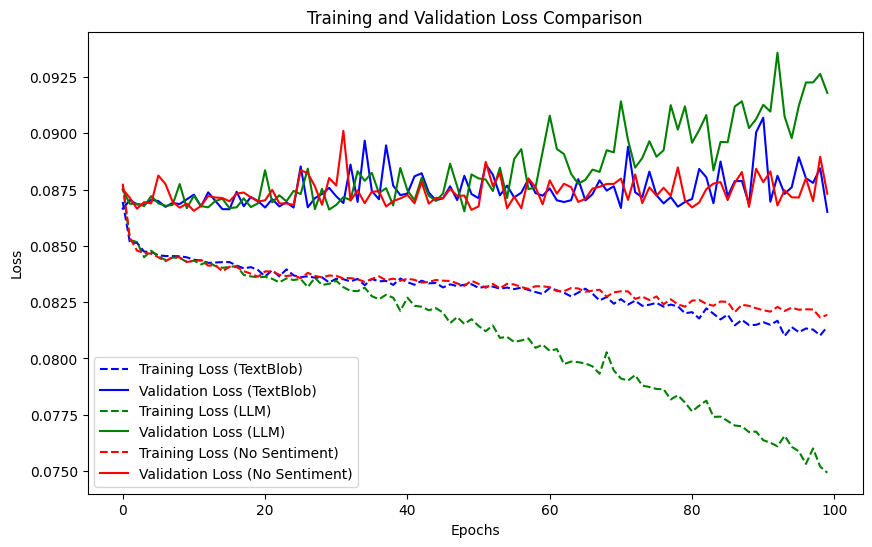

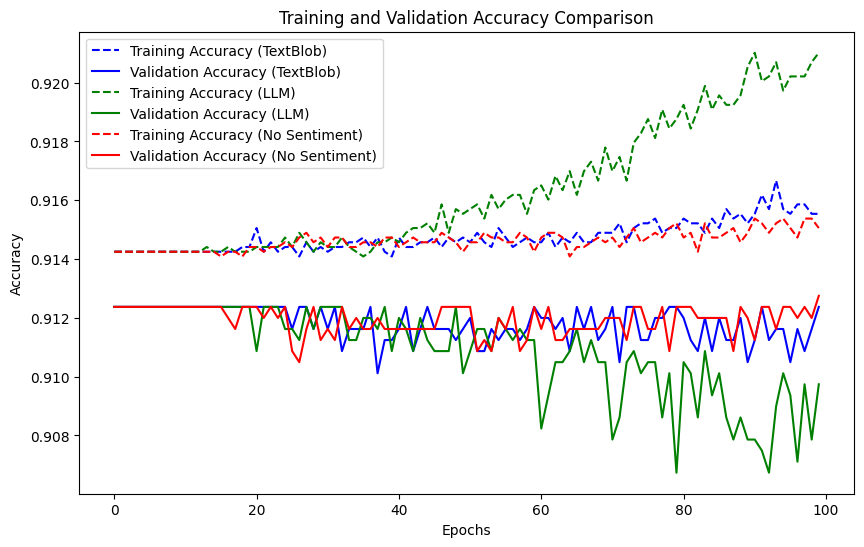

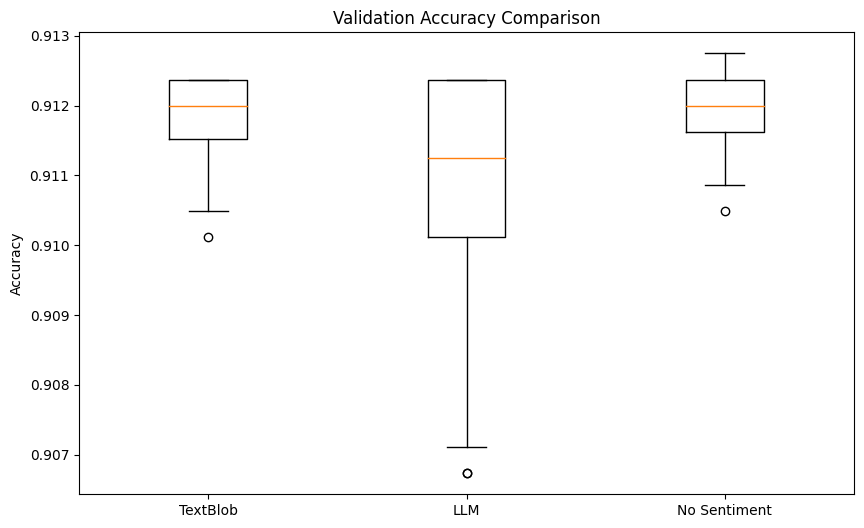

In [393]:
# 特征选择
selected_features_no_sentiment = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10']
features_no_sentiment = df_no_sentiment[selected_features_no_sentiment]
labels_no_sentiment = df_no_sentiment['Trend']

# 数据标准化
scaler_no_sentiment = MinMaxScaler()
features_scaled_no_sentiment = scaler_no_sentiment.fit_transform(features_no_sentiment)

# 滑动窗口函数
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 设置滑动窗口大小
time_step = 5  # 一周交易日为5天

# 创建训练集和测试集
X_no_sentiment, y_no_sentiment = create_dataset(features_scaled_no_sentiment, labels_no_sentiment.values, time_step)
X_train_no_sentiment, X_test_no_sentiment, y_train_no_sentiment, y_test_no_sentiment = train_test_split(X_no_sentiment, y_no_sentiment, test_size=0.3, random_state=42)

# 构建单层LSTM模型，并添加Dropout层
model_no_sentiment = Sequential()
model_no_sentiment.add(LSTM(150, input_shape=(time_step, X_train_no_sentiment.shape[2])))
model_no_sentiment.add(Dropout(0.2))  # 添加Dropout层
model_no_sentiment.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_no_sentiment = tf.keras.optimizers.Adam(learning_rate=0.001)
model_no_sentiment.compile(optimizer=optimizer_no_sentiment, loss='mse', metrics=['accuracy'])

# 训练模型
history_no_sentiment = model_no_sentiment.fit(X_train_no_sentiment, y_train_no_sentiment, epochs=100, batch_size=8, validation_data=(X_test_no_sentiment, y_test_no_sentiment))

# 评估模型
loss_no_sentiment, accuracy_no_sentiment = model_no_sentiment.evaluate(X_test_no_sentiment, y_test_no_sentiment)
print(f'Test Loss (No Sentiment): {loss_no_sentiment}, Test Accuracy (No Sentiment): {accuracy_no_sentiment}')

# 可视化训练和验证损失
plt.figure(figsize=(10, 6))

# TextBlob
plt.plot(history_textblob.history['loss'], 'b--', label='Training Loss (TextBlob)')
plt.plot(history_textblob.history['val_loss'], 'b-', label='Validation Loss (TextBlob)')

# LLM
plt.plot(history_llm.history['loss'], 'g--', label='Training Loss (LLM)')
plt.plot(history_llm.history['val_loss'], 'g-', label='Validation Loss (LLM)')

# No Sentiment
plt.plot(history_no_sentiment.history['loss'], 'r--', label='Training Loss (No Sentiment)')
plt.plot(history_no_sentiment.history['val_loss'], 'r-', label='Validation Loss (No Sentiment)')

plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率
plt.figure(figsize=(10, 6))

# TextBlob
plt.plot(history_textblob.history['accuracy'], 'b--', label='Training Accuracy (TextBlob)')
plt.plot(history_textblob.history['val_accuracy'], 'b-', label='Validation Accuracy (TextBlob)')

# LLM
plt.plot(history_llm.history['accuracy'], 'g--', label='Training Accuracy (LLM)')
plt.plot(history_llm.history['val_accuracy'], 'g-', label='Validation Accuracy (LLM)')

# No Sentiment
plt.plot(history_no_sentiment.history['accuracy'], 'r--', label='Training Accuracy (No Sentiment)')
plt.plot(history_no_sentiment.history['val_accuracy'], 'r-', label='Validation Accuracy (No Sentiment)')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 生成性能分数箱型图
plt.figure(figsize=(10, 6))
plt.boxplot([history_textblob.history['val_accuracy'], history_llm.history['val_accuracy'], history_no_sentiment.history['val_accuracy']], 
            labels=['TextBlob', 'LLM', 'No Sentiment'])
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

- 加入验证损失随着时间的推移增加的情况下进行统计显著性检验（如计算p值）

P-value (TextBlob vs LLM): 9.78322273759621e-08
P-value (TextBlob vs No Sentiment): 0.40612689573768745
P-value (LLM vs No Sentiment): 3.0785172639789203e-09


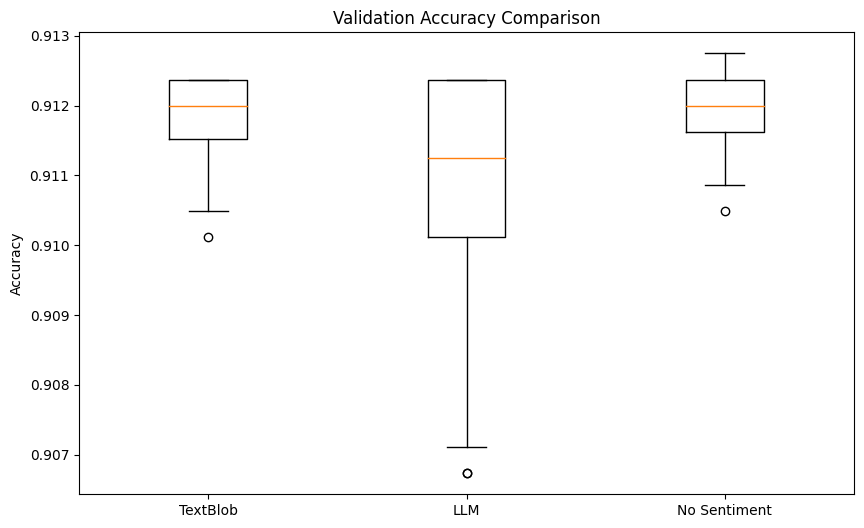

In [396]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 特征选择和数据标准化部分省略...

# 滑动窗口函数和训练集/测试集创建部分省略...

# 构建模型、编译和训练模型部分省略...

# 计算验证损失的均值和标准差
mean_val_loss_textblob = np.mean(history_textblob.history['val_loss'])
std_val_loss_textblob = np.std(history_textblob.history['val_loss'])

mean_val_loss_llm = np.mean(history_llm.history['val_loss'])
std_val_loss_llm = np.std(history_llm.history['val_loss'])

mean_val_loss_no_sentiment = np.mean(history_no_sentiment.history['val_loss'])
std_val_loss_no_sentiment = np.std(history_no_sentiment.history['val_loss'])

# 进行t检验或Wilcoxon检验来计算p值
# t检验
t_statistic_textblob_vs_llm, p_value_textblob_vs_llm = stats.ttest_ind(history_textblob.history['val_loss'], history_llm.history['val_loss'])
t_statistic_textblob_vs_no_sentiment, p_value_textblob_vs_no_sentiment = stats.ttest_ind(history_textblob.history['val_loss'], history_no_sentiment.history['val_loss'])
t_statistic_llm_vs_no_sentiment, p_value_llm_vs_no_sentiment = stats.ttest_ind(history_llm.history['val_loss'], history_no_sentiment.history['val_loss'])

# 或者使用非参数检验如Wilcoxon检验
# wilcoxon_textblob_vs_llm, p_value_textblob_vs_llm = stats.wilcoxon(history_textblob.history['val_loss'], history_llm.history['val_loss'])
# wilcoxon_textblob_vs_no_sentiment, p_value_textblob_vs_no_sentiment = stats.wilcoxon(history_textblob.history['val_loss'], history_no_sentiment.history['val_loss'])
# wilcoxon_llm_vs_no_sentiment, p_value_llm_vs_no_sentiment = stats.wilcoxon(history_llm.history['val_loss'], history_no_sentiment.history['val_loss'])

# 打印p值
print(f"P-value (TextBlob vs LLM): {p_value_textblob_vs_llm}")
print(f"P-value (TextBlob vs No Sentiment): {p_value_textblob_vs_no_sentiment}")
print(f"P-value (LLM vs No Sentiment): {p_value_llm_vs_no_sentiment}")

# 生成性能分数箱型图
plt.figure(figsize=(10, 6))
plt.boxplot([history_textblob.history['val_accuracy'], history_llm.history['val_accuracy'], history_no_sentiment.history['val_accuracy']], 
            labels=['TextBlob', 'LLM', 'No Sentiment'])
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# 显示统计检验的结


- 解释说明
    1. 验证准确率和稳定性：

        - TextBlob：验证准确率的中位数最高，分布范围较小，表现较为稳定，表明TextBlob在情感分析中提供了有用的信息，帮助提升了模型的准确率。
        - LLM：验证准确率的中位数略低于TextBlob，分布范围较大，存在一些异常值，表明LLM在情感分析中的表现不如TextBlob稳定，可能是由于模型在处理长文本时存在一定的波动。
        - No Sentiment：验证准确率与TextBlob相当，但分布范围中等，表明即使不使用情感分析，模型也能达到较高的准确率，但稳定性稍逊于TextBlob。
    2. 过拟合现象：

        - LLM：训练准确率不断提升，但验证准确率在后期出现较大波动，表明模型在训练集上过拟合，对验证集的泛化能力较弱。
        - TextBlob和No Sentiment：训练和验证准确率较为接近，表现出较好的稳定性和泛化能力。
    3. 情感分析的作用：

        - TextBlob的情感分析在一定程度上提升了模型的准确率和稳定性，表现优于LLM和不使用情感分析的模型。
        - LLM在情感分析中的表现不如预期，可能是由于处理长文本时存在一定的问题或过拟合现象。
        - No Sentiment的模型也能达到较高的准确率，但加入TextBlob的情感分析后，模型的表现更为稳定，验证准确率略有提升。
- 总结
    1. 选择TextBlob：根据结果，使用TextBlob进行情感分析的模型在验证准确率和稳定性上表现最佳。
    2. 关注过拟合：LLM模型存在过拟合现象，建议在使用LLM进行情感分析时加入更多的正则化措施，或者进行更多的超参数调优。
    3. 情感分析的价值：情感分析确实能在一定程度上提升预测的准确率和稳定性，但需要选择合适的情感分析方法，并注意模型的泛化能力。
- 建议
    1. 进一步优化TextBlob模型：可以进行超参数调优，尝试不同的LSTM单元数、Dropout率、学习率等，以进一步提升模型性能。
    2. 正则化和数据增强：在LLM模型中加入更多的正则化措施，或进行数据增强，以减少过拟合现象。
    3. 更多特征工程：尝试添加更多的技术指标或其他特征，以进一步提升模型的预测能力。

- 在完成趋势预测的基础上，你可以进一步细化预测具体的股价。这种方法可以利用预测的趋势来减少股价预测的波动性带来的误差。


In [298]:
df_price = pd.read_csv('TextBlob_Trustfilter.csv')

In [284]:
selected_features = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]
labels = df_price['Trend']
# 数值特征标准化/归一化
scaler = MinMaxScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

time_step = 5  # 一周交易日为5天

# 创建训练集和测试集
X_opt, y_opt = create_dataset(selected_features_scaled, labels.values, time_step)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.3, random_state=42)

# 构建单层LSTM模型，并添加Dropout层
model_optimized = Sequential()
model_optimized.add(LSTM(150, input_shape=(time_step, X_train_opt.shape[2])))
model_optimized.add(Dropout(0.2))  # 添加Dropout层
model_optimized.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_optimized = tf.keras.optimizers.Adam(learning_rate=0.001)
model_optimized.compile(optimizer=optimizer_optimized, loss='mse', metrics=['accuracy'])

# 训练模型
history_optimized = model_optimized.fit(X_train_opt, y_train_opt, epochs=100, batch_size=8, validation_data=(X_test_opt, y_test_opt))


Epoch 1/100
776/776 [==============================] - 4s 3ms/step - loss: 0.0878 - accuracy: 0.9142 - val_loss: 0.0870 - val_accuracy: 0.9124
Epoch 2/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0853 - accuracy: 0.9142 - val_loss: 0.0869 - val_accuracy: 0.9124
Epoch 3/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0846 - accuracy: 0.9142 - val_loss: 0.0867 - val_accuracy: 0.9124
Epoch 4/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0850 - accuracy: 0.9142 - val_loss: 0.0871 - val_accuracy: 0.9124
Epoch 5/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0846 - accuracy: 0.9142 - val_loss: 0.0870 - val_accuracy: 0.9124
Epoch 6/100
776/776 [==============================] - 2s 2ms/step - loss: 0.0845 - accuracy: 0.9142 - val_loss: 0.0870 - val_accuracy: 0.9124
Epoch 7/100
776/776 [==============================] - 2s 3ms/step - loss: 0.0845 - accuracy: 0.9142 - val_loss: 0.0867 - val_accuracy: 0.9124

In [285]:

# 使用趋势预测模型预测趋势
predicted_trend = model_optimized.predict(X_opt)

277/277 [==============================] - 1s 1ms/step


In [296]:
# 查看结果的总数量
total_predictions = len(X_opt)

# 打印结果
print(f"预测结果的总数量是: {total_predictions}")

预测结果的总数量是: 8863


In [299]:
# 将 predicted_trend 转换为 DataFrame
predicted_trend_df = pd.DataFrame(predicted_trend, columns=['Predicted_Trend'])

# 拼接到 df_price 的最后一列
df_price = pd.concat([df_price, predicted_trend_df], axis=1)

# 最后一个完整窗口的数据 (5行)
last_window_data = selected_features_scaled[-time_step:]  # 选取最后一个完整窗口的特征数据

# 创建一个空的数组用于保存预测的趋势
predicted_trend_last_5 = []

# 使用模型逐步预测每一行的趋势
for i in range(time_step):
    # 将当前窗口的数据预测趋势
    prediction = model_optimized.predict(last_window_data.reshape(1, time_step, -1))
    
    # 保存预测结果
    predicted_trend_last_5.append(prediction[0][0])
    
    # 更新窗口数据，将预测的趋势作为下一个预测的输入
    # 这里假设你不改变其他特征，只是逐步用预测的趋势值填补窗口
    last_window_data = np.roll(last_window_data, -1, axis=0)  # 滚动窗口
    last_window_data[-1, -1] = prediction  # 使用预测的趋势值替换窗口中的最后一行

# 将预测的趋势值转换为 DataFrame
predicted_trend_last_5_df = pd.DataFrame(predicted_trend_last_5, columns=['Predicted_Trend'])

# 将这些预测的趋势值填充到 df_price 的最后 5 行
df_price['Predicted_Trend'].iloc[-time_step:] = predicted_trend_last_5_df.values.flatten()

1/1 [==============================] - 0s 11ms/step


C:\Users\blue\AppData\Local\Temp\ipykernel_3096\21318732.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Predicted_Trend'].iloc[-time_step:] = predicted_trend_last_5_df.values.flatten()


Epoch 1/100


C:\Users\blue\AppData\Local\Temp\ipykernel_3096\405833632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_price.fillna(method='ffill', inplace=True)


776/776 [==============================] - 3s 3ms/step - loss: 6466.2046 - mae: 72.2449 - val_loss: 1684.1741 - val_mae: 36.6147
Epoch 2/100
776/776 [==============================] - 2s 2ms/step - loss: 970.9610 - mae: 25.8283 - val_loss: 714.7114 - val_mae: 21.3049
Epoch 3/100
776/776 [==============================] - 2s 3ms/step - loss: 697.3873 - mae: 21.0264 - val_loss: 525.3670 - val_mae: 18.2988
Epoch 4/100
776/776 [==============================] - 2s 2ms/step - loss: 373.8736 - mae: 14.5642 - val_loss: 245.9554 - val_mae: 10.8084
Epoch 5/100
776/776 [==============================] - 2s 2ms/step - loss: 235.8158 - mae: 10.9434 - val_loss: 191.4042 - val_mae: 8.9174
Epoch 6/100
776/776 [==============================] - 2s 3ms/step - loss: 199.2138 - mae: 9.6345 - val_loss: 157.8341 - val_mae: 7.3360
Epoch 7/100
776/776 [==============================] - 2s 3ms/step - loss: 179.3091 - mae: 8.8529 - val_loss: 148.5552 - val_mae: 7.2358
Epoch 8/100
776/776 [=====================

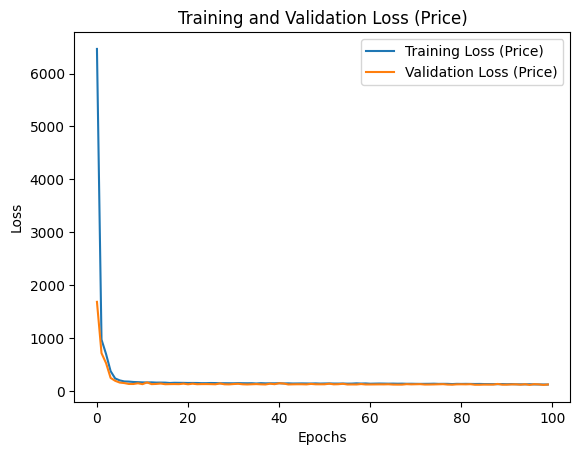

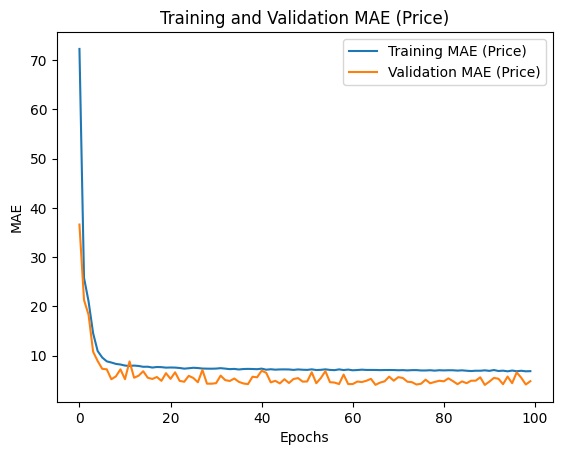

In [301]:

# 选择用于股价预测的特征
features_price = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10','Content_Sentiment_Score', 'Comment_Sentiment_Score', 'Predicted_Trend']]
labels_price = df_price['Close']

# 填充缺失值
features_price.fillna(method='ffill', inplace=True)

# 数据标准化
scaler_price = MinMaxScaler()
features_scaled_price = scaler_price.fit_transform(features_price)

# 创建用于股价预测的训练集和测试集
X_price, y_price = create_dataset(features_scaled_price, labels_price.values, time_step)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.3, random_state=42)

# 构建股价预测模型
model_price = Sequential()
model_price.add(LSTM(150, input_shape=(time_step, X_train_price.shape[2])))
model_price.add(Dropout(0.2))
model_price.add(Dense(1, activation='linear'))

# 编译模型
optimizer_price = tf.keras.optimizers.Adam(learning_rate=0.001)
model_price.compile(optimizer=optimizer_price, loss='mse', metrics=['mae'])

# 训练模型
history_price = model_price.fit(X_train_price, y_train_price, epochs=100, batch_size=8, validation_data=(X_test_price, y_test_price))

# 评估模型
loss_price, mae_price = model_price.evaluate(X_test_price, y_test_price)
print(f'Test Loss (Price): {loss_price}, Test MAE (Price): {mae_price}')

# 可视化训练和验证损失
plt.plot(history_price.history['loss'], label='Training Loss (Price)')
plt.plot(history_price.history['val_loss'], label='Validation Loss (Price)')
plt.title('Training and Validation Loss (Price)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证MAE
plt.plot(history_price.history['mae'], label='Training MAE (Price)')
plt.plot(history_price.history['val_mae'], label='Validation MAE (Price)')
plt.title('Training and Validation MAE (Price)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

- 对股价预测模型进行调优

C:\Users\blue\AppData\Local\Temp\ipykernel_3096\2360047087.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_price.fillna(method='ffill', inplace=True)


Test Loss: 132.49481201171875, Test MAE: 6.516223430633545 (LR=0.001, Batch=8, Units=50, Epochs=50)


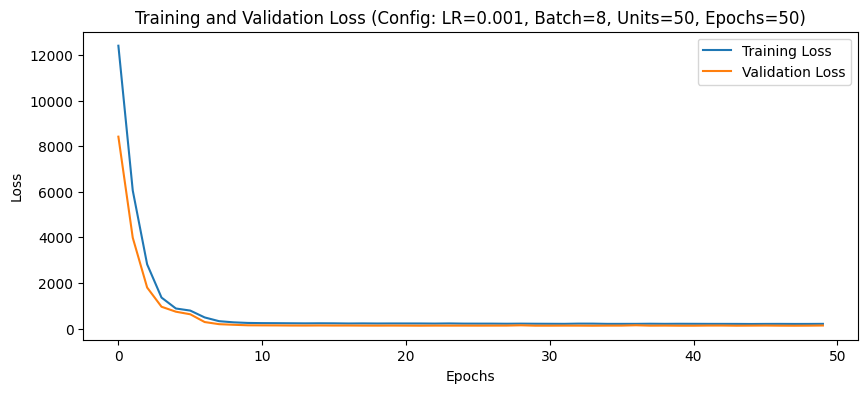

Test Loss: 116.60884857177734, Test MAE: 4.7516937255859375 (LR=0.001, Batch=8, Units=50, Epochs=100)


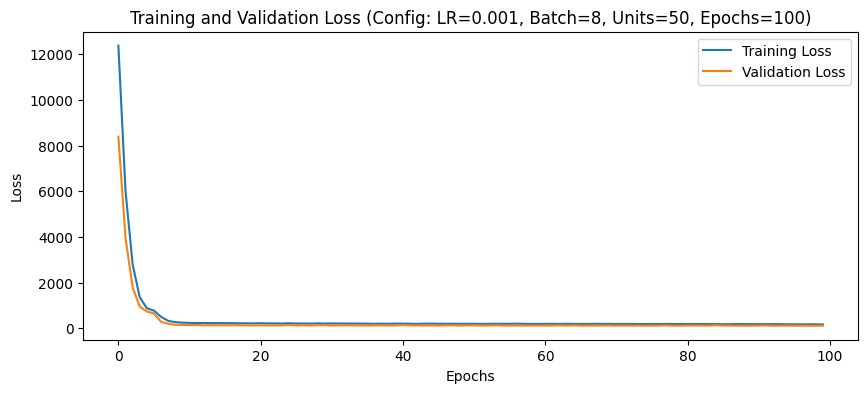

Test Loss: 125.50045776367188, Test MAE: 4.538724422454834 (LR=0.001, Batch=8, Units=150, Epochs=50)


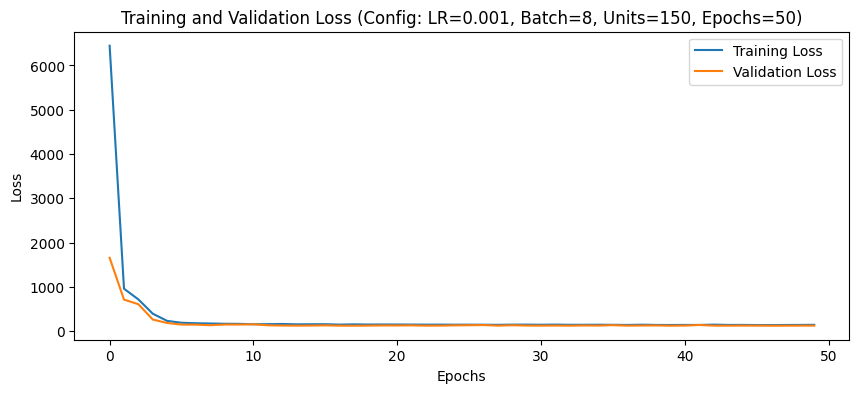

Test Loss: 122.03044128417969, Test MAE: 4.93461799621582 (LR=0.001, Batch=8, Units=150, Epochs=100)


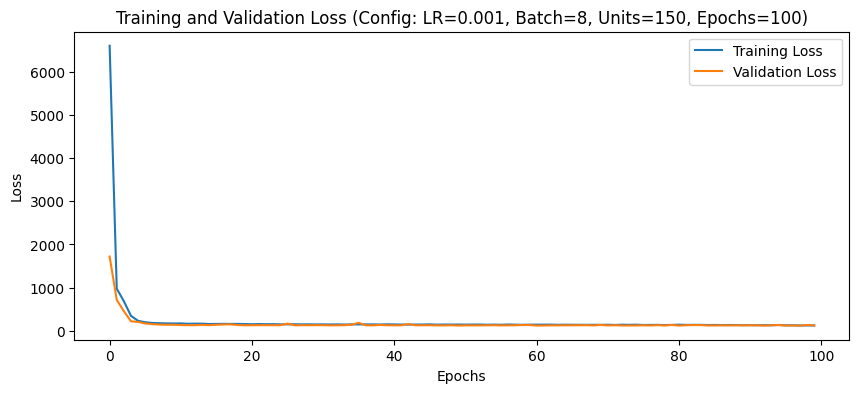

Test Loss: 123.38569641113281, Test MAE: 4.96614408493042 (LR=0.001, Batch=8, Units=200, Epochs=50)


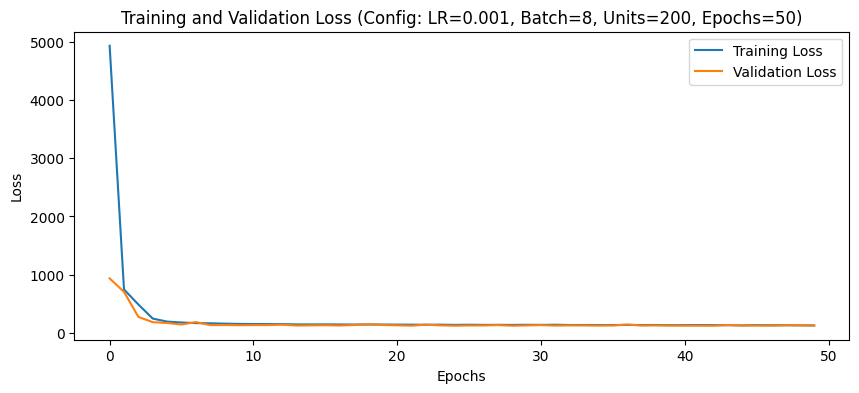

Test Loss: 102.677001953125, Test MAE: 4.019896030426025 (LR=0.001, Batch=8, Units=200, Epochs=100)


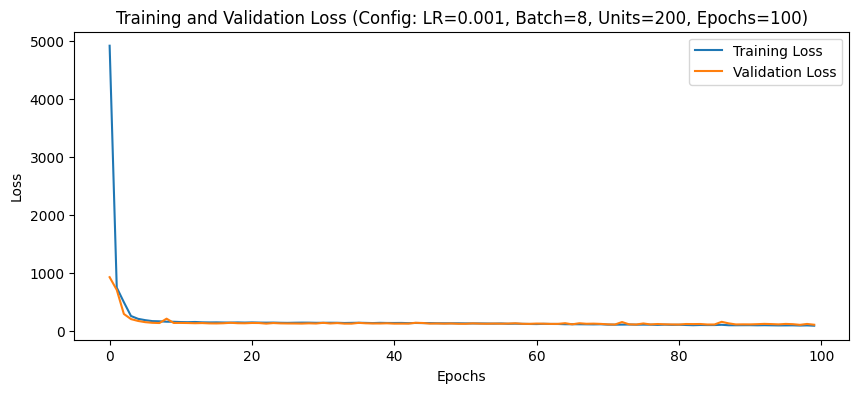

Test Loss: 128.724609375, Test MAE: 5.519533157348633 (LR=0.001, Batch=32, Units=50, Epochs=50)


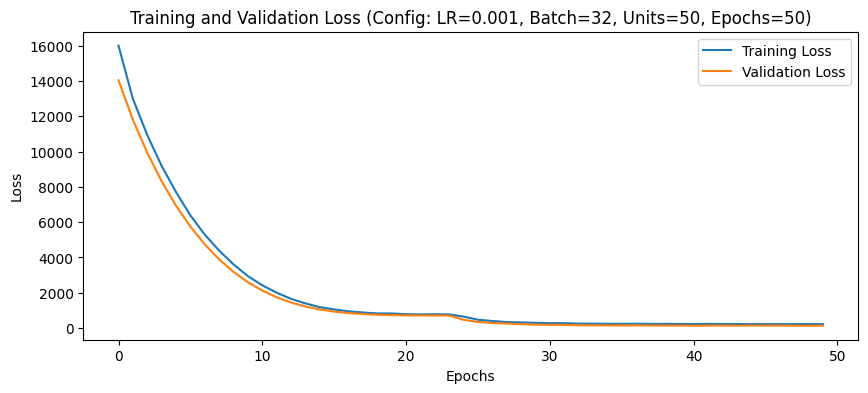

Test Loss: 122.45201110839844, Test MAE: 4.56440544128418 (LR=0.001, Batch=32, Units=50, Epochs=100)


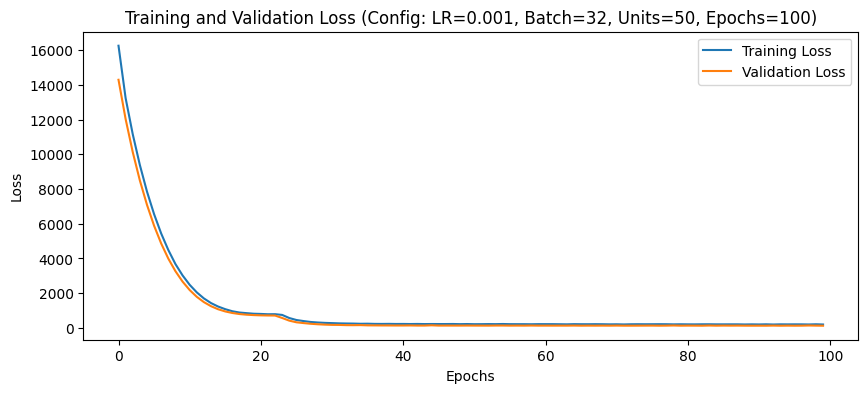

Test Loss: 129.8719024658203, Test MAE: 5.1276373863220215 (LR=0.001, Batch=32, Units=150, Epochs=50)


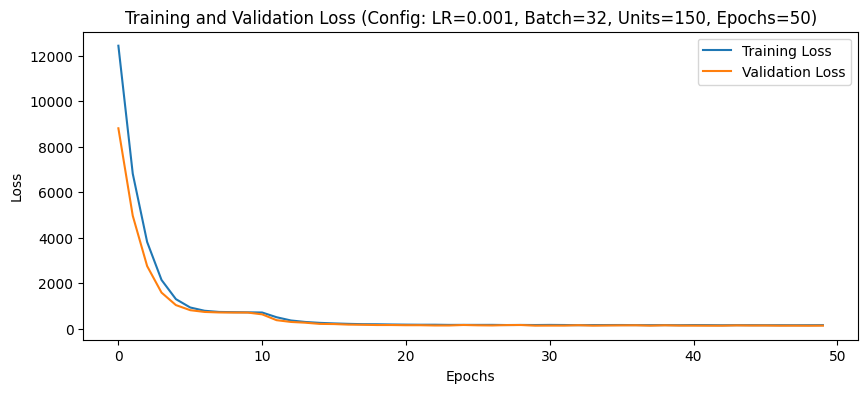

Test Loss: 124.69210815429688, Test MAE: 5.805742263793945 (LR=0.001, Batch=32, Units=150, Epochs=100)


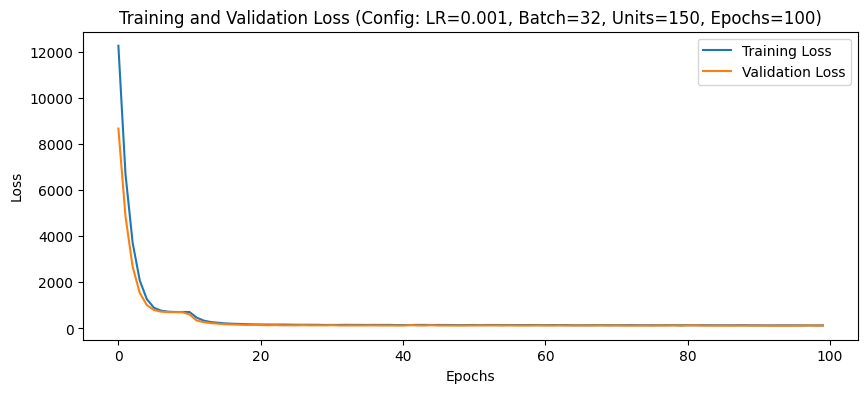

Test Loss: 127.3465805053711, Test MAE: 4.74406099319458 (LR=0.001, Batch=32, Units=200, Epochs=50)


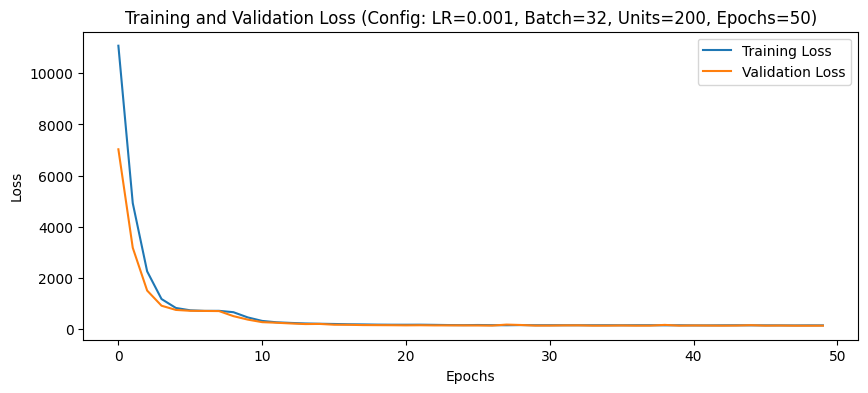

Test Loss: 115.06119537353516, Test MAE: 4.221136093139648 (LR=0.001, Batch=32, Units=200, Epochs=100)


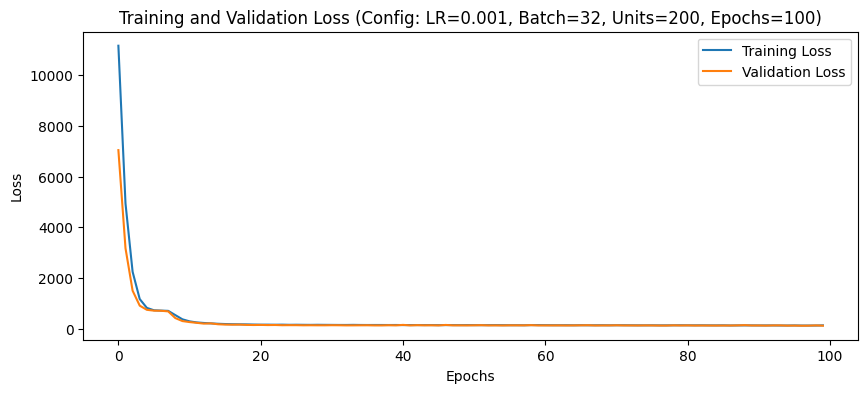

Test Loss: 435.1504211425781, Test MAE: 15.975499153137207 (LR=0.001, Batch=64, Units=50, Epochs=50)


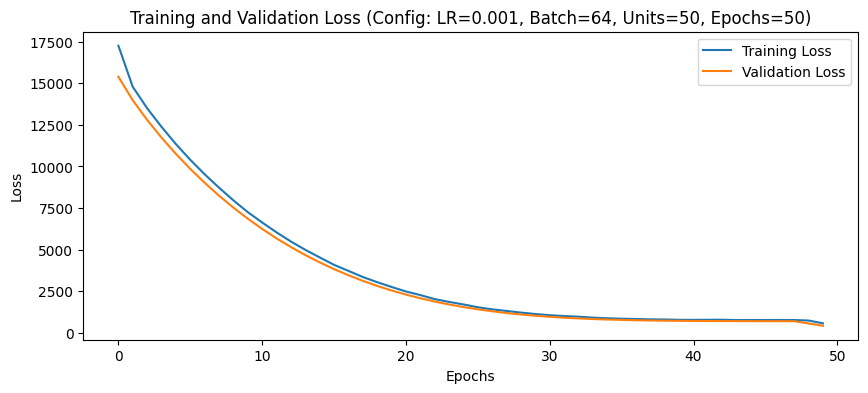

Test Loss: 128.3551025390625, Test MAE: 5.0760016441345215 (LR=0.001, Batch=64, Units=50, Epochs=100)


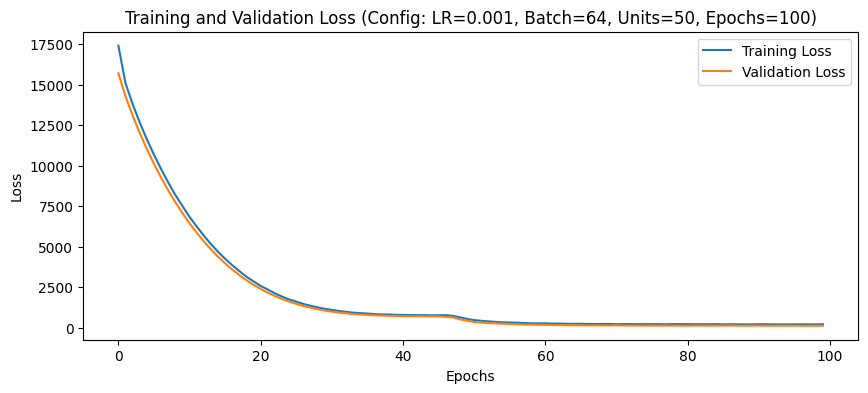

Test Loss: 133.5172882080078, Test MAE: 5.765336513519287 (LR=0.001, Batch=64, Units=150, Epochs=50)


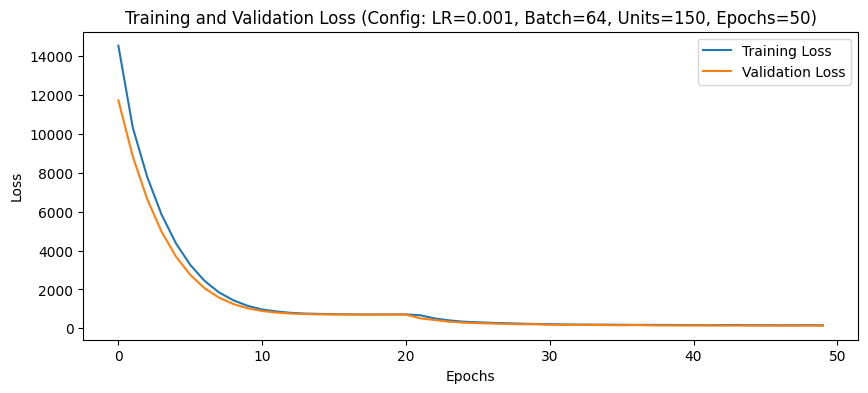

Test Loss: 124.89635467529297, Test MAE: 4.659448623657227 (LR=0.001, Batch=64, Units=150, Epochs=100)


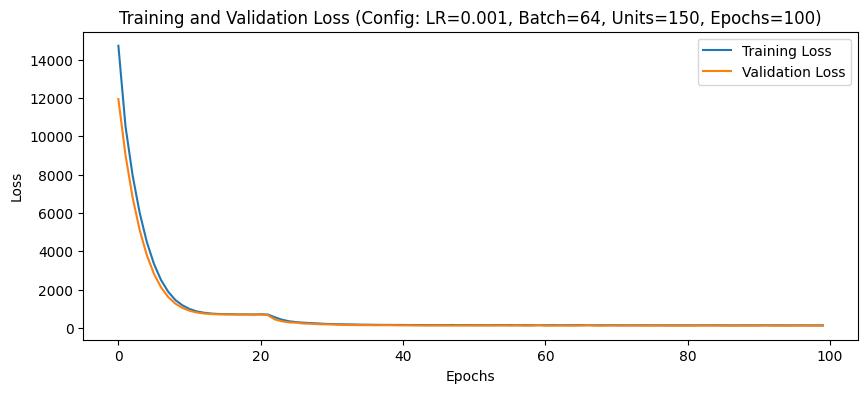

Test Loss: 130.11050415039062, Test MAE: 5.173998832702637 (LR=0.001, Batch=64, Units=200, Epochs=50)


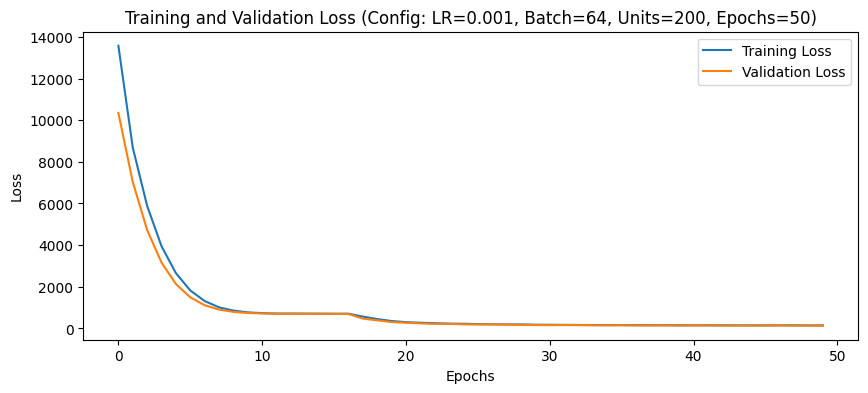

Test Loss: 124.0062026977539, Test MAE: 4.997994899749756 (LR=0.001, Batch=64, Units=200, Epochs=100)


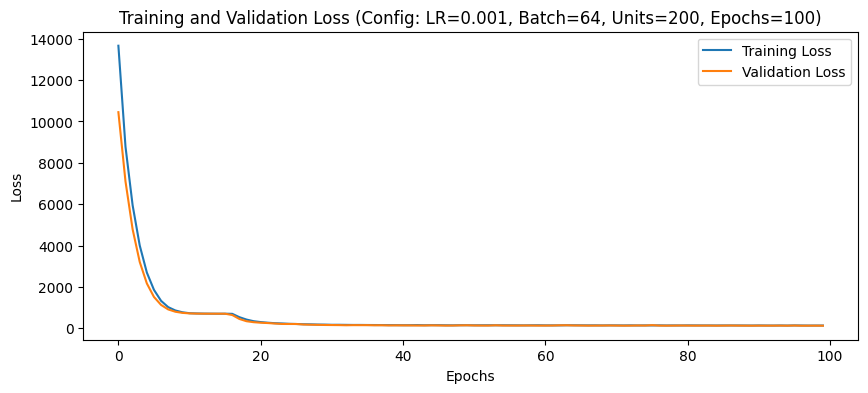

Test Loss: 133.1389617919922, Test MAE: 6.529007434844971 (LR=0.01, Batch=8, Units=50, Epochs=50)


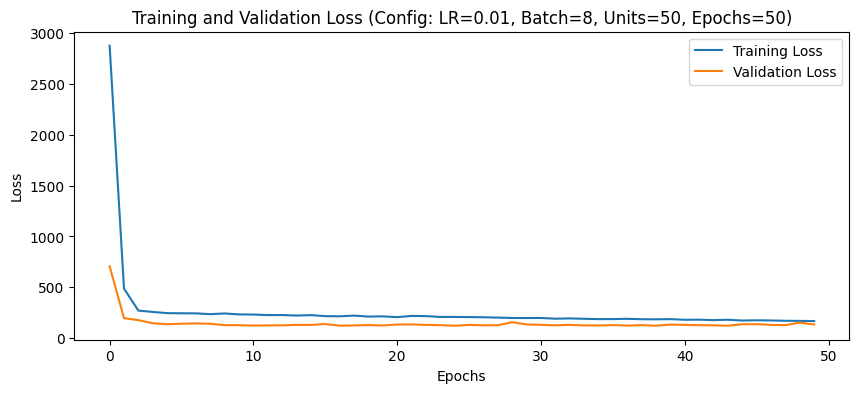

Test Loss: 118.63339233398438, Test MAE: 4.831510543823242 (LR=0.01, Batch=8, Units=50, Epochs=100)


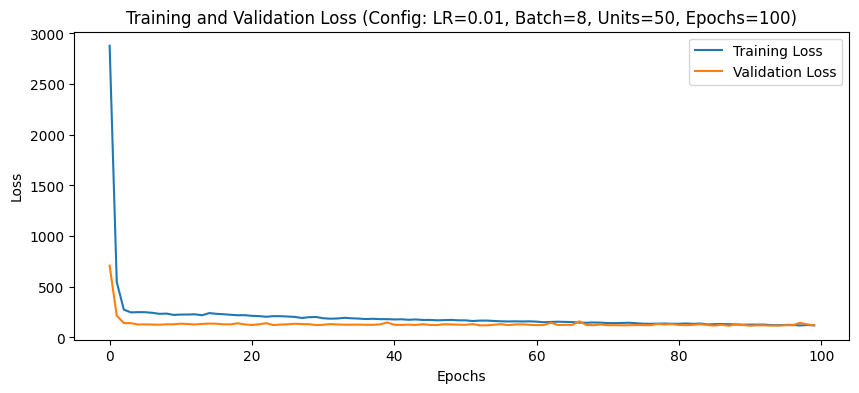

Test Loss: 129.4477081298828, Test MAE: 5.412987232208252 (LR=0.01, Batch=8, Units=150, Epochs=50)


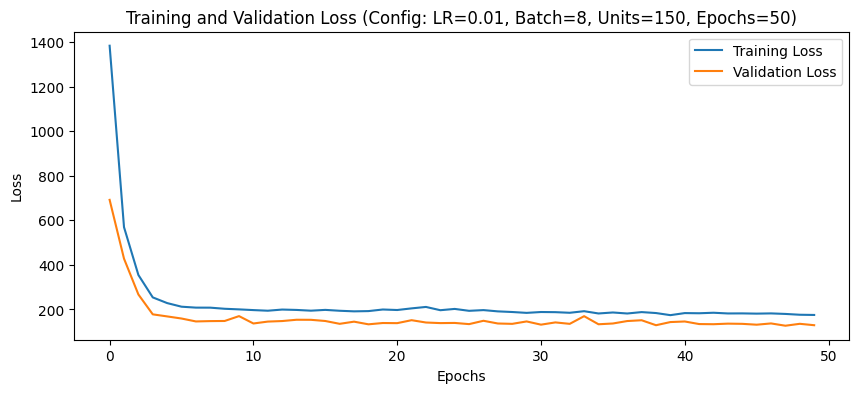

Test Loss: 141.2208251953125, Test MAE: 6.7045207023620605 (LR=0.01, Batch=8, Units=150, Epochs=100)


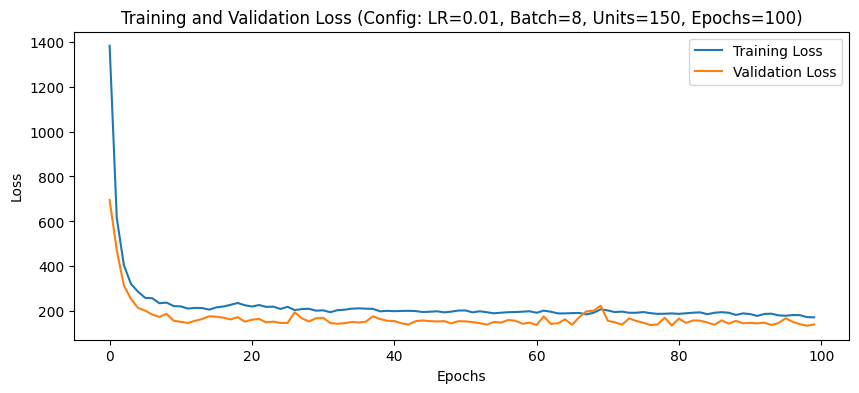

Test Loss: 189.08436584472656, Test MAE: 8.744983673095703 (LR=0.01, Batch=8, Units=200, Epochs=50)


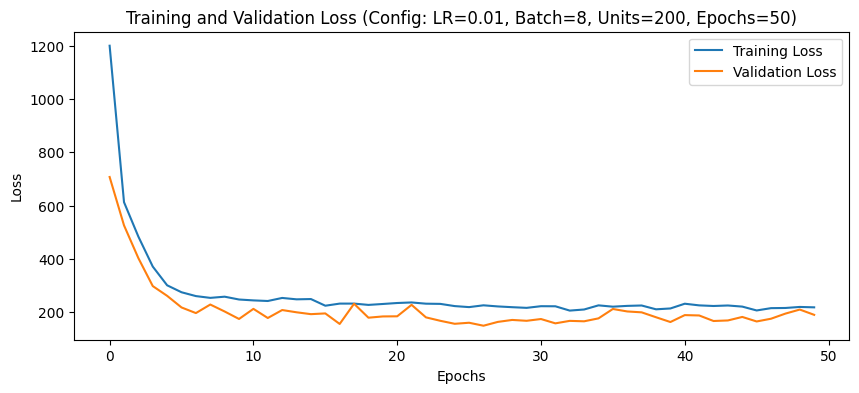

Test Loss: 111.52410125732422, Test MAE: 4.639396667480469 (LR=0.01, Batch=8, Units=200, Epochs=100)


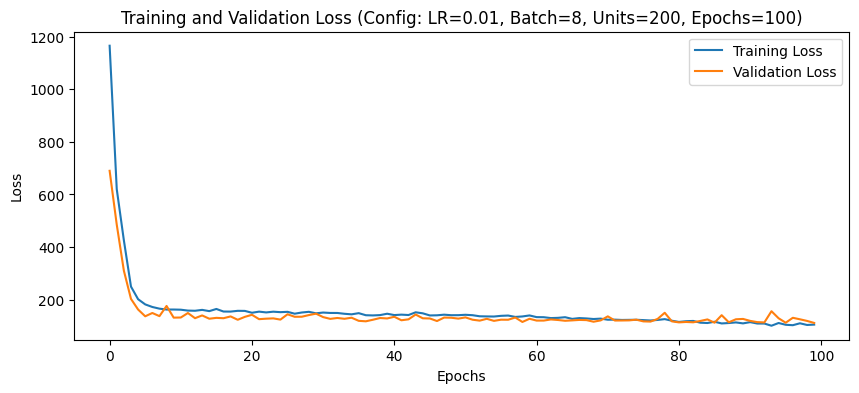

Test Loss: 119.98306274414062, Test MAE: 4.6558427810668945 (LR=0.01, Batch=32, Units=50, Epochs=50)


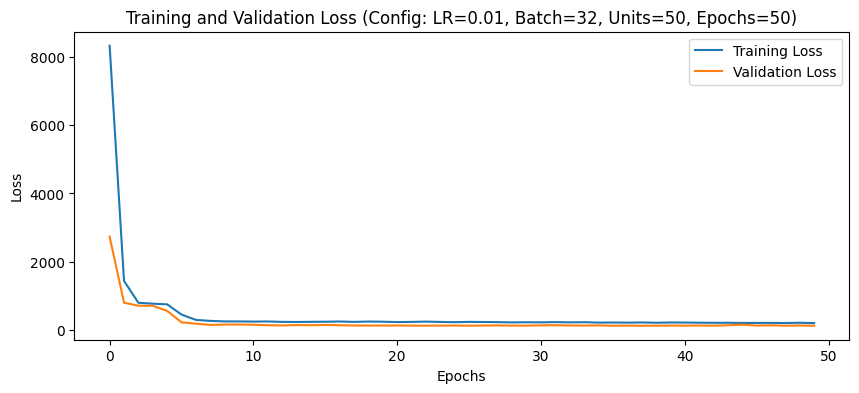

Test Loss: 124.15252685546875, Test MAE: 4.961661338806152 (LR=0.01, Batch=32, Units=50, Epochs=100)


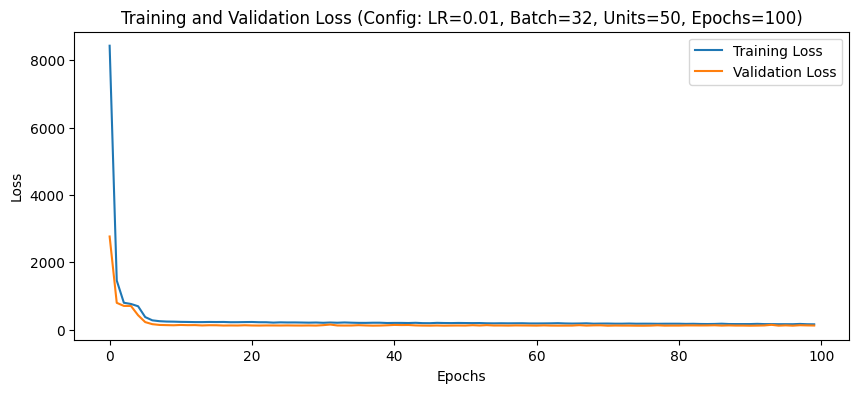

Test Loss: 133.76564025878906, Test MAE: 5.428311347961426 (LR=0.01, Batch=32, Units=150, Epochs=50)


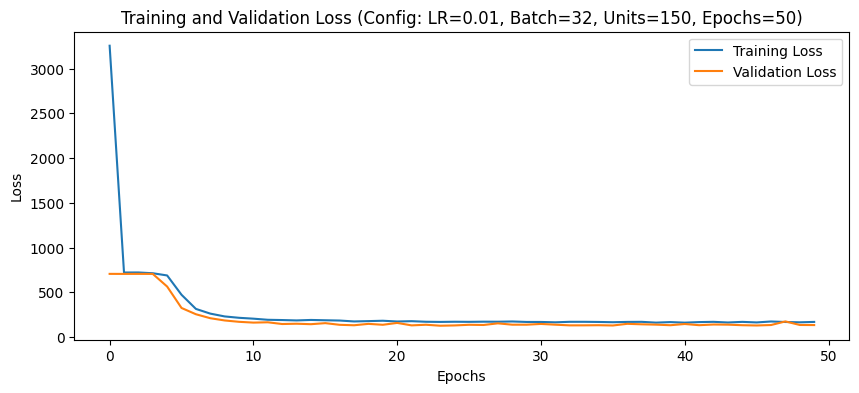

Test Loss: 131.0102081298828, Test MAE: 5.696693420410156 (LR=0.01, Batch=32, Units=150, Epochs=100)


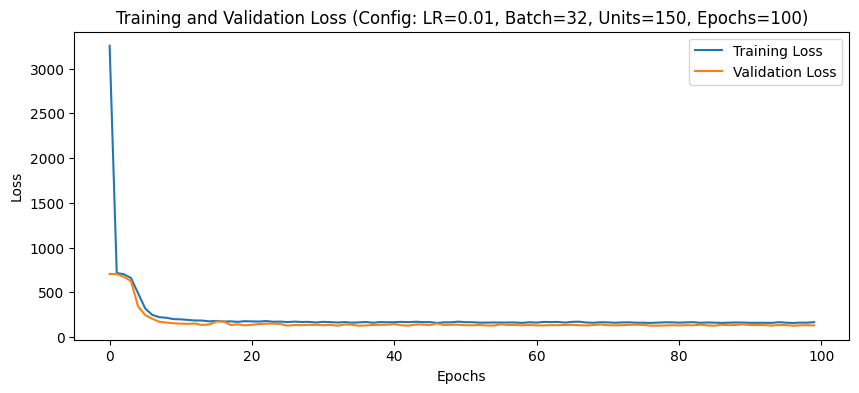

Test Loss: 131.49874877929688, Test MAE: 6.446422576904297 (LR=0.01, Batch=32, Units=200, Epochs=50)


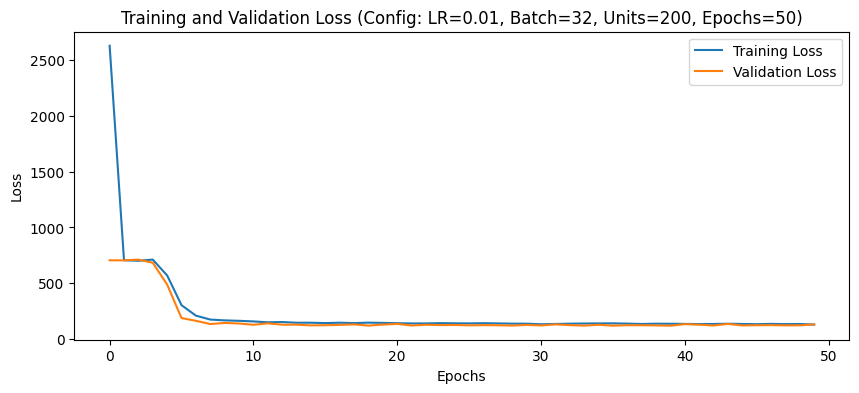

Test Loss: 132.890869140625, Test MAE: 5.635178565979004 (LR=0.01, Batch=32, Units=200, Epochs=100)


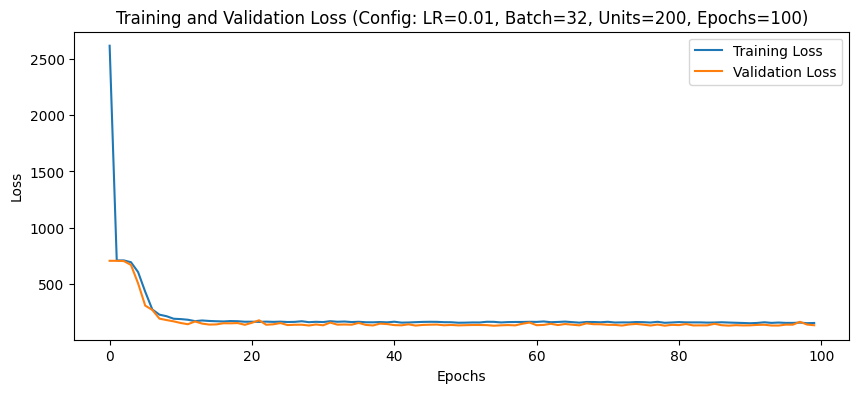

Test Loss: 126.5893783569336, Test MAE: 4.751723289489746 (LR=0.01, Batch=64, Units=50, Epochs=50)


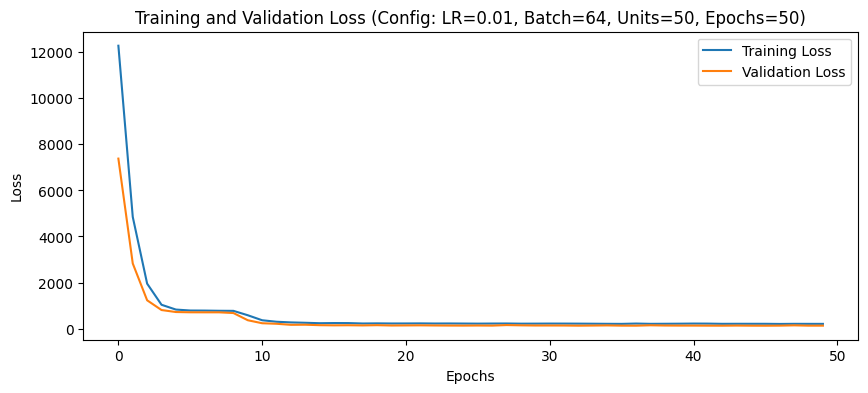

Test Loss: 120.85186767578125, Test MAE: 5.112152099609375 (LR=0.01, Batch=64, Units=50, Epochs=100)


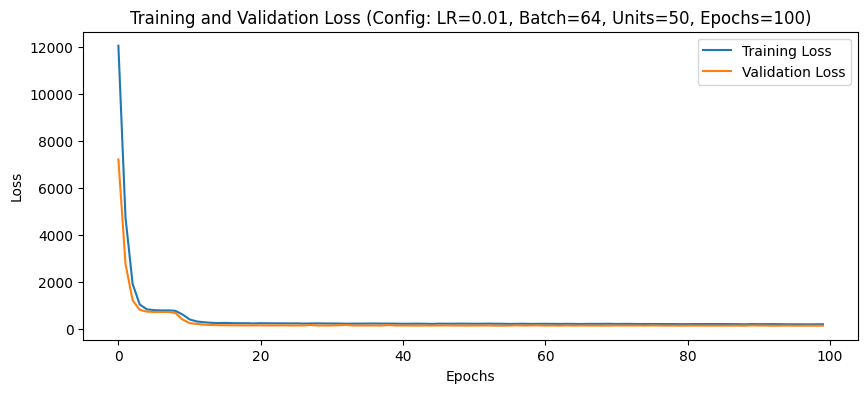

Test Loss: 111.34880065917969, Test MAE: 4.850863456726074 (LR=0.01, Batch=64, Units=150, Epochs=50)


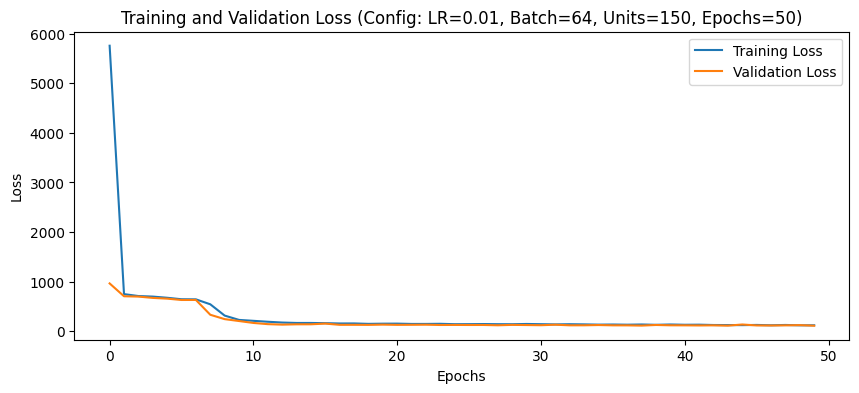

Test Loss: 117.33946990966797, Test MAE: 5.052064418792725 (LR=0.01, Batch=64, Units=150, Epochs=100)


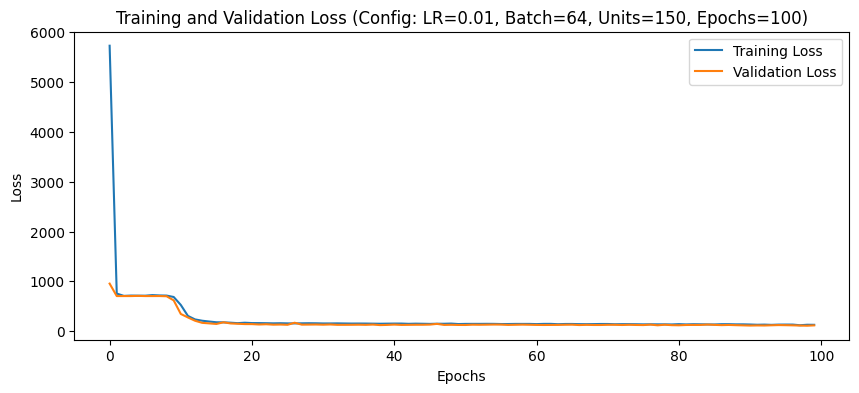

Test Loss: 129.93077087402344, Test MAE: 5.0614728927612305 (LR=0.01, Batch=64, Units=200, Epochs=50)


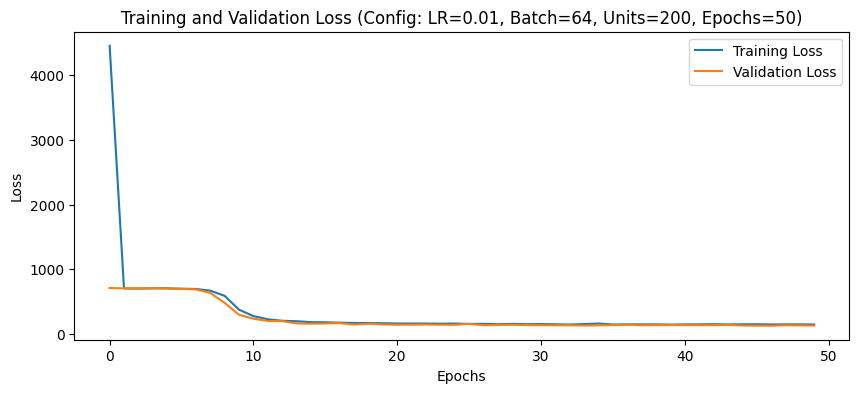

Test Loss: 133.2711639404297, Test MAE: 4.881353855133057 (LR=0.01, Batch=64, Units=200, Epochs=100)


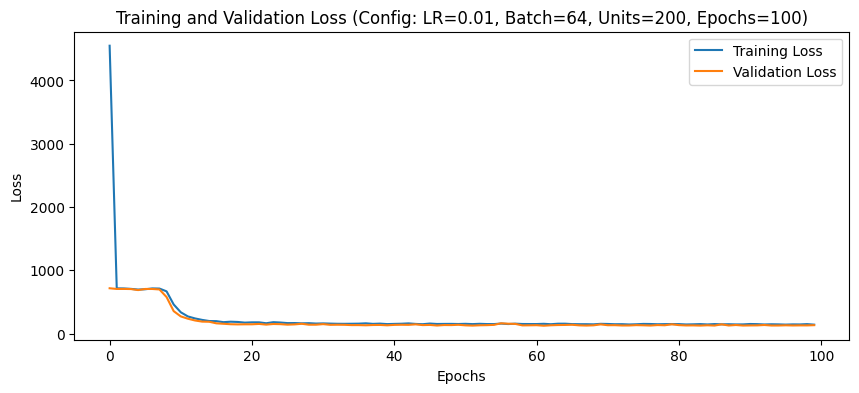

Test Loss: 304.2811584472656, Test MAE: 11.768736839294434 (LR=0.1, Batch=8, Units=50, Epochs=50)


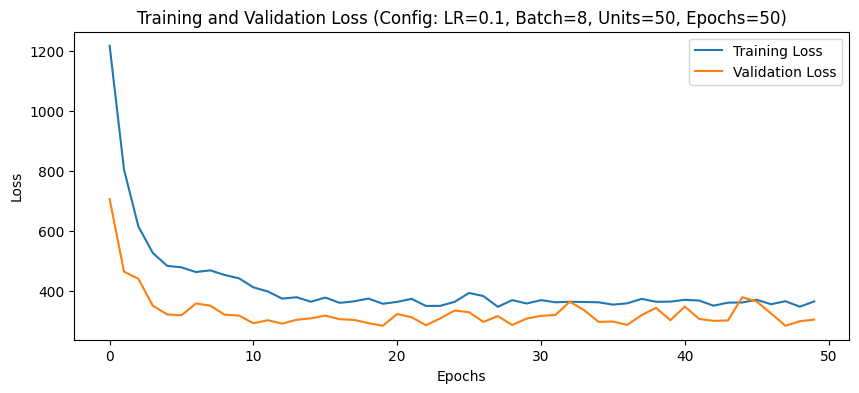

Test Loss: 159.19993591308594, Test MAE: 7.963072776794434 (LR=0.1, Batch=8, Units=50, Epochs=100)


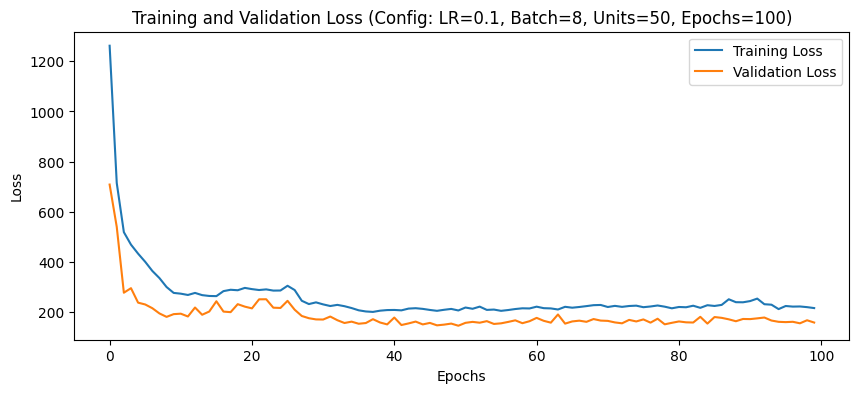

Test Loss: 504.98809814453125, Test MAE: 15.548465728759766 (LR=0.1, Batch=8, Units=150, Epochs=50)


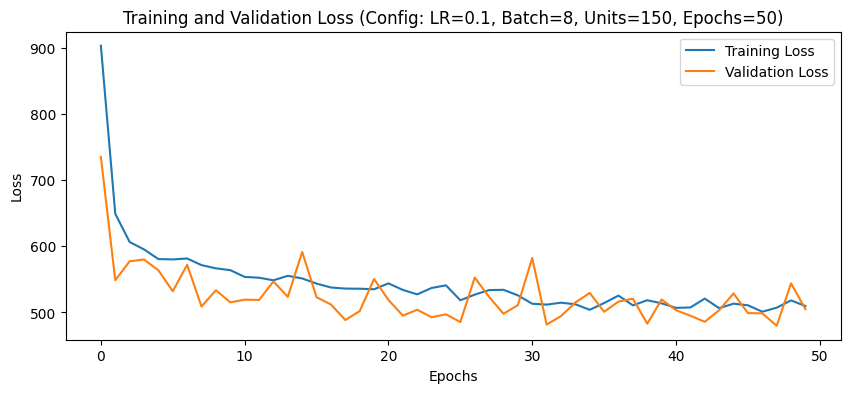

Test Loss: 492.5590515136719, Test MAE: 15.080607414245605 (LR=0.1, Batch=8, Units=150, Epochs=100)


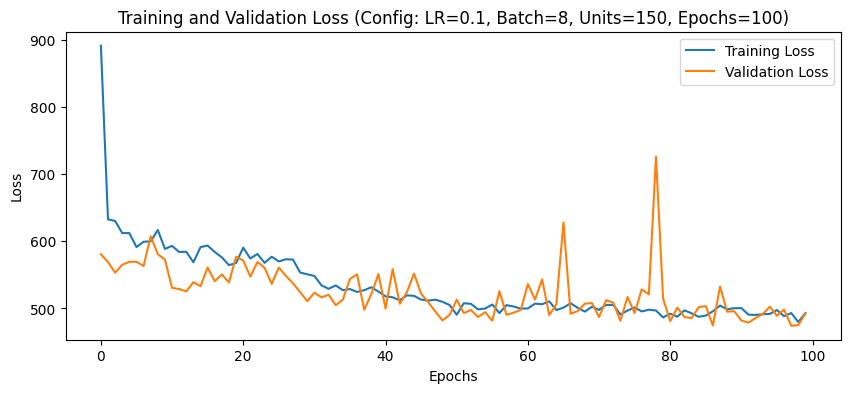

Test Loss: 552.2871704101562, Test MAE: 17.032167434692383 (LR=0.1, Batch=8, Units=200, Epochs=50)


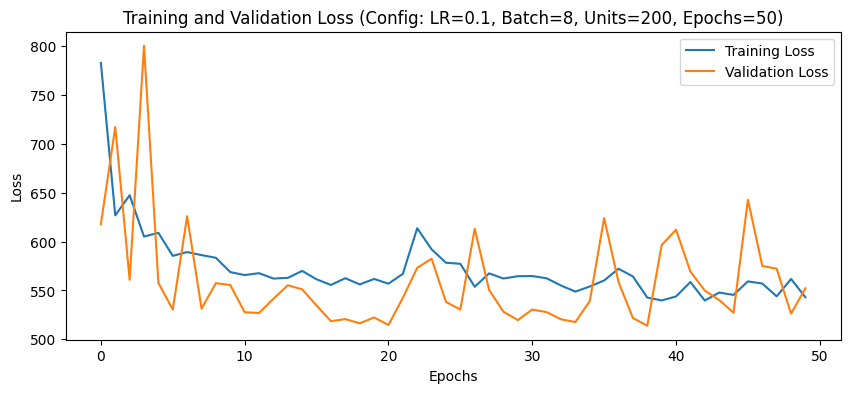

Test Loss: 422.1861267089844, Test MAE: 14.791768074035645 (LR=0.1, Batch=8, Units=200, Epochs=100)


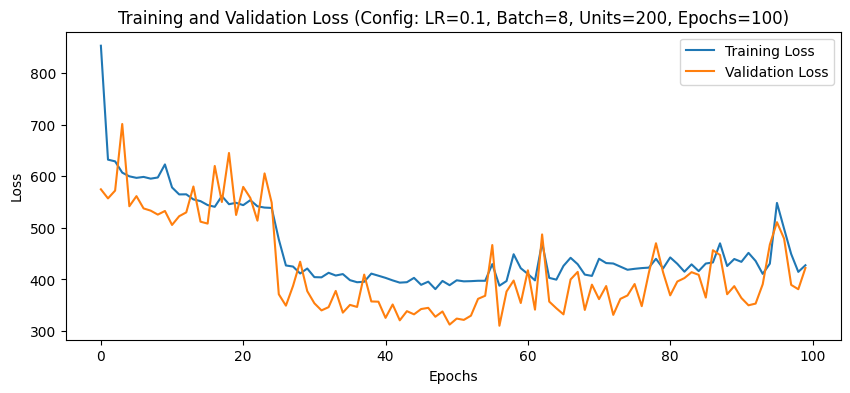

Test Loss: 184.30740356445312, Test MAE: 7.937580585479736 (LR=0.1, Batch=32, Units=50, Epochs=50)


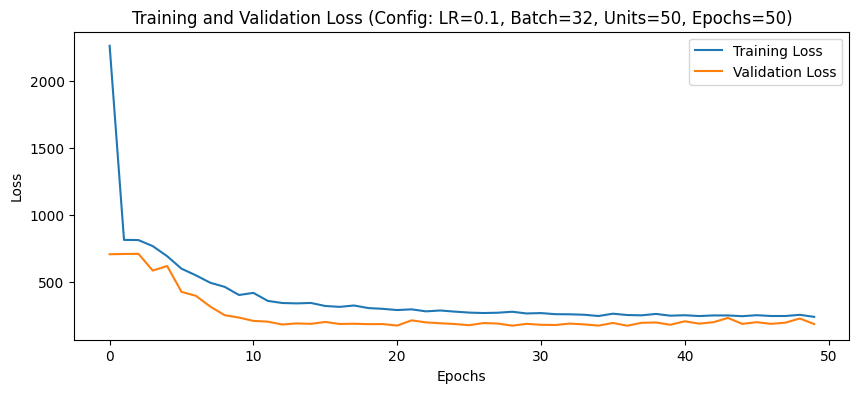

Test Loss: 178.35391235351562, Test MAE: 7.261138439178467 (LR=0.1, Batch=32, Units=50, Epochs=100)


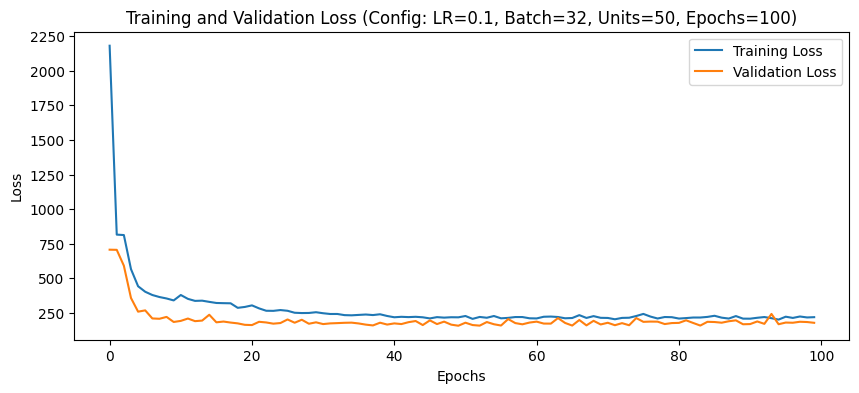

Test Loss: 491.3792724609375, Test MAE: 15.445125579833984 (LR=0.1, Batch=32, Units=150, Epochs=50)


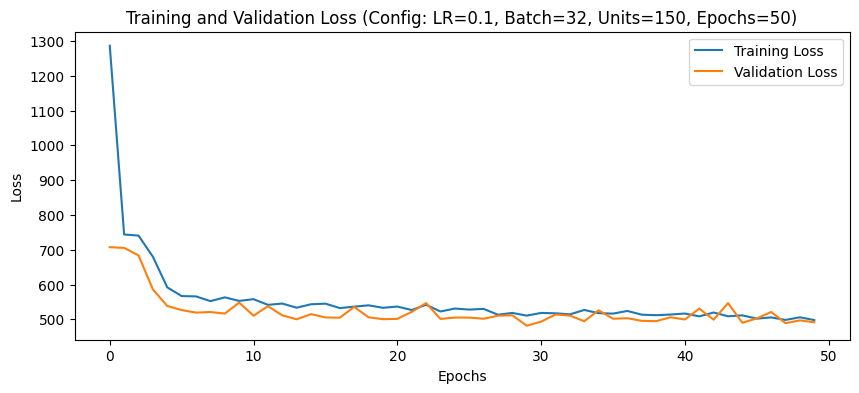

Test Loss: 182.60467529296875, Test MAE: 8.303874015808105 (LR=0.1, Batch=32, Units=150, Epochs=100)


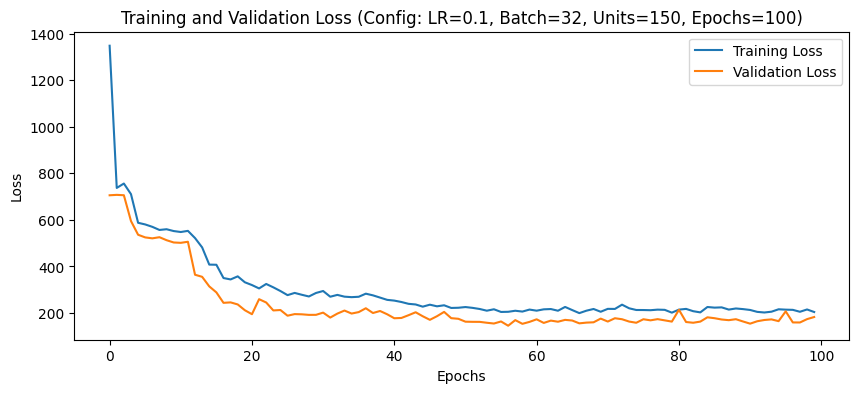

Test Loss: 529.0489501953125, Test MAE: 15.49667739868164 (LR=0.1, Batch=32, Units=200, Epochs=50)


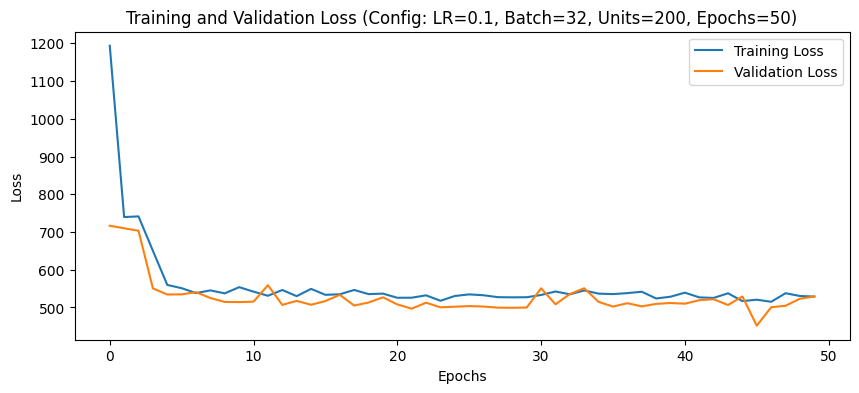

Test Loss: 217.5133514404297, Test MAE: 9.907486915588379 (LR=0.1, Batch=32, Units=200, Epochs=100)


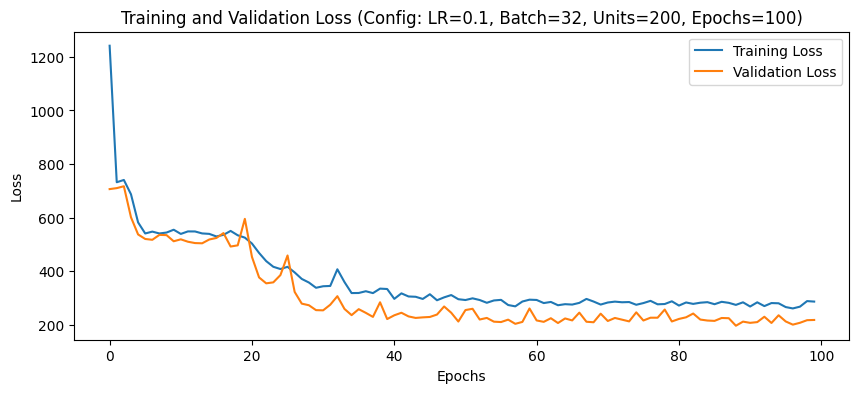

Test Loss: 214.4147491455078, Test MAE: 9.01196002960205 (LR=0.1, Batch=64, Units=50, Epochs=50)


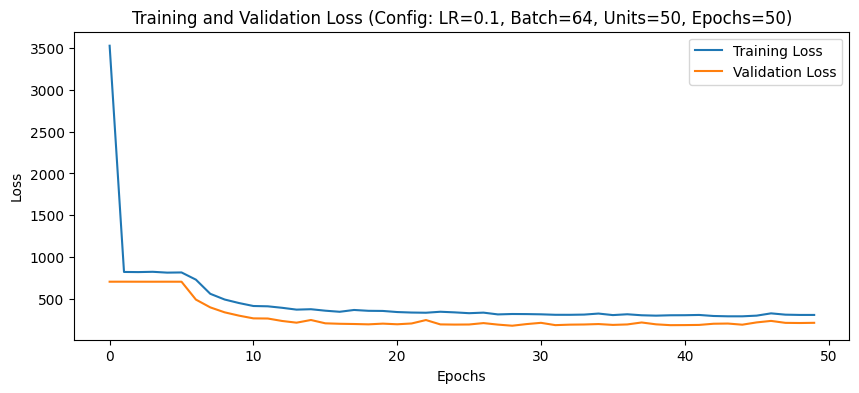

Test Loss: 160.42115783691406, Test MAE: 7.499426364898682 (LR=0.1, Batch=64, Units=50, Epochs=100)


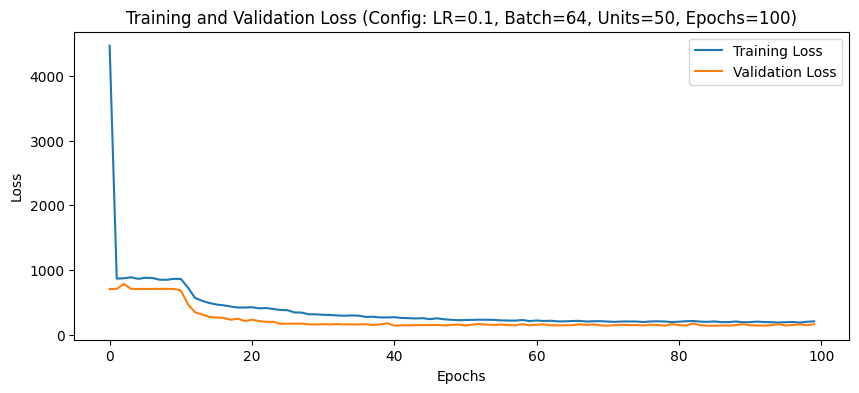

Test Loss: 146.9937744140625, Test MAE: 6.616796493530273 (LR=0.1, Batch=64, Units=150, Epochs=50)


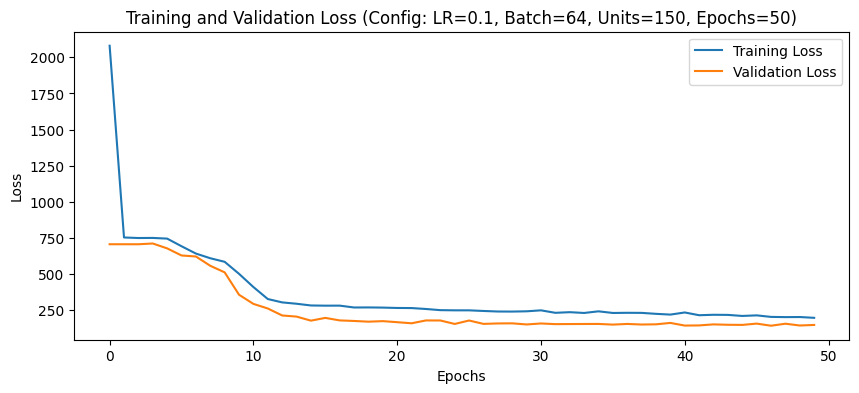

Test Loss: 179.08094787597656, Test MAE: 8.760171890258789 (LR=0.1, Batch=64, Units=150, Epochs=100)


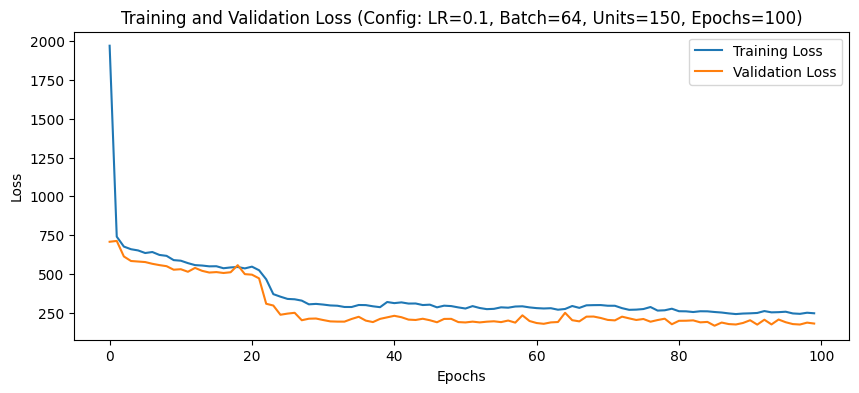

Test Loss: 476.1421203613281, Test MAE: 15.589536666870117 (LR=0.1, Batch=64, Units=200, Epochs=50)


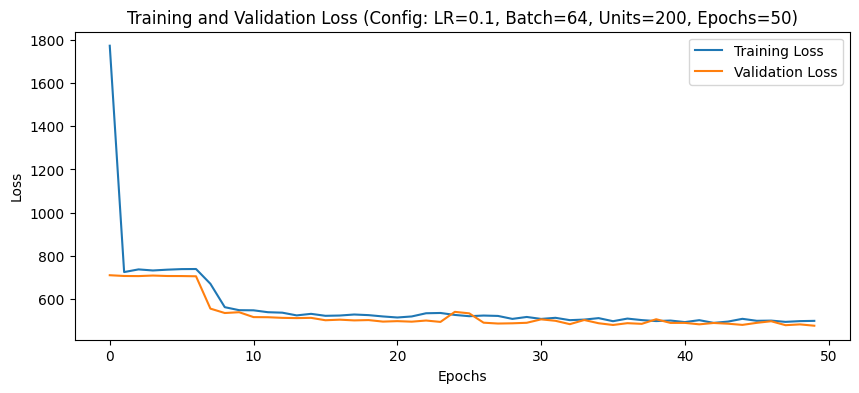

Test Loss: 219.9468536376953, Test MAE: 9.695778846740723 (LR=0.1, Batch=64, Units=200, Epochs=100)


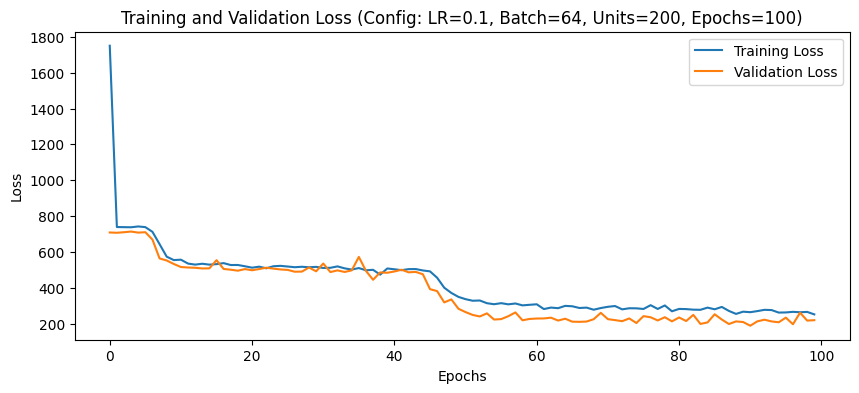


Best Configuration: LR=0.001, Batch=8, Units=200, Epochs=100
Best Test Loss: 102.677001953125, Best Test MAE: 4.019896030426025


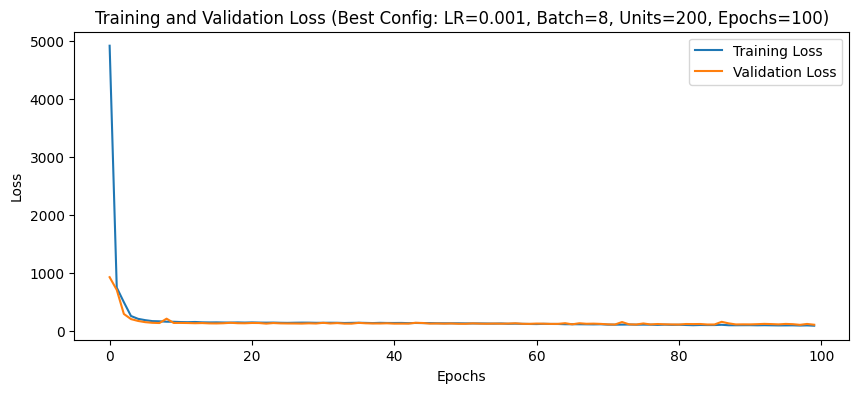

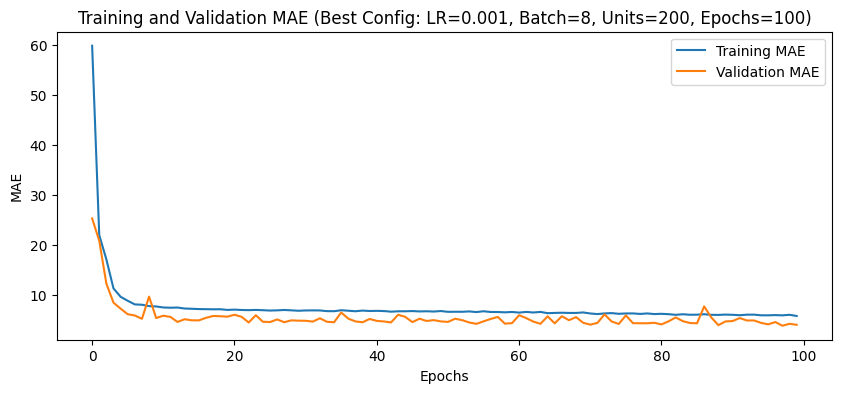

In [302]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 选择用于股价预测的特征
features_price = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score', 'Predicted_Trend']]
labels_price = df_price['Close']

# 填充缺失值
features_price.fillna(method='ffill', inplace=True)

# 数据标准化
scaler_price = MinMaxScaler()
features_scaled_price = scaler_price.fit_transform(features_price)

# 创建用于股价预测的训练集和测试集
time_step = 5
X_price, y_price = create_dataset(features_scaled_price, labels_price.values, time_step)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.3, random_state=42)

# 定义超参数的集合
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [8, 32, 64]
hidden_units = [50, 150, 200]
epochs = [50, 100]

# 用于保存结果的字典
results = {}

# 超参数调优循环
for lr in learning_rates:
    for batch_size in batch_sizes:
        for units in hidden_units:
            for epoch in epochs:
                # 构建模型
                model = Sequential()
                model.add(LSTM(units, input_shape=(time_step, X_train_price.shape[2])))
                model.add(Dropout(0.2))
                model.add(Dense(1, activation='linear'))

                # 编译模型
                optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

                # 训练模型
                history = model.fit(X_train_price, y_train_price, epochs=epoch, batch_size=batch_size, validation_data=(X_test_price, y_test_price), verbose=0)

                # 评估模型
                loss, mae = model.evaluate(X_test_price, y_test_price, verbose=0)
                print(f"Test Loss: {loss}, Test MAE: {mae} (LR={lr}, Batch={batch_size}, Units={units}, Epochs={epoch})")

                # 保存结果
                key = f"LR={lr}, Batch={batch_size}, Units={units}, Epochs={epoch}"
                results[key] = {
                    'loss': loss,
                    'mae': mae,
                    'history': history.history
                }

                # 可视化每次实验的训练和验证损失
                plt.figure(figsize=(10, 4))
                plt.plot(history.history['loss'], label='Training Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.title(f"Training and Validation Loss (Config: {key})")
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()

# 找出最佳配置
best_key = min(results, key=lambda k: results[k]['mae'])
best_result = results[best_key]

print(f"\nBest Configuration: {best_key}")
print(f"Best Test Loss: {best_result['loss']}, Best Test MAE: {best_result['mae']}")

# 可视化最佳模型的训练和验证损失
plt.figure(figsize=(10, 4))
plt.plot(best_result['history']['loss'], label='Training Loss')
plt.plot(best_result['history']['val_loss'], label='Validation Loss')
plt.title(f"Training and Validation Loss (Best Config: {best_key})")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化最佳模型的训练和验证MAE
plt.figure(figsize=(10, 4))
plt.plot(best_result['history']['mae'], label='Training MAE')
plt.plot(best_result['history']['val_mae'], label='Validation MAE')
plt.title(f"Training and Validation MAE (Best Config: {best_key})")
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


- 合并LLM和textblob的情感结果

In [305]:
df_textblob = pd.read_csv('TextBlob_Trustfilter.csv')
df_llmm = pd.read_csv('LLM.csv')
df_textblob_llm = pd.read_csv('Trustfilter.csv')

In [311]:
textblob_sentiment_columns = df_textblob[['Processed_Content', 'Processed_Comment', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]
llm_sentiment_columns = df_llm[['Processed_Content', 'Processed_Comment', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]

# 将情感分析结果列合并到 df_textblob_llm 中
df_textblob_llm['TextBlob_Content_Sentiment_Score'] = textblob_sentiment_columns['Content_Sentiment_Score']
df_textblob_llm['TextBlob_Comment_Sentiment_Score'] = textblob_sentiment_columns['Comment_Sentiment_Score']

df_textblob_llm['llm_Content_Sentiment_Score'] = llm_sentiment_columns['Content_Sentiment_Score']
df_textblob_llm['llm_Comment_Sentiment_Score'] = llm_sentiment_columns['Comment_Sentiment_Score']

# 保存结果到新的文件
df_textblob_llm.to_csv('Trustfilter_with_sentiments_combined.csv', index=False)

In [312]:
# 计算加权平均值（可以根据实际情况调整权重）
weight_llm = 0.5
weight_textblob = 0.5

df_textblob_llm['Combined_Content_Sentiment_Score'] = weight_llm * df_textblob_llm['llm_Content_Sentiment_Score'] + weight_textblob * df_textblob_llm['TextBlob_Content_Sentiment_Score']
df_textblob_llm['Combined_Comment_Sentiment_Score'] = weight_llm * df_textblob_llm['llm_Comment_Sentiment_Score'] + weight_textblob * df_textblob_llm['TextBlob_Comment_Sentiment_Score']

Epoch 1/100
776/776 [==============================] - 10s 10ms/step - loss: 0.0876 - accuracy: 0.9142 - val_loss: 0.0869 - val_accuracy: 0.9124
Epoch 2/100
776/776 [==============================] - 5s 7ms/step - loss: 0.0850 - accuracy: 0.9142 - val_loss: 0.0877 - val_accuracy: 0.9124
Epoch 3/100
776/776 [==============================] - 6s 8ms/step - loss: 0.0847 - accuracy: 0.9142 - val_loss: 0.0867 - val_accuracy: 0.9124
Epoch 4/100
776/776 [==============================] - 7s 9ms/step - loss: 0.0846 - accuracy: 0.9142 - val_loss: 0.0871 - val_accuracy: 0.9124
Epoch 5/100
776/776 [==============================] - 8s 10ms/step - loss: 0.0847 - accuracy: 0.9142 - val_loss: 0.0881 - val_accuracy: 0.9124
Epoch 6/100
776/776 [==============================] - 8s 10ms/step - loss: 0.0845 - accuracy: 0.9142 - val_loss: 0.0869 - val_accuracy: 0.9124
Epoch 7/100
776/776 [==============================] - 8s 10ms/step - loss: 0.0845 - accuracy: 0.9142 - val_loss: 0.0867 - val_accuracy: 0

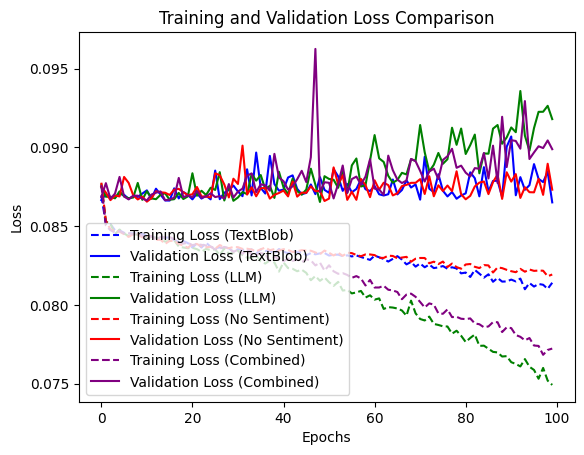

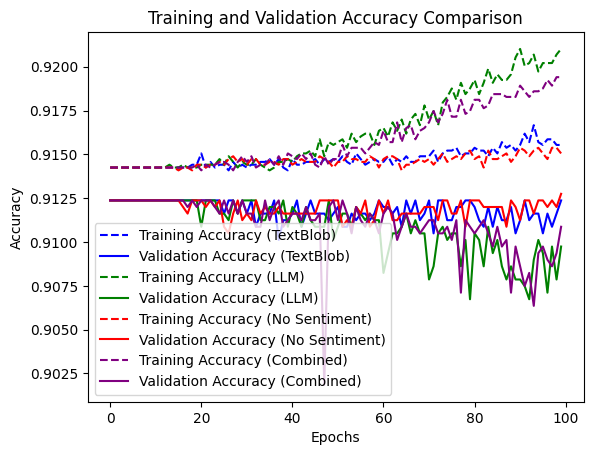

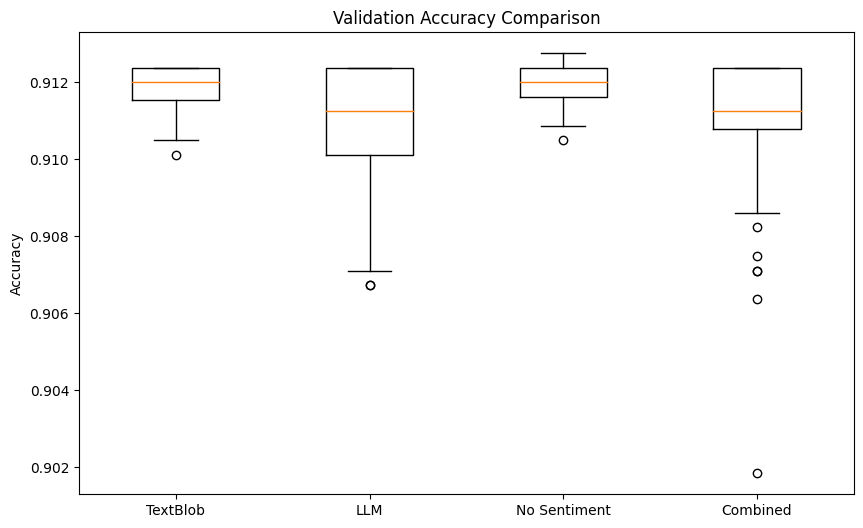

TextBlob p-value: 0.012889765762450671
LLM p-value: 2.9536312983924272e-18
No Sentiment p-value: 0.026657906036399136
Combined p-value: 3.638488100364725e-06


In [406]:
# 特征选择
selected_features_combined = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 
                              'Combined_Content_Sentiment_Score', 'Combined_Comment_Sentiment_Score']
features_combined = df_textblob_llm[selected_features_combined]
labels_combined = df_textblob_llm['Trend']

# 数据标准化
scaler_combined = MinMaxScaler()
features_scaled_combined = scaler_combined.fit_transform(features_combined)

# 创建训练集和测试集
time_step = 5  # 一周交易日为5天
X_combined, y_combined = create_dataset(features_scaled_combined, labels_combined.values, time_step)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# 构建单层LSTM模型，并添加Dropout层
model_combined = Sequential()
model_combined.add(LSTM(150, input_shape=(time_step, X_train_combined.shape[2])))
model_combined.add(Dropout(0.2))  # 添加Dropout层
model_combined.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_combined = tf.keras.optimizers.Adam(learning_rate=0.001)
model_combined.compile(optimizer=optimizer_combined, loss='mse', metrics=['accuracy'])

# 训练模型
history_combined = model_combined.fit(X_train_combined, y_train_combined, epochs=100, batch_size=8, validation_data=(X_test_combined, y_test_combined))

# 评估模型
loss_combined, accuracy_combined = model_combined.evaluate(X_test_combined, y_test_combined)
print(f'Test Loss (Combined): {loss_combined}, Test Accuracy (Combined): {accuracy_combined}')

from scipy.stats import ttest_ind

# 可视化训练和验证损失
plt.plot(history_textblob.history['loss'], linestyle='--', color='blue', label='Training Loss (TextBlob)')
plt.plot(history_textblob.history['val_loss'], linestyle='-', color='blue', label='Validation Loss (TextBlob)')
plt.plot(history_llm.history['loss'], linestyle='--', color='green', label='Training Loss (LLM)')
plt.plot(history_llm.history['val_loss'], linestyle='-', color='green', label='Validation Loss (LLM)')
plt.plot(history_no_sentiment.history['loss'], linestyle='--', color='red', label='Training Loss (No Sentiment)')
plt.plot(history_no_sentiment.history['val_loss'], linestyle='-', color='red', label='Validation Loss (No Sentiment)')
plt.plot(history_combined.history['loss'], linestyle='--', color='purple', label='Training Loss (Combined)')
plt.plot(history_combined.history['val_loss'], linestyle='-', color='purple', label='Validation Loss (Combined)')

plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证准确率
plt.plot(history_textblob.history['accuracy'], linestyle='--', color='blue', label='Training Accuracy (TextBlob)')
plt.plot(history_textblob.history['val_accuracy'], linestyle='-', color='blue', label='Validation Accuracy (TextBlob)')
plt.plot(history_llm.history['accuracy'], linestyle='--', color='green', label='Training Accuracy (LLM)')
plt.plot(history_llm.history['val_accuracy'], linestyle='-', color='green', label='Validation Accuracy (LLM)')
plt.plot(history_no_sentiment.history['accuracy'], linestyle='--', color='red', label='Training Accuracy (No Sentiment)')
plt.plot(history_no_sentiment.history['val_accuracy'], linestyle='-', color='red', label='Validation Accuracy (No Sentiment)')
plt.plot(history_combined.history['accuracy'], linestyle='--', color='purple', label='Training Accuracy (Combined)')
plt.plot(history_combined.history['val_accuracy'], linestyle='-', color='purple', label='Validation Accuracy (Combined)')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 生成性能分数箱型图
plt.figure(figsize=(10, 6))
plt.boxplot([history_textblob.history['val_accuracy'], history_llm.history['val_accuracy'], 
             history_no_sentiment.history['val_accuracy'], history_combined.history['val_accuracy']], 
            labels=['TextBlob', 'LLM', 'No Sentiment', 'Combined'])
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# 统计显著性检验
# 这里使用t检验或其他合适的检验方法来计算p值。
# 对于示例，假设我们对验证损失的前50个epoch和后50个epoch进行t检验，以检查验证损失的显著性增加。

# 计算前50个epoch和后50个epoch的平均验证损失
val_loss_textblob_start = np.mean(history_textblob.history['val_loss'][:50])
val_loss_textblob_end = np.mean(history_textblob.history['val_loss'][50:])

val_loss_llm_start = np.mean(history_llm.history['val_loss'][:50])
val_loss_llm_end = np.mean(history_llm.history['val_loss'][50:])

val_loss_no_sentiment_start = np.mean(history_no_sentiment.history['val_loss'][:50])
val_loss_no_sentiment_end = np.mean(history_no_sentiment.history['val_loss'][50:])

val_loss_combined_start = np.mean(history_combined.history['val_loss'][:50])
val_loss_combined_end = np.mean(history_combined.history['val_loss'][50:])

# 进行t检验
t_stat_textblob, p_val_textblob = ttest_ind(history_textblob.history['val_loss'][:50], history_textblob.history['val_loss'][50:])
t_stat_llm, p_val_llm = ttest_ind(history_llm.history['val_loss'][:50], history_llm.history['val_loss'][50:])
t_stat_no_sentiment, p_val_no_sentiment = ttest_ind(history_no_sentiment.history['val_loss'][:50], history_no_sentiment.history['val_loss'][50:])
t_stat_combined, p_val_combined = ttest_ind(history_combined.history['val_loss'][:50], history_combined.history['val_loss'][50:])

# 打印p值
print(f"TextBlob p-value: {p_val_textblob}")
print(f"LLM p-value: {p_val_llm}")
print(f"No Sentiment p-value: {p_val_no_sentiment}")
print(f"Combined p-value: {p_val_combined}")


In [357]:
# 使用遗传算法优化趋势预测这一部分
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from deap import base, creator, tools, algorithms

In [360]:
# 读取数据
df_price = pd.read_csv('TextBlob_Trustfilter.csv')
selected_features = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]
labels = df_price['Trend']

# 数据标准化
scaler = MinMaxScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

time_step = 5  # 一周交易日为5天

# 创建训练集和测试集
X_opt, y_opt = create_dataset(selected_features_scaled, labels.values, time_step)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.3, random_state=42)

# 创建一个问题的适应度类，最大化准确率
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 超参数范围定义
def generate_individual():
    return [
        np.random.uniform(0.001, 0.1),   # learning_rate
        np.random.randint(8, 128),       # batch_size
        np.random.randint(50, 200),      # hidden_units
        np.random.randint(50, 200)       # epochs
    ]

# 初始化个体
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, generate_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 定义评估函数
def evaluate(individual):
    learning_rate, batch_size, hidden_units, epochs = individual

    # 确保参数合法且为正整数
    batch_size = max(1, int(batch_size))
    hidden_units = max(1, int(hidden_units))
    epochs = max(1, int(epochs))

    # 构建LSTM模型
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=(time_step, X_train_opt.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

    try:
        # 训练模型
        history = model.fit(X_train_opt, y_train_opt, epochs=epochs, batch_size=batch_size, validation_data=(X_test_opt, y_test_opt), verbose=0)

        # 评估模型
        _, accuracy = model.evaluate(X_test_opt, y_test_opt, verbose=0)

        return accuracy,
    except Exception as e:
        print(f"An error occurred during training: {e}")
        return 0.0,  # 返回一个默认的低分，以便淘汰此个体

# 注册遗传算法的操作
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# 遗传算法参数
population_size = 20
generations = 10
population = toolbox.population(n=population_size)

# 遗传算法执行
result_population, _ = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=generations, verbose=True)

# 找到最佳个体
best_individual = tools.selBest(result_population, k=1)[0]
print(f"Best Individual: {best_individual}, Accuracy: {evaluate(best_individual)[0]}")

# 使用最佳参数进行最终训练
best_learning_rate, best_batch_size, best_hidden_units, best_epochs = best_individual

# 确保最佳参数为正整数
best_batch_size = max(1, int(best_batch_size))
best_hidden_units = max(1, int(best_hidden_units))
best_epochs = max(1, int(best_epochs))

model_optimized = Sequential()
model_optimized.add(LSTM(best_hidden_units, input_shape=(time_step, X_train_opt.shape[2])))
model_optimized.add(Dropout(0.2))
model_optimized.add(Dense(1, activation='tanh'))

optimizer_optimized = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
model_optimized.compile(optimizer=optimizer_optimized, loss='mse', metrics=['accuracy'])

history_optimized = model_optimized.fit(X_train_opt, y_train_opt, epochs=best_epochs, batch_size=best_batch_size, validation_data=(X_test_opt, y_test_opt))

# 使用优化后的模型进行趋势预测
predicted_trend = model_optimized.predict(X_opt)
predicted_trend_df = pd.DataFrame(predicted_trend, columns=['Predicted_Trend'])
df_price = pd.concat([df_price, predicted_trend_df], axis=1)

# 最后一个完整窗口的数据 (5行)
last_window_data = selected_features_scaled[-time_step:]  # 选取最后一个完整窗口的特征数据

# 创建一个空的数组用于保存预测的趋势
predicted_trend_last_5 = []

# 使用模型逐步预测每一行的趋势
for i in range(time_step):
    prediction = model_optimized.predict(last_window_data.reshape(1, time_step, -1))
    predicted_trend_last_5.append(prediction[0][0])
    last_window_data = np.roll(last_window_data, -1, axis=0)  # 滚动窗口
    last_window_data[-1, -1] = prediction  # 使用预测的趋势值替换窗口中的最后一行

predicted_trend_last_5_df = pd.DataFrame(predicted_trend_last_5, columns=['Predicted_Trend'])
df_price['Predicted_Trend'].iloc[-time_step:] = predicted_trend_last_5_df.values.flatten()

# 现在你可以使用最佳超参数来进行后续的股价预测


d:\anaconda3\envs\python38\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\anaconda3\envs\python38\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	20    
1  	10    
2  	10    
3  	15    
4  	10    
5  	10    
6  	8     
7  	14    
8  	12    
9  	13    
10 	10    
Best Individual: [0.22023605562789816, 27.65795290653481, 122.82729392092904, 82.6463630515077], Accuracy: 0.0455058291554451
Epoch 1/82
230/230 [==============================] - 5s 10ms/step - loss: 1.0808 - accuracy: 0.0474 - val_loss: 1.0809 - val_accuracy: 0.0455
Epoch 2/82
230/230 [==============================] - 2s 8ms/step - loss: 1.0851 - accuracy: 0.0430 - val_loss: 1.0809 - val_accuracy: 0.0455
Epoch 3/82
230/230 [==============================] - 2s 8ms/step - loss: 1.0851 - accuracy: 0.0430 - val_loss: 1.0809 - val_accuracy: 0.0455
Epoch 4/82
230/230 [==============================] - 2s 9ms/step - loss: 1.0851 - accuracy: 0.0430 - val_loss: 1.0809 - val_accuracy: 0.0455
Epoch 5/82
230/230 [==============================] - 2s 9ms/step - loss: 1.0851 - accuracy: 0.0430 - val_loss: 1.0809 - val_accuracy: 0.0455
Epoch 6/82
230/230 [===========

C:\Users\blue\AppData\Local\Temp\ipykernel_3096\3765117296.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Predicted_Trend'].iloc[-time_step:] = predicted_trend_last_5_df.values.flatten()


In [362]:
df_price.to_csv('TextBlob_Trustfilter_predicted_price.csv',index = False,quoting=csv.QUOTE_NONNUMERIC)

C:\Users\blue\AppData\Local\Temp\ipykernel_3096\1812269454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_price.fillna(method='ffill', inplace=True)


Epoch 1/100
776/776 [==============================] - 6s 6ms/step - loss: 5071.3438 - mae: 61.0296 - val_loss: 967.4642 - val_mae: 26.1304
Epoch 2/100
776/776 [==============================] - 4s 5ms/step - loss: 756.8256 - mae: 22.1807 - val_loss: 702.5073 - val_mae: 20.8794
Epoch 3/100
776/776 [==============================] - 4s 5ms/step - loss: 453.8741 - mae: 16.2476 - val_loss: 303.6393 - val_mae: 13.3644
Epoch 4/100
776/776 [==============================] - 4s 5ms/step - loss: 231.7015 - mae: 10.7131 - val_loss: 191.8651 - val_mae: 8.7834
Epoch 5/100
776/776 [==============================] - 4s 6ms/step - loss: 192.0956 - mae: 9.2921 - val_loss: 153.5292 - val_mae: 6.4919
Epoch 6/100
776/776 [==============================] - 4s 5ms/step - loss: 175.8276 - mae: 8.6311 - val_loss: 150.7966 - val_mae: 7.0756
Epoch 7/100
776/776 [==============================] - 4s 5ms/step - loss: 169.2917 - mae: 8.2934 - val_loss: 139.4449 - val_mae: 6.0897
Epoch 8/100
776/776 [============

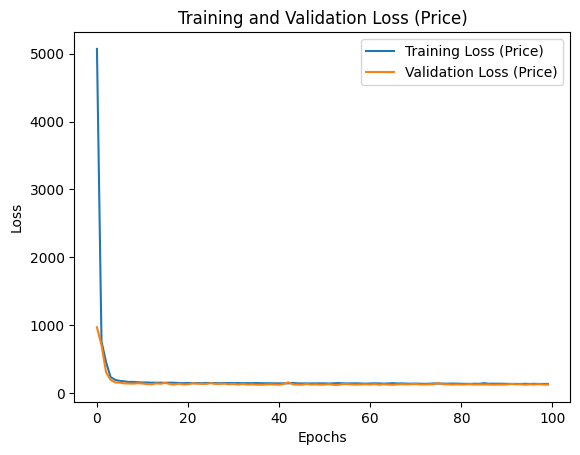

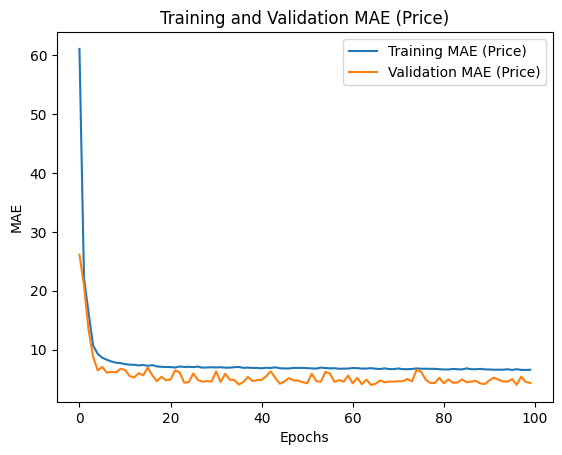

In [364]:

# 选择用于股价预测的特征
features_price = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10','Content_Sentiment_Score', 'Comment_Sentiment_Score', 'Predicted_Trend']]
labels_price = df_price['Close']

# 填充缺失值
features_price.fillna(method='ffill', inplace=True)

# 数据标准化
scaler_price = MinMaxScaler()
features_scaled_price = scaler_price.fit_transform(features_price)

# 创建用于股价预测的训练集和测试集
X_price, y_price = create_dataset(features_scaled_price, labels_price.values, time_step)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.3, random_state=42)

# 构建股价预测模型
model_price = Sequential()
model_price.add(LSTM(200, input_shape=(time_step, X_train_price.shape[2])))
model_price.add(Dropout(0.2))
model_price.add(Dense(1, activation='linear'))

# 编译模型
optimizer_price = tf.keras.optimizers.Adam(learning_rate=0.001)
model_price.compile(optimizer=optimizer_price, loss='mse', metrics=['mae'])

# 训练模型
history_price = model_price.fit(X_train_price, y_train_price, epochs=100, batch_size=8, validation_data=(X_test_price, y_test_price))

# 评估模型
loss_price, mae_price = model_price.evaluate(X_test_price, y_test_price)
print(f'Test Loss (Price): {loss_price}, Test MAE (Price): {mae_price}')

# 可视化训练和验证损失
plt.plot(history_price.history['loss'], label='Training Loss (Price)')
plt.plot(history_price.history['val_loss'], label='Validation Loss (Price)')
plt.title('Training and Validation Loss (Price)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证MAE
plt.plot(history_price.history['mae'], label='Training MAE (Price)')
plt.plot(history_price.history['val_mae'], label='Validation MAE (Price)')
plt.title('Training and Validation MAE (Price)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [365]:
from sklearn.metrics import roc_curve, auc, recall_score, f1_score

In [371]:
df_price = pd.read_csv('TextBlob_Trustfilter.csv')
df_price

Subreddit       Keyword  \
0       stocks         Apple   
1       stocks         Apple   
2       stocks         Apple   
3       stocks         Apple   
4       stocks         Apple   
...        ...           ...   
8863   finance  Apple Market   
8864   finance  Apple Market   
8865   finance  Apple Market   
8866   finance  Apple Market   
8867   finance  Apple Market   

                                                  Title  \
0     Apple Ditches iPhone Production Increase After...   
1     Apple Ditches iPhone Production Increase After...   
2     Apple Ditches iPhone Production Increase After...   
3     Apple Ditches iPhone Production Increase After...   
4     Apple Ditches iPhone Production Increase After...   
...                                                 ...   
8863  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
8864  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
8865  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
8866  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   
8867  SoftBank Nears $40 Billion Deal to Sell Arm Ho...   

                                                Content  Likes  Num_Comments  \
0     Apple Inc. is backing off plans to increase pr...   2031           538   
1     Apple Inc. is backing off plans to increase pr...   2031           538   
2     Apple Inc. is backing off plans to increase pr...   2031           538   
3     Apple Inc. is backing off plans to increase pr...   2031           538   
4     Apple Inc. is backing off plans to increase pr...   2031           538   
...                                                 ...    ...           ...   
8863                               No content available    557            52   
8864                               No content available    557            52   
8865                               No content available    557            52   
8866                               No content available    557            52   
8867                               No content available    557            52   

            Author                                     Submission_URL  \
0         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
1         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
2         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
3         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
4         Shalaiyn  https://www.reddit.com/r/stocks/comments/xpz6d...   
...            ...                                                ...   
8863  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
8864  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
8865  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
8866  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   
8867  FacelessOnes  https://www.wsj.com/articles/softbank-nearing-...   

                                                Comment  Comment_Score  ...  \
0                          If Apple falls we all fall 🙄            391  ...   
1                            Nice tomorrow is a -3% day            381  ...   
2     Just read the article… of course lol. Typical ...            272  ...   
3     As awful as this may be for the market in the ...            162  ...   
4     Luxury good suffer during a recession.  \n\nGu...            116  ...   
...                                                 ...            ...  ...   
8863  They have been trying to sell for several year...              2  ...   
8864  I believe it’s the same company that will soon...              1  ...   
8865       Got to make up for the investment in WeWork.              1  ...   
8866  Where are all the sceptics who were worried ab...              1  ...   
8867  Arm is currently most valuable company on the ...             -1  ...   

          SMA_10      SMA_30        RSI      MACD  Bollinger_High  \
0     137.323996  120.049332  84.761094  2.935604      

Epoch 1/82
230/230 [==============================] - 10s 11ms/step - loss: 0.4589 - accuracy: 0.9197 - val_loss: 0.3293 - val_accuracy: 0.9545
Epoch 2/82
230/230 [==============================] - 2s 9ms/step - loss: 0.3728 - accuracy: 0.9239 - val_loss: 0.2038 - val_accuracy: 0.9545
Epoch 3/82
230/230 [==============================] - 2s 10ms/step - loss: 0.3626 - accuracy: 0.9273 - val_loss: 0.2453 - val_accuracy: 0.9545
Epoch 4/82
230/230 [==============================] - 2s 9ms/step - loss: 0.4759 - accuracy: 0.9186 - val_loss: 0.6073 - val_accuracy: 0.9545
Epoch 5/82
230/230 [==============================] - 2s 7ms/step - loss: 0.5227 - accuracy: 0.9088 - val_loss: 0.3706 - val_accuracy: 0.9545
Epoch 6/82
230/230 [==============================] - 2s 7ms/step - loss: 0.3393 - accuracy: 0.9239 - val_loss: 0.1976 - val_accuracy: 0.9545
Epoch 7/82
230/230 [==============================] - 2s 8ms/step - loss: 0.4175 - accuracy: 0.9192 - val_loss: 0.2872 - val_accuracy: 0.9545
Epo

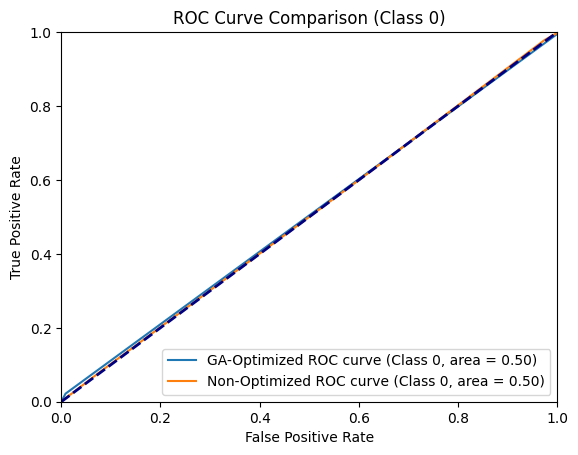

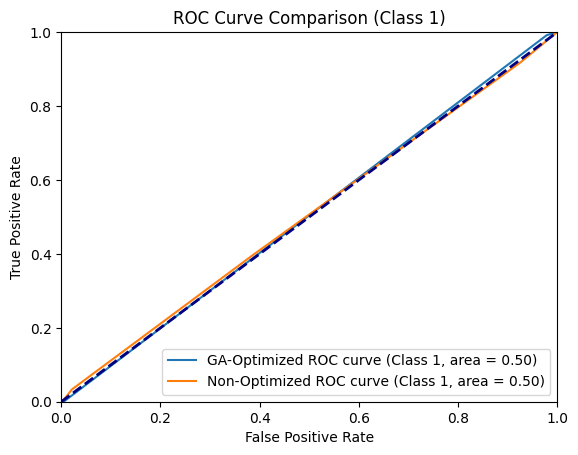

d:\anaconda3\envs\python38\lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\anaconda3\envs\python38\lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


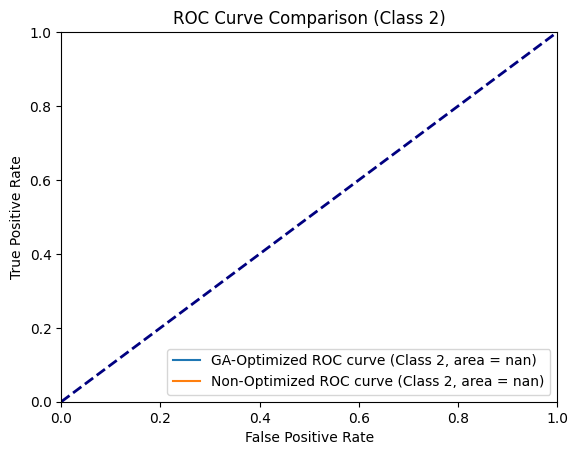

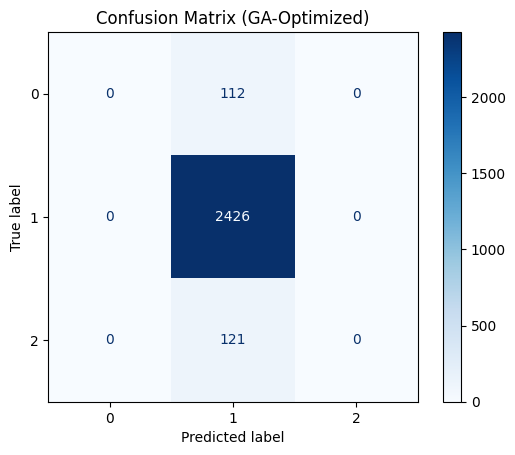

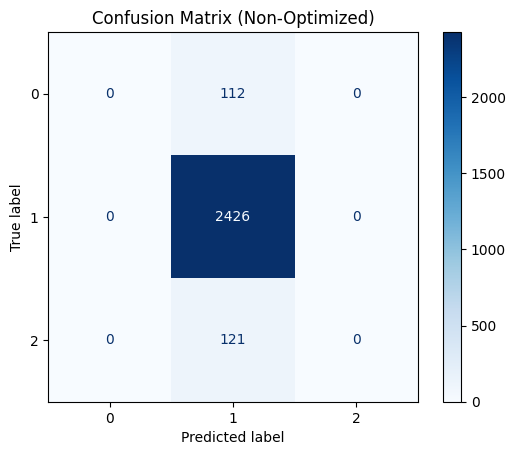

Classification Report (GA-Optimized):
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       112
           0       0.91      1.00      0.95      2426
           1       0.00      0.00      0.00       121

    accuracy                           0.91      2659
   macro avg       0.30      0.33      0.32      2659
weighted avg       0.83      0.91      0.87      2659

Classification Report (Non-Optimized):
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       112
           0       0.91      1.00      0.95      2426
           1       0.00      0.00      0.00       121

    accuracy                           0.91      2659
   macro avg       0.30      0.33      0.32      2659
weighted avg       0.83      0.91      0.87      2659



d:\anaconda3\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\python38\lib\site-packages\skle

In [373]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 将标签转换为One-Hot编码格式
n_classes = len(np.unique(y_opt))
y_test_bin = label_binarize(y_test_opt, classes=range(n_classes))

# 和之前代码相同的预处理部分
selected_features = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]
labels = df_price['Trend']
scaler = MinMaxScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

time_step = 5
X_opt, y_opt = create_dataset(selected_features_scaled, labels.values, time_step)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.3, random_state=42)

best_batch_size = max(1, int(best_batch_size))
best_hidden_units = max(1, int(best_hidden_units))
best_epochs = max(1, int(best_epochs))

# 使用遗传算法优化后的模型预测
model_ga = Sequential()
model_ga.add(LSTM(best_hidden_units, input_shape=(time_step, X_train_opt.shape[2]), return_sequences=False))
model_ga.add(Dropout(0.2))
model_ga.add(Dense(n_classes, activation='softmax'))  # 多类分类的输出层

optimizer_ga = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
model_ga.compile(optimizer=optimizer_ga, loss='categorical_crossentropy', metrics=['accuracy'])
history_ga = model_ga.fit(X_train_opt, label_binarize(y_train_opt, classes=range(n_classes)), 
                          epochs=best_epochs, batch_size=best_batch_size, 
                          validation_data=(X_test_opt, y_test_bin))

# 未使用遗传算法优化的模型预测
model_non_ga = Sequential()
model_non_ga.add(LSTM(150, input_shape=(time_step, X_train_opt.shape[2]), return_sequences=False))
model_non_ga.add(Dropout(0.2))
model_non_ga.add(Dense(n_classes, activation='softmax'))

optimizer_non_ga = tf.keras.optimizers.Adam(learning_rate=0.001)
model_non_ga.compile(optimizer=optimizer_non_ga, loss='categorical_crossentropy', metrics=['accuracy'])
history_non_ga = model_non_ga.fit(X_train_opt, label_binarize(y_train_opt, classes=range(n_classes)), 
                                  epochs=100, batch_size=8, 
                                  validation_data=(X_test_opt, y_test_bin))

# 预测
predicted_ga = model_ga.predict(X_test_opt)
predicted_non_ga = model_non_ga.predict(X_test_opt)

# 计算每个类的ROC曲线和AUC
for i in range(n_classes):
    fpr_ga, tpr_ga, _ = roc_curve(y_test_bin[:, i], predicted_ga[:, i])
    roc_auc_ga = auc(fpr_ga, tpr_ga)
    
    fpr_non_ga, tpr_non_ga, _ = roc_curve(y_test_bin[:, i], predicted_non_ga[:, i])
    roc_auc_non_ga = auc(fpr_non_ga, tpr_non_ga)
    
    plt.figure()
    plt.plot(fpr_ga, tpr_ga, label=f'GA-Optimized ROC curve (Class {i}, area = {roc_auc_ga:.2f})')
    plt.plot(fpr_non_ga, tpr_non_ga, label=f'Non-Optimized ROC curve (Class {i}, area = {roc_auc_non_ga:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve Comparison (Class {i})')
    plt.legend(loc="lower right")
    plt.show()

# 计算混淆矩阵
conf_matrix_ga = confusion_matrix(y_test_opt, np.argmax(predicted_ga, axis=1))
conf_matrix_non_ga = confusion_matrix(y_test_opt, np.argmax(predicted_non_ga, axis=1))

# 显示混淆矩阵
disp_ga = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ga, display_labels=range(n_classes))
disp_ga.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (GA-Optimized)')
plt.show()

disp_non_ga = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_non_ga, display_labels=range(n_classes))
disp_non_ga.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Non-Optimized)')
plt.show()

# 计算并输出Recall和F1-Score
print("Classification Report (GA-Optimized):")
print(classification_report(y_test_opt, np.argmax(predicted_ga, axis=1)))

print("Classification Report (Non-Optimized):")
print(classification_report(y_test_opt, np.argmax(predicted_non_ga, axis=1)))



- TLBO

In [374]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df_price = pd.read_csv('TextBlob_Trustfilter_predicted_price.csv')

# 选择用于股价预测的特征
features_price = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score', 'Predicted_Trend']]
labels_price = df_price['Close']

# 填充缺失值
features_price.fillna(method='ffill', inplace=True)

# 数据标准化
scaler_price = MinMaxScaler()
features_scaled_price = scaler_price.fit_transform(features_price)

# 创建用于股价预测的训练集和测试集
time_step = 5  # 你可以调整这个时间步长
def create_dataset(data, labels, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(labels[i + time_step])
    return np.array(X), np.array(y)

X_price, y_price = create_dataset(features_scaled_price, labels_price.values, time_step)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.3, random_state=42)


C:\Users\blue\AppData\Local\Temp\ipykernel_3096\3792569222.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_price.fillna(method='ffill', inplace=True)


In [375]:
def evaluate_model(individual):
    units = int(individual['units'])
    learning_rate = individual['learning_rate']
    batch_size = int(individual['batch_size'])
    epochs = int(individual['epochs'])

    model = Sequential()
    model.add(LSTM(units, input_shape=(time_step, X_train_price.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    history = model.fit(X_train_price, y_train_price, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test_price, y_test_price), verbose=0)

    loss, mae = model.evaluate(X_test_price, y_test_price, verbose=0)
    return mae


In [377]:
# 初始化种群
def initialize_population(nPop, param_bounds):
    pop = []
    for _ in range(nPop):
        individual = {
            'units': np.random.choice(param_bounds['units']),
            'learning_rate': np.random.choice(param_bounds['learning_rate']),
            'batch_size': np.random.choice(param_bounds['batch_size']),
            'epochs': np.random.choice(param_bounds['epochs'])
        }
        # 确保units为正整数
        individual['units'] = max(int(individual['units']), 1)
        pop.append(individual)
    return pop


def teacher_phase(pop, teacher, param_bounds):
    new_population = []
    for individual in pop:
        new_individual = individual.copy()
        for param in individual:
            difference = np.random.rand() * (teacher[param] - individual[param])
            new_individual[param] += difference
            # 确保参数的有效性
            if param == 'units':
                new_individual[param] = max(int(new_individual[param]), 1)  # 确保units为正整数
            else:
                new_individual[param] = np.clip(new_individual[param], min(param_bounds[param]), max(param_bounds[param]))
        new_population.append(new_individual)
    return new_population

def learner_phase(pop, param_bounds):
    new_population = pop.copy()
    for i, learner1 in enumerate(pop):
        learner2 = pop[np.random.choice(len(pop))]
        new_individual = learner1.copy()
        if evaluate_model(learner1) < evaluate_model(learner2):
            for param in learner1:
                new_individual[param] += np.random.rand() * (learner1[param] - learner2[param])
        else:
            for param in learner1:
                new_individual[param] += np.random.rand() * (learner2[param] - learner1[param])
        # 确保参数的有效性
        if param == 'units':
            new_individual[param] = max(int(new_individual[param]), 1)  # 确保units为正整数
        else:
            new_individual[param] = np.clip(new_individual[param], min(param_bounds[param]), max(param_bounds[param]))
        new_population[i] = new_individual
    return new_population

# 参数范围定义
param_bounds = {
    'units': [50, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [8, 32, 64],
    'epochs': [50, 100]
}

# TLBO优化过程
nPop = 10  # 种群大小
MaxIt = 20  # 最大迭代次数

pop = initialize_population(nPop, param_bounds)
best_params = None
best_fitness = float('inf')

for it in range(MaxIt):
    fitness = [evaluate_model(individual) for individual in pop]
    teacher = pop[np.argmin(fitness)]
    pop = teacher_phase(pop, teacher, param_bounds)
    pop = learner_phase(pop, param_bounds)

    # 更新最佳参数
    fitness = [evaluate_model(individual) for individual in pop]
    current_best_idx = np.argmin(fitness)
    if fitness[current_best_idx] < best_fitness:
        best_fitness = fitness[current_best_idx]
        best_params = pop[current_best_idx]

# 输出最佳超参数组合
print(f"Best Parameters: {best_params}")
print(f"Best MAE: {best_fitness}")


Best Parameters: {'units': 117.0, 'learning_rate': 0.01026349927731976, 'batch_size': 39.508140079219444, 'epochs': 87.61643656645177}
Best MAE: 4.3130927085876465


In [378]:
# 使用最佳参数训练最终模型
units = int(best_params['units'])
learning_rate = best_params['learning_rate']
batch_size = int(best_params['batch_size'])
epochs = int(best_params['epochs'])

model_price = Sequential()
model_price.add(LSTM(units, input_shape=(time_step, X_train_price.shape[2])))
model_price.add(Dropout(0.2))
model_price.add(Dense(1, activation='linear'))

optimizer_price = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_price.compile(optimizer=optimizer_price, loss='mse', metrics=['mae'])

history_price = model_price.fit(X_train_price, y_train_price, epochs=epochs, batch_size=batch_size,
                                validation_data=(X_test_price, y_test_price), verbose=1)


Epoch 1/87
160/160 [==============================] - 6s 18ms/step - loss: 4650.8584 - mae: 56.4003 - val_loss: 749.2149 - val_mae: 22.1794
Epoch 2/87
160/160 [==============================] - 2s 14ms/step - loss: 730.5015 - mae: 21.5783 - val_loss: 705.4131 - val_mae: 20.8829
Epoch 3/87
160/160 [==============================] - 1s 6ms/step - loss: 725.3458 - mae: 21.4048 - val_loss: 705.5683 - val_mae: 20.8758
Epoch 4/87
160/160 [==============================] - 1s 5ms/step - loss: 718.7170 - mae: 21.1701 - val_loss: 698.3591 - val_mae: 20.7733
Epoch 5/87
160/160 [==============================] - 1s 5ms/step - loss: 693.2319 - mae: 20.9343 - val_loss: 573.8163 - val_mae: 18.7589
Epoch 6/87
160/160 [==============================] - 1s 5ms/step - loss: 397.9211 - mae: 14.9946 - val_loss: 253.1175 - val_mae: 10.9777
Epoch 7/87
160/160 [==============================] - 1s 5ms/step - loss: 249.2422 - mae: 11.1279 - val_loss: 191.7492 - val_mae: 8.5632
Epoch 8/87
160/160 [============

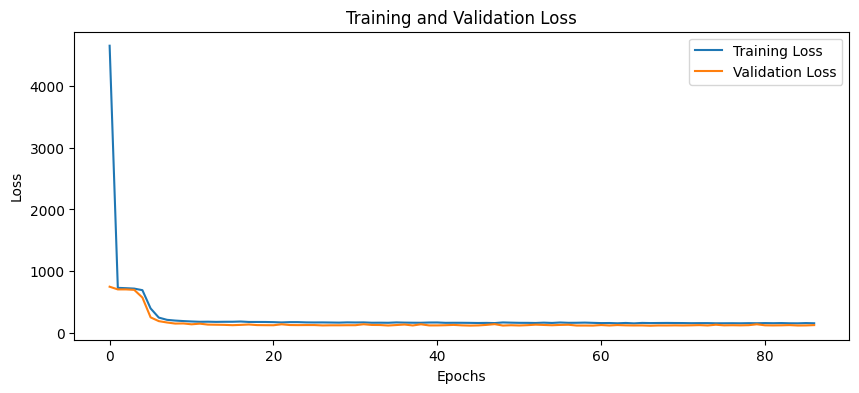

84/84 [==============================] - 0s 2ms/step
Test MAE: 5.767057420975196
Test MSE: 127.61548472596816
Test R^2 Score: 0.8191538197349677


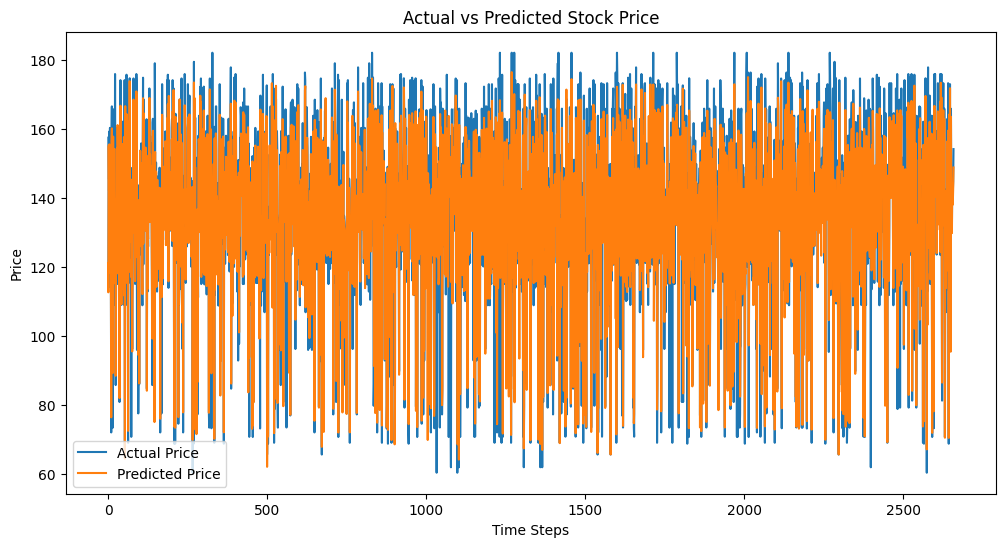

In [383]:
from sklearn.metrics import mean_squared_error, r2_score

# 可视化损失
plt.figure(figsize=(10, 4))
plt.plot(history_price.history['loss'], label='Training Loss')
plt.plot(history_price.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 预测与评估
y_pred_price = model_price.predict(X_test_price)

# MAE
mae = mean_absolute_error(y_test_price, y_pred_price)
print(f"Test MAE: {mae}")

# MSE
mse = mean_squared_error(y_test_price, y_pred_price)
print(f"Test MSE: {mse}")

# R^2 Score
r2 = r2_score(y_test_price, y_pred_price)
print(f"Test R^2 Score: {r2}")

# # 计算每个时间步的预测准确率
# accuracy = np.mean(np.isclose(y_test_price, y_pred_price, rtol=0.05))  # 设定5%的容忍误差
# print(f"Test Accuracy: {accuracy}")

# 可视化真实股价与预测股价
plt.figure(figsize=(12, 6))
plt.plot(y_test_price, label='Actual Price')
plt.plot(y_pred_price, label='Predicted Price')
plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

# # 可视化预测准确率
# plt.figure(figsize=(12, 6))
# plt.plot(np.isclose(y_test_price, y_pred_price, rtol=0.05), label='Prediction Accuracy')
# plt.title('Prediction Accuracy Over Time')
# plt.xlabel('Time Steps')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

- 对比加入和未加入遗传算法优化的趋势预测结果。

Epoch 1/83
222/222 [==============================] - 4s 8ms/step - loss: 0.8867 - accuracy: 0.8720 - val_loss: 0.9517 - val_accuracy: 0.9124
Epoch 2/83
222/222 [==============================] - 2s 7ms/step - loss: 0.7925 - accuracy: 0.8731 - val_loss: 0.9248 - val_accuracy: 0.9124
Epoch 3/83
222/222 [==============================] - 1s 7ms/step - loss: 0.8792 - accuracy: 0.8754 - val_loss: 1.8069 - val_accuracy: 0.9124
Epoch 4/83
222/222 [==============================] - 1s 6ms/step - loss: 0.9786 - accuracy: 0.8612 - val_loss: 1.1696 - val_accuracy: 0.9124
Epoch 5/83
222/222 [==============================] - 1s 6ms/step - loss: 0.9684 - accuracy: 0.8699 - val_loss: 1.1482 - val_accuracy: 0.9124
Epoch 6/83
222/222 [==============================] - 2s 7ms/step - loss: 0.9711 - accuracy: 0.8657 - val_loss: 1.8364 - val_accuracy: 0.9124
Epoch 7/83
222/222 [==============================] - 1s 6ms/step - loss: 0.7802 - accuracy: 0.8799 - val_loss: 0.4489 - val_accuracy: 0.9124
Epoch 

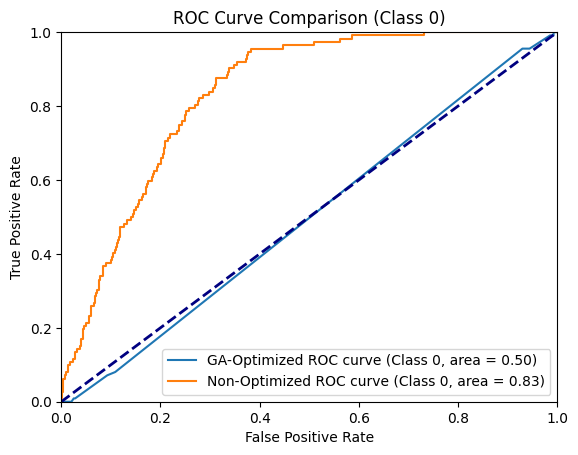

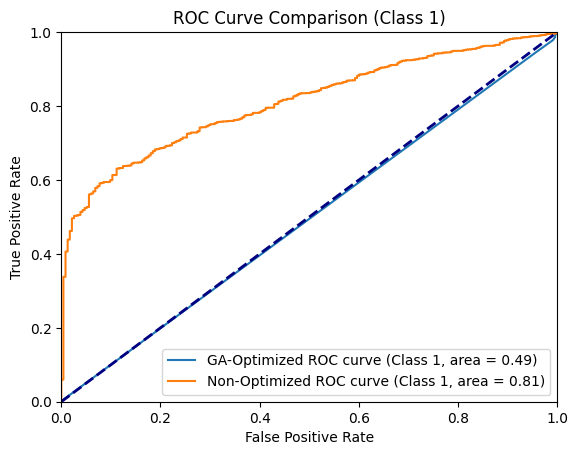

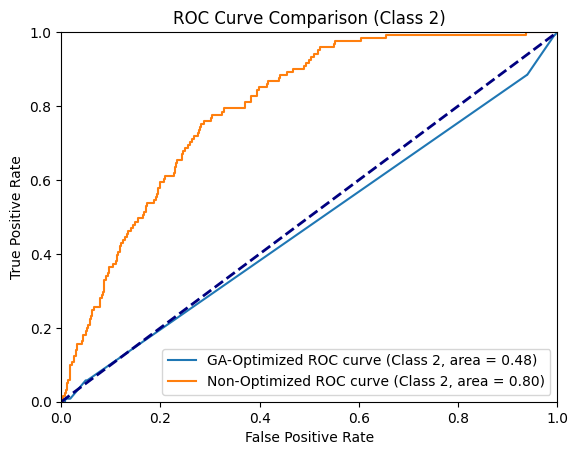

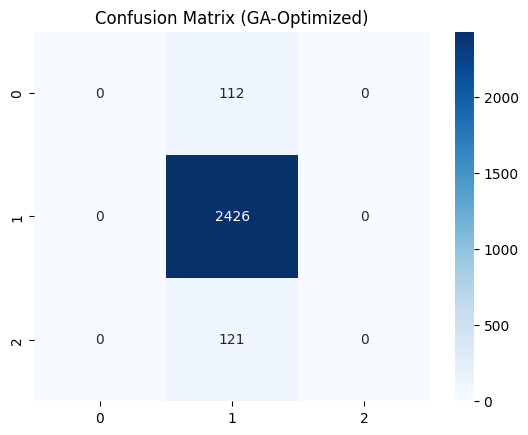

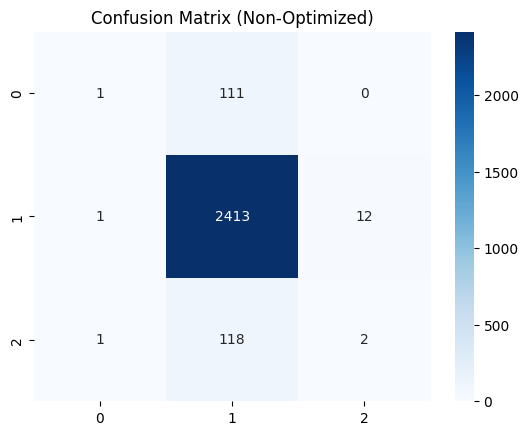

GA-Optimized Recall: 0.33, F1-Score: 0.32
Non-Optimized Recall: 0.34, F1-Score: 0.33
Classification Report (GA-Optimized):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.91      1.00      0.95      2426
           2       0.00      0.00      0.00       121

    accuracy                           0.91      2659
   macro avg       0.30      0.33      0.32      2659
weighted avg       0.83      0.91      0.87      2659

Classification Report (Non-Optimized):
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       112
           1       0.91      0.99      0.95      2426
           2       0.14      0.02      0.03       121

    accuracy                           0.91      2659
   macro avg       0.46      0.34      0.33      2659
weighted avg       0.85      0.91      0.87      2659



d:\anaconda3\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [386]:
# 加载数据集
df_price = pd.read_csv('TextBlob_Trustfilter.csv')
selected_features = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]
labels = df_price['Trend']

# 数据标准化
scaler = MinMaxScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

# 标签二值化
labels_binarized = label_binarize(labels, classes=[-1, 0, 1])

# 创建训练集和测试集
time_step = 5
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

X_opt, y_opt = create_dataset(selected_features_scaled, labels_binarized, time_step)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.3, random_state=42)

# 设置最佳参数
best_learning_rate, best_batch_size, best_hidden_units, best_epochs = [0.22023605562789816, 28, 123, 83]  # 确保参数为整数

# 使用遗传算法优化后的模型预测
model_ga = Sequential()
model_ga.add(LSTM(best_hidden_units, input_shape=(time_step, X_train_opt.shape[2])))
model_ga.add(Dropout(0.2))
model_ga.add(Dense(3, activation='softmax'))  # 使用softmax激活函数进行多分类

optimizer_ga = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
model_ga.compile(optimizer=optimizer_ga, loss='categorical_crossentropy', metrics=['accuracy'])
history_ga = model_ga.fit(X_train_opt, y_train_opt, epochs=best_epochs, batch_size=best_batch_size, validation_data=(X_test_opt, y_test_opt))

# 打印遗传算法优化后的模型的准确率
ga_accuracy = history_ga.history['val_accuracy'][-1]
print(f'GA-Optimized Model Accuracy: {ga_accuracy:.2f}')

# 未使用遗传算法优化的模型预测
model_non_ga = Sequential()
model_non_ga.add(LSTM(150, input_shape=(time_step, X_train_opt.shape[2])))
model_non_ga.add(Dropout(0.2))
model_non_ga.add(Dense(3, activation='softmax'))

optimizer_non_ga = tf.keras.optimizers.Adam(learning_rate=0.001)
model_non_ga.compile(optimizer=optimizer_non_ga, loss='categorical_crossentropy', metrics=['accuracy'])
history_non_ga = model_non_ga.fit(X_train_opt, y_train_opt, epochs=100, batch_size=8, validation_data=(X_test_opt, y_test_opt))

# 打印未使用遗传算法优化的模型的准确率
non_ga_accuracy = history_non_ga.history['val_accuracy'][-1]
print(f'Non-Optimized Model Accuracy: {non_ga_accuracy:.2f}')

# 比较遗传算法优化后的模型与 TextBlob 基准模型的准确率
textblob_accuracy = history_textblob.history['val_accuracy'][-1]
print(f'TextBlob Model Accuracy: {textblob_accuracy:.2f}')

# 预测
predicted_ga = model_ga.predict(X_test_opt)
predicted_non_ga = model_non_ga.predict(X_test_opt)

# 计算ROC曲线和AUC
n_classes = y_train_opt.shape[1]
for i in range(n_classes):
    fpr_ga, tpr_ga, _ = roc_curve(y_test_opt[:, i], predicted_ga[:, i])
    roc_auc_ga = auc(fpr_ga, tpr_ga)
    
    fpr_non_ga, tpr_non_ga, _ = roc_curve(y_test_opt[:, i], predicted_non_ga[:, i])
    roc_auc_non_ga = auc(fpr_non_ga, tpr_non_ga)
    
    plt.figure()
    plt.plot(fpr_ga, tpr_ga, label=f'GA-Optimized ROC curve (Class {i}, area = {roc_auc_ga:.2f})')
    plt.plot(fpr_non_ga, tpr_non_ga, label=f'Non-Optimized ROC curve (Class {i}, area = {roc_auc_non_ga:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve Comparison (Class {i})')
    plt.legend(loc="lower right")
    plt.show()

# 计算混淆矩阵
conf_matrix_ga = confusion_matrix(y_test_opt.argmax(axis=1), predicted_ga.argmax(axis=1))
conf_matrix_non_ga = confusion_matrix(y_test_opt.argmax(axis=1), predicted_non_ga.argmax(axis=1))

# 显示混淆矩阵
plt.figure()
plt.title("Confusion Matrix (GA-Optimized)")
sns.heatmap(conf_matrix_ga, annot=True, fmt='d', cmap='Blues')
plt.show()

plt.figure()
plt.title("Confusion Matrix (Non-Optimized)")
sns.heatmap(conf_matrix_non_ga, annot=True, fmt='d', cmap='Blues')
plt.show()

# 计算Recall和F1-Score
recall_ga = recall_score(y_test_opt.argmax(axis=1), predicted_ga.argmax(axis=1), average='macro')
f1_ga = f1_score(y_test_opt.argmax(axis=1), predicted_ga.argmax(axis=1), average='macro')

recall_non_ga = recall_score(y_test_opt.argmax(axis=1), predicted_non_ga.argmax(axis=1), average='macro')
f1_non_ga = f1_score(y_test_opt.argmax(axis=1), predicted_non_ga.argmax(axis=1), average='macro')

# 输出Recall和F1-Score
print(f'GA-Optimized Recall: {recall_ga:.2f}, F1-Score: {f1_ga:.2f}')
print(f'Non-Optimized Recall: {recall_non_ga:.2f}, F1-Score: {f1_non_ga:.2f}')

# 打印分类报告
print("Classification Report (GA-Optimized):")
print(classification_report(y_test_opt.argmax(axis=1), predicted_ga.argmax(axis=1)))

print("Classification Report (Non-Optimized):")
print(classification_report(y_test_opt.argmax(axis=1), predicted_non_ga.argmax(axis=1)))


- 下面是加入趋势预测作为特征的股价预测和未加入趋势预测作为特征的股价预测
- 把加入趋势预测作为特征的股价预测和补充加入TLBO优化的进行对比。

Epoch 1/100
776/776 [==============================] - 6s 5ms/step - loss: 6288.5088 - mae: 70.8661 - val_loss: 1606.9502 - val_mae: 35.6342
Epoch 2/100
776/776 [==============================] - 4s 5ms/step - loss: 935.5561 - mae: 25.1330 - val_loss: 710.1633 - val_mae: 21.1673
Epoch 3/100
776/776 [==============================] - 3s 4ms/step - loss: 591.3221 - mae: 19.1980 - val_loss: 371.6370 - val_mae: 13.8063
Epoch 4/100
776/776 [==============================] - 3s 4ms/step - loss: 305.4235 - mae: 12.8330 - val_loss: 250.2050 - val_mae: 11.9737
Epoch 5/100
776/776 [==============================] - 3s 4ms/step - loss: 217.0858 - mae: 10.2753 - val_loss: 168.0106 - val_mae: 7.0423
Epoch 6/100
776/776 [==============================] - 3s 4ms/step - loss: 190.3816 - mae: 9.2047 - val_loss: 146.4582 - val_mae: 6.4326
Epoch 7/100
776/776 [==============================] - 4s 5ms/step - loss: 180.5777 - mae: 8.8682 - val_loss: 138.0032 - val_mae: 5.6164
Epoch 8/100
776/776 [=========

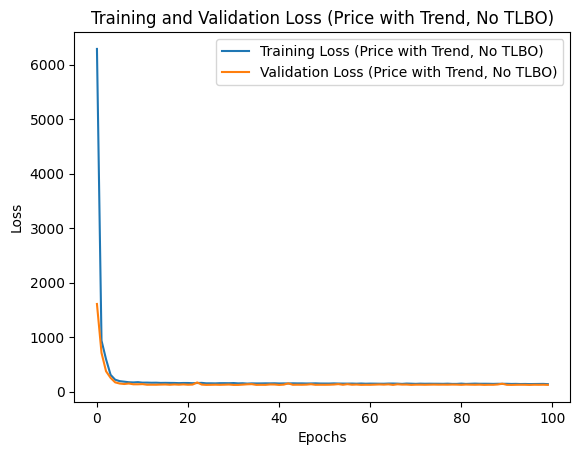

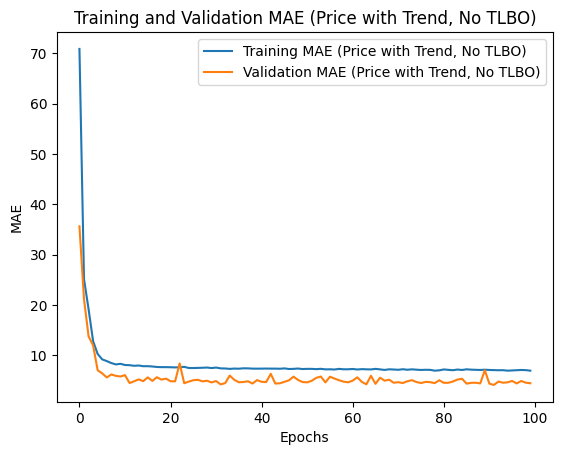

Epoch 1/87
160/160 [==============================] - 3s 8ms/step - loss: 4605.3232 - mae: 55.6536 - val_loss: 748.1197 - val_mae: 22.1555
Epoch 2/87
160/160 [==============================] - 1s 6ms/step - loss: 726.1743 - mae: 21.4893 - val_loss: 705.4089 - val_mae: 20.8941
Epoch 3/87
160/160 [==============================] - 1s 6ms/step - loss: 722.5143 - mae: 21.3531 - val_loss: 705.6554 - val_mae: 20.9209
Epoch 4/87
160/160 [==============================] - 1s 6ms/step - loss: 723.0436 - mae: 21.2971 - val_loss: 697.3780 - val_mae: 20.8544
Epoch 5/87
160/160 [==============================] - 1s 6ms/step - loss: 669.7689 - mae: 20.4703 - val_loss: 596.3245 - val_mae: 18.8378
Epoch 6/87
160/160 [==============================] - 1s 6ms/step - loss: 471.7866 - mae: 16.6282 - val_loss: 348.1557 - val_mae: 14.5793
Epoch 7/87
160/160 [==============================] - 1s 8ms/step - loss: 286.0896 - mae: 12.2533 - val_loss: 195.4158 - val_mae: 8.7098
Epoch 8/87
160/160 [==============

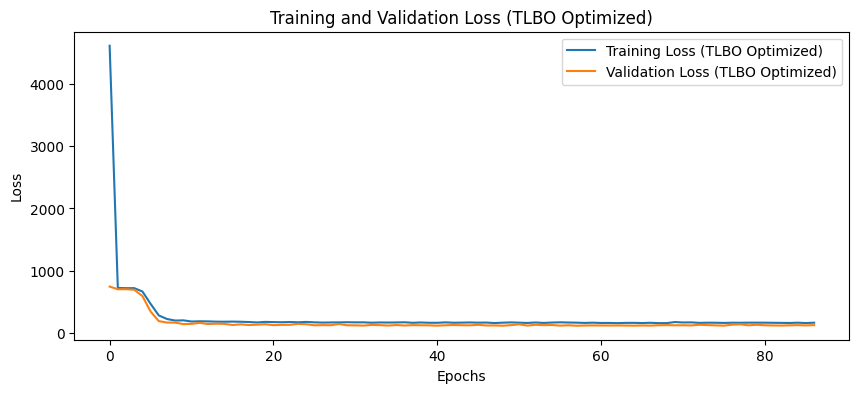

84/84 [==============================] - 0s 2ms/step
Test MAE (TLBO Optimized): 4.916511286017858
Test MSE (TLBO Optimized): 131.21079217582178
Test R^2 Score (TLBO Optimized): 0.8140588454018713


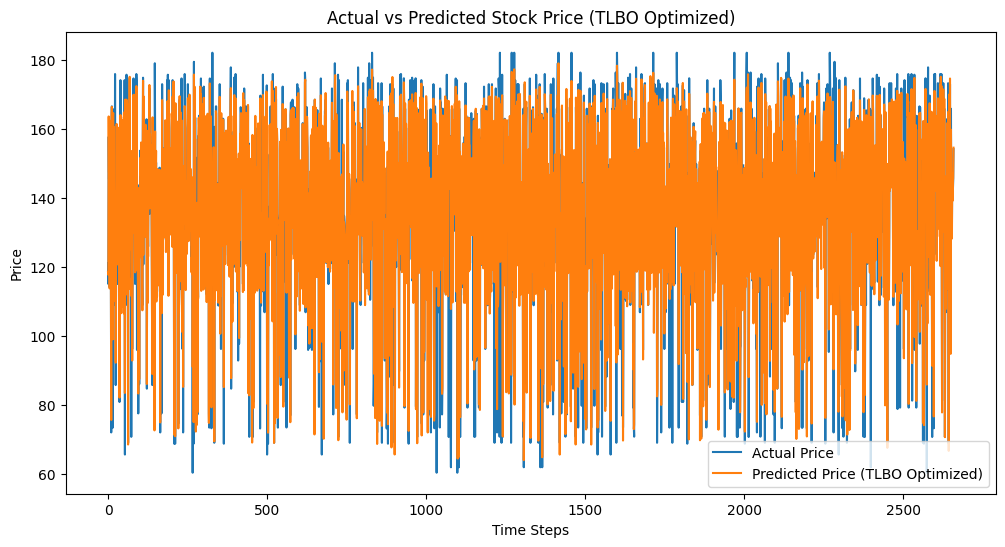

In [387]:
# 加载数据
df_price = pd.read_csv('TextBlob_Trustfilter.csv')

# 选择用于趋势预测的特征
selected_features = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]
labels = df_price['Trend']

# 数值特征标准化/归一化
scaler = MinMaxScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

time_step = 5  # 一周交易日为5天

# 创建训练集和测试集
def create_dataset(data, labels, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(labels[i + time_step])
    return np.array(X), np.array(y)

X_opt, y_opt = create_dataset(selected_features_scaled, labels.values, time_step)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.3, random_state=42)

# 构建单层LSTM模型，并添加Dropout层（未进行TLBO优化）
model_price_with_trend = Sequential()
model_price_with_trend.add(LSTM(150, input_shape=(time_step, X_train_price.shape[2])))
model_price_with_trend.add(Dropout(0.2))
model_price_with_trend.add(Dense(1, activation='linear'))

# 编译模型
optimizer_price = tf.keras.optimizers.Adam(learning_rate=0.001)
model_price_with_trend.compile(optimizer=optimizer_price, loss='mse', metrics=['mae'])

# 训练模型
history_price_with_trend = model_price_with_trend.fit(X_train_price, y_train_price, epochs=100, batch_size=8, validation_data=(X_test_price, y_test_price))

# 评估模型
loss_price_with_trend, mae_price_with_trend = model_price_with_trend.evaluate(X_test_price, y_test_price)
print(f'Test Loss (Price with Trend, No TLBO): {loss_price_with_trend}, Test MAE (Price with Trend, No TLBO): {mae_price_with_trend}')

# 可视化训练和验证损失
plt.plot(history_price_with_trend.history['loss'], label='Training Loss (Price with Trend, No TLBO)')
plt.plot(history_price_with_trend.history['val_loss'], label='Validation Loss (Price with Trend, No TLBO)')
plt.title('Training and Validation Loss (Price with Trend, No TLBO)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证MAE
plt.plot(history_price_with_trend.history['mae'], label='Training MAE (Price with Trend, No TLBO)')
plt.plot(history_price_with_trend.history['val_mae'], label='Validation MAE (Price with Trend, No TLBO)')
plt.title('Training and Validation MAE (Price with Trend, No TLBO)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# 使用TLBO优化后的模型
units = int(best_params['units'])
learning_rate = best_params['learning_rate']
batch_size = int(best_params['batch_size'])
epochs = int(best_params['epochs'])

model_price_tlbo = Sequential()
model_price_tlbo.add(LSTM(units, input_shape=(time_step, X_train_price.shape[2])))
model_price_tlbo.add(Dropout(0.2))
model_price_tlbo.add(Dense(1, activation='linear'))

optimizer_price_tlbo = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_price_tlbo.compile(optimizer=optimizer_price_tlbo, loss='mse', metrics=['mae'])

history_price_tlbo = model_price_tlbo.fit(X_train_price, y_train_price, epochs=epochs, batch_size=batch_size, validation_data=(X_test_price, y_test_price), verbose=1)

# 可视化损失
plt.figure(figsize=(10, 4))
plt.plot(history_price_tlbo.history['loss'], label='Training Loss (TLBO Optimized)')
plt.plot(history_price_tlbo.history['val_loss'], label='Validation Loss (TLBO Optimized)')
plt.title('Training and Validation Loss (TLBO Optimized)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 预测与评估
y_pred_price_tlbo = model_price_tlbo.predict(X_test_price)

# MAE
mae_tlbo = mean_absolute_error(y_test_price, y_pred_price_tlbo)
print(f"Test MAE (TLBO Optimized): {mae_tlbo}")

# MSE
mse_tlbo = mean_squared_error(y_test_price, y_pred_price_tlbo)
print(f"Test MSE (TLBO Optimized): {mse_tlbo}")

# R^2 Score
r2_tlbo = r2_score(y_test_price, y_pred_price_tlbo)
print(f"Test R^2 Score (TLBO Optimized): {r2_tlbo}")

# 可视化真实股价与预测股价
plt.figure(figsize=(12, 6))
plt.plot(y_test_price, label='Actual Price')
plt.plot(y_pred_price_tlbo, label='Predicted Price (TLBO Optimized)')
plt.title('Actual vs Predicted Stock Price (TLBO Optimized)')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


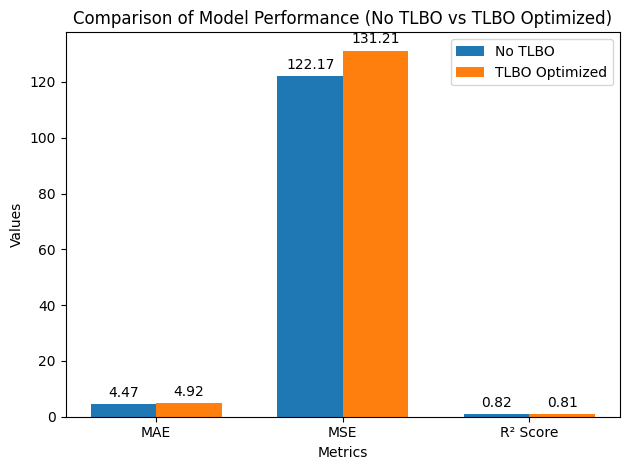

In [388]:
import matplotlib.pyplot as plt
import numpy as np

# 定义性能指标
metrics = ['MAE', 'MSE', 'R² Score']

# 未进行TLBO优化的模型结果
values_no_tlbo = [mae_price_with_trend, loss_price_with_trend, r2]

# 进行TLBO优化的模型结果
values_tlbo = [mae_tlbo, mse_tlbo, r2_tlbo]

# 设置柱状图的位置
x = np.arange(len(metrics))
width = 0.35  # 柱的宽度

# 创建柱状图
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_no_tlbo, width, label='No TLBO')
rects2 = ax.bar(x + width/2, values_tlbo, width, label='TLBO Optimized')

# 添加一些文本标签
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Performance (No TLBO vs TLBO Optimized)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# 自动标注柱状图上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


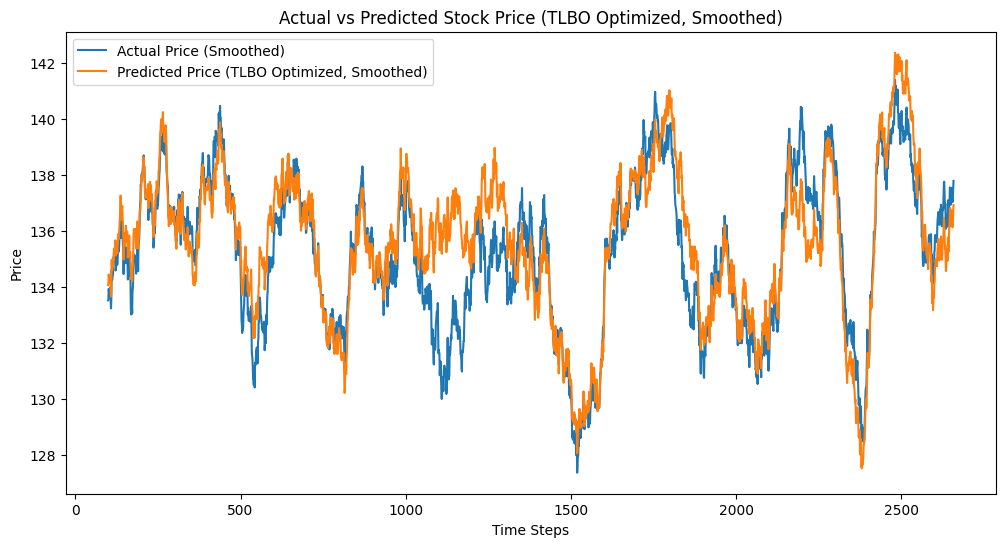

In [404]:
import pandas as pd

# 创建一个 DataFrame 来存储测试和预测数据
df_results = pd.DataFrame({
    'Actual': y_test_price.flatten(),
    'Predicted_TLBO': y_pred_price_tlbo.flatten()
})

# 应用移动平均平滑
window_size = 100  # 选择窗口大小
df_results['Actual_Smoothed'] = df_results['Actual'].rolling(window=window_size).mean()
df_results['Predicted_TLBO_Smoothed'] = df_results['Predicted_TLBO'].rolling(window=window_size).mean()

# 可视化平滑后的真实股价与预测股价
plt.figure(figsize=(12, 6))
plt.plot(df_results['Actual_Smoothed'], label='Actual Price (Smoothed)')
plt.plot(df_results['Predicted_TLBO_Smoothed'], label='Predicted Price (TLBO Optimized, Smoothed)')
plt.title('Actual vs Predicted Stock Price (TLBO Optimized, Smoothed)')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()
